|    Student Names    | Student Number |       Student E-Mail      |
|---------------------|----------------|---------------------------|
|   Burcu Yesilyurt   |    20230763    |  20230763@novaims.unl.pt  |
|    Arda Kaykusuz    |    20230766    |  20230766@novaims.unl.pt  |
| Emir Kaan Kamiloglu |    20240945    |  20240945@novaims.unl.pt  |

# 1.Libraries

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import statistics as stat
import re
import warnings
import seaborn as sns
from math import ceil
import matplotlib.pyplot as plt
from IPython.display import clear_output


# Sklearn modules
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering, KMeans, MeanShift, estimate_bandwidth, DBSCAN, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score


# Scipy modules
from scipy.stats import zscore
import scipy.stats as sts
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Sompy modules
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView


import kmedoids
from minisom import MiniSom


import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

# 2.Dataset

In [2]:
df = pd.read_csv(r"C:\Users\ARDA\Desktop\last_dataset.csv", sep=',')
df.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  \
0         1          0.0           1   DELIVERY           DIGI  ...   
1         2          0.0           1   DISCOUNT           DIGI  ...   
2         2          0.0           1   DISCOUNT           CASH  ...   
3         1          0.0           2   DELIVERY           DIGI  ...   
4         0          0.0           2          -           DIGI  ...   

  CUI_Chinese_Percentage CUI_Desserts_Percentage CUI_Healthy_Percentage  \
0                    0.0                     0.0                    0.0   
1                    0.0                     0.0                    0.0   
2                    0.0                     0.0                    0.0   
3                    0.0                     0.0                    0.0   
4                    0.0                     0.0                    0.0   

   CUI_Indian_Percentage  CUI_Italian_Percentage  CUI_Japanese_Percentage  \
0               1.000000                     0.0                      0.0   
1               0.000000                     0.0                      0.0   
2               0.000000                     0.0                      0.0   
3               0.565906                     0.0                      0.0   
4               0.000000                     0.0                      0.0   

   CUI_Noodle Dishes_Percentage CUI_OTHER_Percentage  \
0                           0.0                  0.0   
1                           0.0                  0.0   
2                           0.0                  0.0   
3                           0.0                  0.0   
4                           0.0                  0.0   

   CUI_Street Food / Snacks_Percentage  CUI_Thai_Percentage  
0                                  0.0                  0.0  
1                                  0.0                  0.0  
2                                  0.0                  0.0  
3                                  0.0                  0.0  
4                                  0.0                  0.0  

[5 rows x 38 columns]

In [3]:
df['is_promo_used'] = df['is_promo_used'].astype(bool) # it is converted to boolean type since we will use it as a categorical variable.

In [6]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'favorite_cuisine', 'hour', 'day', 'total_spend',
       'total_orders', 'average_order_revenue', 'is_promo_used', 'age_group',
       'first_order_rearranged', 'last_order_rearranged',
       'weeks_after_first_order', 'weeks_after_last_order',
       'is_chain_percentage', 'CUI_American_Percentage',
       'CUI_Asian_Percentage', 'CUI_Beverages_Percentage',
       'CUI_Cafe_Percentage', 'CUI_Chicken Dishes_Percentage',
       'CUI_Chinese_Percentage', 'CUI_Desserts_Percentage',
       'CUI_Healthy_Percentage', 'CUI_Indian_Percentage',
       'CUI_Italian_Percentage', 'CUI_Japanese_Percentage',
       'CUI_Noodle Dishes_Percentage', 'CUI_OTHER_Percentage',
       'CUI_Street Food / Snacks_Percentage', 'CUI_Thai_Percentage'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          31888 non-null  object 
 1   customer_region                      31888 non-null  object 
 2   customer_age                         31161 non-null  float64
 3   vendor_count                         31888 non-null  int64  
 4   product_count                        31888 non-null  int64  
 5   is_chain                             31888 non-null  int64  
 6   first_order                          31782 non-null  float64
 7   last_order                           31888 non-null  int64  
 8   last_promo                           31888 non-null  object 
 9   payment_method                       31888 non-null  object 
 10  favorite_cuisine                     31888 non-null  object 
 11  hour                        

In [8]:
cui_df = df[['customer_id',
   'CUI_American_Percentage',
       'CUI_Asian_Percentage', 'CUI_Beverages_Percentage',
       'CUI_Cafe_Percentage', 'CUI_Chicken Dishes_Percentage',
       'CUI_Chinese_Percentage', 'CUI_Desserts_Percentage',
       'CUI_Healthy_Percentage', 'CUI_Indian_Percentage',
       'CUI_Italian_Percentage', 'CUI_Japanese_Percentage',
       'CUI_Noodle Dishes_Percentage', 'CUI_OTHER_Percentage',
       'CUI_Street Food / Snacks_Percentage', 'CUI_Thai_Percentage']]
cui_df

customer_id  CUI_American_Percentage  CUI_Asian_Percentage  \
0      1b8f824d5e                 0.000000              0.000000   
1      5d272b9dcb                 0.667361              0.332639   
2      f6d1b2ba63                 1.000000              0.000000   
3      180c632ed8                 0.000000              0.434094   
4      4eb37a6705                 0.262807              0.737193   
...           ...                      ...                   ...   
31883  f4e366c281                 0.000000              0.000000   
31884  f6b6709018                 1.000000              0.000000   
31885  f74ad8ce3f                 0.000000              0.000000   
31886  f7b19c0241                 0.000000              1.000000   
31887  fd40d3b0e0                 0.000000              0.000000   

       CUI_Beverages_Percentage  CUI_Cafe_Percentage  \
0                           0.0                  0.0   
1                           0.0                  0.0   
2                           0.0                  0.0   
3                           0.0                  0.0   
4                           0.0                  0.0   
...                         ...                  ...   
31883                       1.0                  0.0   
31884                       0.0                  0.0   
31885                       0.0                  0.0   
31886                       0.0                  0.0   
31887                       0.0                  0.0   

       CUI_Chicken Dishes_Percentage  CUI_Chinese_Percentage  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     0.0   
3                                0.0                     0.0   
4                                0.0                     0.0   
...                              ...                     ...   
31883                            0.0                     0.0   
31884                            0.0                     0.0   
31885                            0.0                     0.0   
31886                            0.0                     0.0   
31887                            0.0                     0.0   

       CUI_Desserts_Percentage  CUI_Healthy_Percentage  CUI_Indian_Percentage  \
0                          0.0                     0.0               1.000000   
1                          0.0                     0.0               0.000000   
2                          0.0                     0.0               0.000000   
3                          0.0                     0.0               0.565906   
4                          0.0                     0.0               0.000000   
...                        ...                     ...                    ...   
31883                      0.0                     0.0               0.000000   
31884                      0.0                     0.0               0.000000   
31885                      1.0                     0.0               0.000000   
31886                      0.0                     0.0               0.000000   
31887                      0.0                     0.0               0.000000   

       CUI_Italian_Percentage  CUI_Japanese_Percentage  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
31883                     0.0                      0.0   
31884                     0.0                      0.0   
31885                     0.0                      0.0   
31886                     0.0                      0.0   
31887                     1.0                      0.0   

       CUI_Noodle Dishes_Percentage  CUI_OTHER_Percentage  \
0               

In [9]:
the_main_df = df.copy()

In [10]:
df = df.drop(columns=[
    'CUI_American_Percentage',
    'CUI_Asian_Percentage', 
    'CUI_Beverages_Percentage',
    'CUI_Cafe_Percentage', 
    'CUI_Chicken Dishes_Percentage',
    'CUI_Chinese_Percentage', 
    'CUI_Desserts_Percentage',
    'CUI_Healthy_Percentage', 
    'CUI_Indian_Percentage',
    'CUI_Italian_Percentage', 
    'CUI_Japanese_Percentage',
    'CUI_Noodle Dishes_Percentage', 
    'CUI_OTHER_Percentage',
    'CUI_Street Food / Snacks_Percentage', 
    'CUI_Thai_Percentage',
'weeks_after_first_order',	'weeks_after_last_order' , 'first_order', 'last_order', 'is_chain'
])

In [11]:
df

customer_id customer_region  customer_age  vendor_count  product_count  \
0      1b8f824d5e            2360          18.0             2              5   
1      5d272b9dcb            8670          17.0             2              2   
2      f6d1b2ba63            4660          38.0             1              2   
3      180c632ed8            4660           NaN             2              3   
4      4eb37a6705            4660          20.0             2              5   
...           ...             ...           ...           ...            ...   
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

      last_promo payment_method favorite_cuisine        hour      day  \
0       DELIVERY           DIGI       CUI_Indian      Dinner  weekend   
1       DISCOUNT           DIGI     CUI_American   Breakfast  weekend   
2       DISCOUNT           CASH     CUI_American   Breakfast  weekend   
3       DELIVERY           DIGI       CUI_Indian       Lunch  weekday   
4              -           DIGI        CUI_Asian   Breakfast  weekday   
...          ...            ...              ...         ...      ...   
31883    FREEBIE           DIGI    CUI_Beverages       Lunch  weekend   
31884   DELIVERY           DIGI     CUI_American   Afternoon  weekend   
31885          -           DIGI     CUI_Desserts  Late Night  weekend   
31886   DISCOUNT           DIGI        CUI_Asian       Lunch  weekend   
31887          -           CASH      CUI_Italian   Afternoon  weekend   

       total_spend  total_orders  average_order_revenue  is_promo_used  \
0            28.88             2                 14.440           True   
1            19.21             2                  9.605           True   
2             9.20             2                  4.600           True   
3            31.56             2                 15.780           True   
4            55.44             2                 27.720          False   
...            ...           ...                    ...            ...   
31883        18.04             1                 18.040           True   
31884        18.04             1                 18.040           True   
31885        17.79             1                 17.790          False   
31886        12.03             1                 12.030           True   
31887         7.91             1                  7.910          False   

      age_group  first_order_rearranged  last_order_rearranged  \
0          0-18                    90.0                     89   
1          0-18                    90.0                     89   
2         30-49                    90.0                     89   
3           NaN                    90.0                     88   
4         19-29                    90.0                     88   
...         ...                     ...                    ...   
31883     30-49                     NaN                     90   
31884       NaN                     NaN                     90   
31885     19-29                     NaN                     90   
31886     30-49                     NaN                     90   
31887     30-49                     NaN                     90   

       is_chain_percentage  
0                      0.5  
1                      1.0  
2                      1.0  
3                      0.5  
4                      0.0  
...                    ...  
31883                  1.0  
31884                  0.0  
31885                  1.0  
31886                  0.0  
31887                  0.0  

[31888 rows x 18 columns]

In [12]:
df = df[df['total_orders'] > 0] # we will only use the customers who have at least one order. 

The is_promo feature seems as integer, it is a boolean variable, which is why we decided to convert it to boolean.

In [13]:
df.isnull().sum()

customer_id                 0
customer_region             0
customer_age              727
vendor_count                0
product_count               0
last_promo                  0
payment_method              0
favorite_cuisine            0
hour                        0
day                         0
total_spend                 0
total_orders                0
average_order_revenue       0
is_promo_used               0
age_group                 727
first_order_rearranged    106
last_order_rearranged       0
is_chain_percentage         0
dtype: int64

# 3. Data Preprocessing

Preprocessing Pipeline:

Dropping irrelevant or redundant columns:

- Dropping columns like last_promo, customer_id and customer_region. We already dropped customer_id, customer_region and all dcolumns started with CUI_, DOW_ adn HR_
- We will keep the categorical values for customer segmentation but we will not use them in clustering algorithms directly.
  
Outliers

- We will remove outliers and use IQR, Z-Score, DBSCAN, best one will be selected.
  
Handling missing values:

- We'll fill rows with missing values. For example, customer_age has missing data, and we will use mean to fill it.
  
Encoding categorical features:

- We decided not to encode categorical values, as mentioned above we will only use them for profiling and segmentation. 
  
Scaling features:

- Features should be scaled for clustering to avoid some features dominating the distance calculations.

Imputation

- Imputation addresses missing values without removing data rows. We used it for customer_age

In [14]:
def metric_non_features(df):
    # Numeric features
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

    # Catorigal features
    categorical_features = df.select_dtypes(include=['object', 'bool', 'category','boolean']).columns.to_list()
    return numeric_features, categorical_features

## 3.1 Handling Missing Values

In [15]:
age_imputer = SimpleImputer(strategy='mean')
df['customer_age'] = age_imputer.fit_transform(df[['customer_age']]).astype('int64')

In [17]:
df['average_order_revenue'].fillna(df['average_order_revenue'].mean(), inplace=True)
df['first_order_rearranged'].fillna(df['first_order_rearranged'].median(), inplace=True)

## 3.2 Dropping Unnecessary Columns

 We handled this step by changing data types of the columns in the previous steps. Additionally we wanted to see the linear correlations between numerical features using correlation matrix.

In [18]:
df.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360            18             2              5   
1  5d272b9dcb            8670            17             2              2   
2  f6d1b2ba63            4660            38             1              2   
3  180c632ed8            4660            27             2              3   
4  4eb37a6705            4660            20             2              5   

  last_promo payment_method favorite_cuisine       hour      day  total_spend  \
0   DELIVERY           DIGI       CUI_Indian     Dinner  weekend        28.88   
1   DISCOUNT           DIGI     CUI_American  Breakfast  weekend        19.21   
2   DISCOUNT           CASH     CUI_American  Breakfast  weekend         9.20   
3   DELIVERY           DIGI       CUI_Indian      Lunch  weekday        31.56   
4          -           DIGI        CUI_Asian  Breakfast  weekday        55.44   

   total_orders  average_order_revenue  is_promo_used age_group  \
0             2                 14.440           True      0-18   
1             2                  9.605           True      0-18   
2             2                  4.600           True     30-49   
3             2                 15.780           True       NaN   
4             2                 27.720          False     19-29   

   first_order_rearranged  last_order_rearranged  is_chain_percentage  
0                    90.0                     89                  0.5  
1                    90.0                     89                  1.0  
2                    90.0                     89                  1.0  
3                    90.0                     88                  0.5  
4                    90.0                     88                  0.0

locator: <matplotlib.ticker.AutoLocator object at 0x0000022644F584C0>


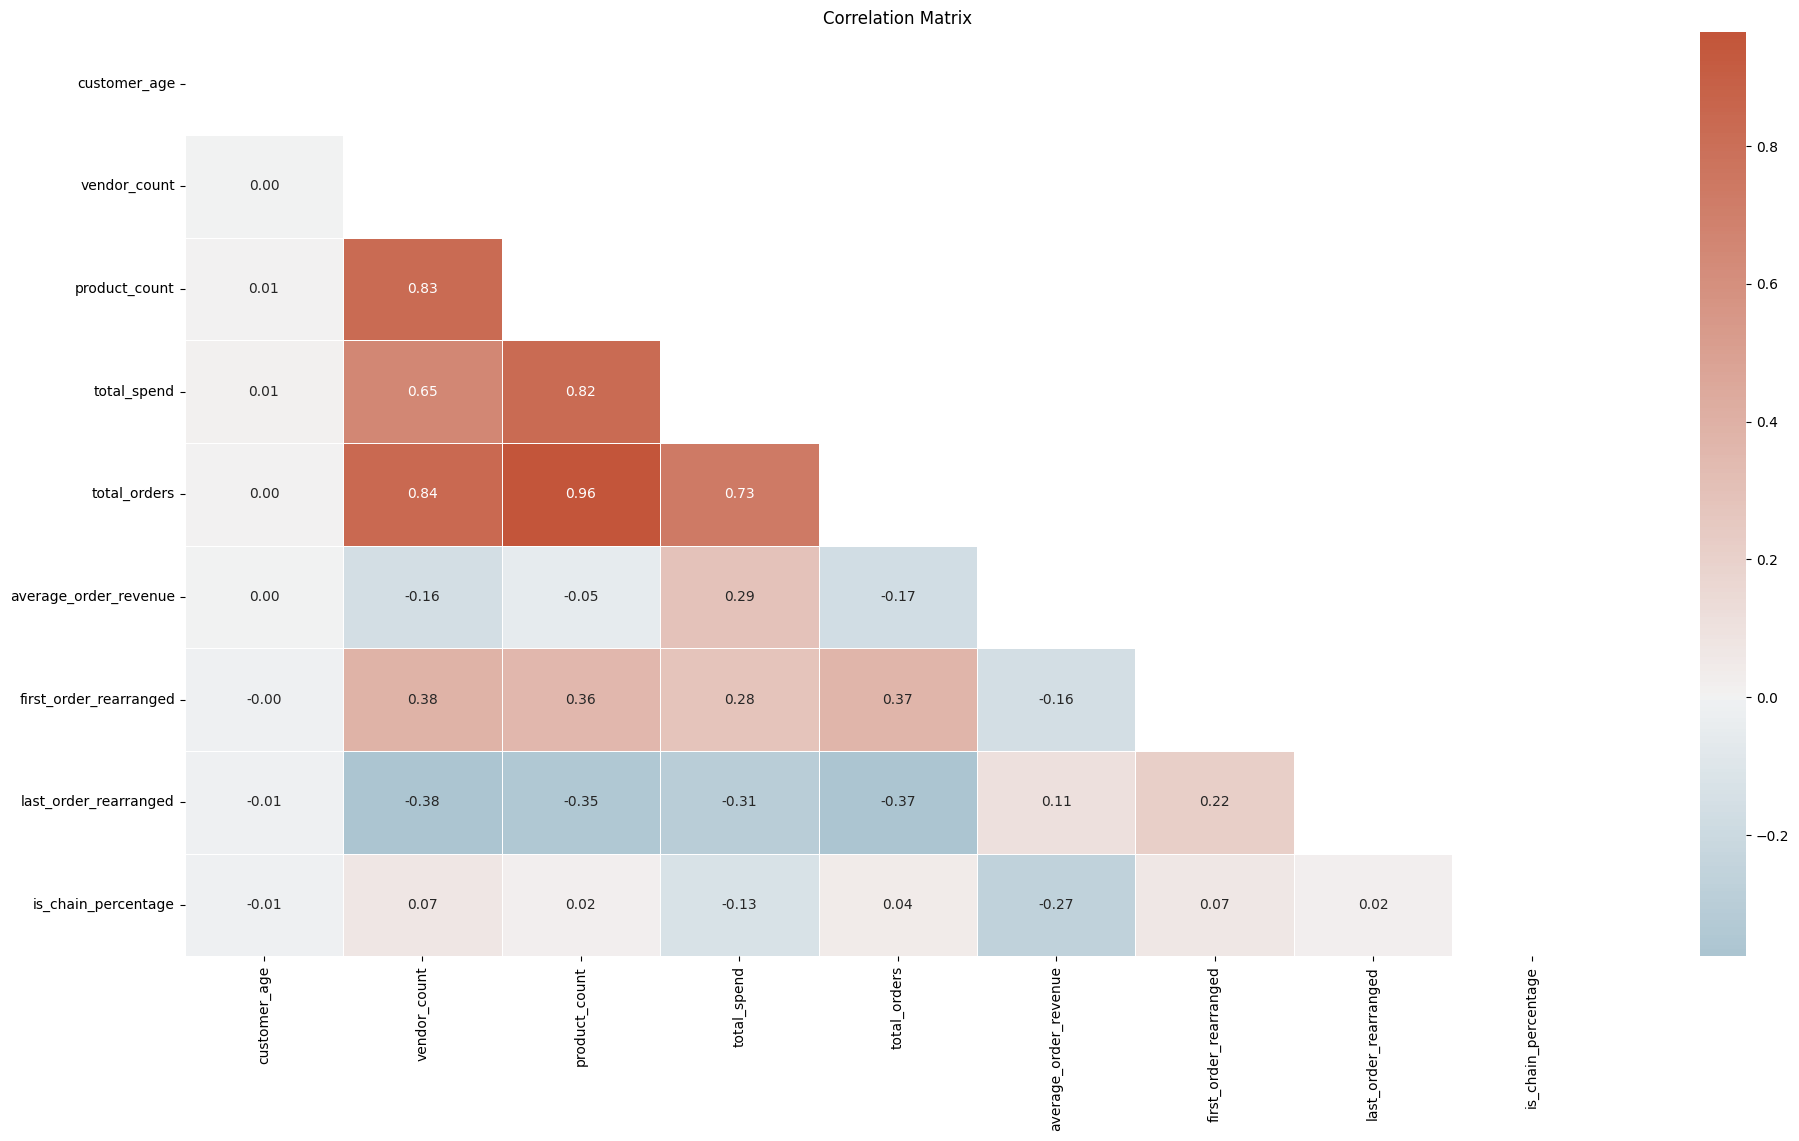

In [20]:
numerical_cols, categorical_cols = metric_non_features(df)

correlation_matrix = df[numerical_cols].corr()

upper_triangle = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(23, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation_matrix, mask=upper_triangle, annot=True, cmap=cmap, center=0, linewidths=0.5, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()

## 3.3 Handle Outliers

For outlier removal; 
- First, we will check  all variables skewness, if needed we will apply appropriate transformation. 
- Then all methods will be compared such as DBScan, IQR, Manual Removing, z-Score, etc. 
- After that the method we will lose less amount and meaningful data will be selected.

Analyzing Column: customer_age
Original Skewness: 1.5830
Log Transform Skewness: 0.7003
Square Root Transform Skewness: 1.0852


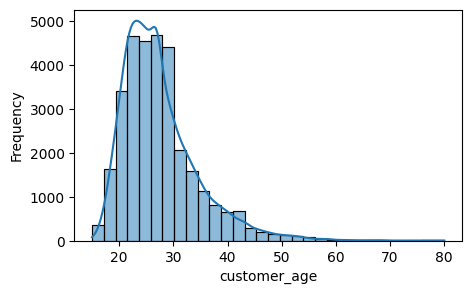

Analyzing Column: vendor_count
Original Skewness: 3.0260
Log Transform Skewness: 0.8242
Square Root Transform Skewness: 1.4037


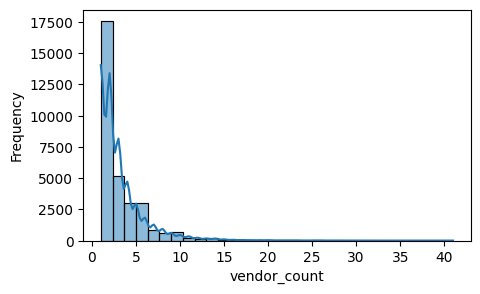

Analyzing Column: product_count
Original Skewness: 5.7121
Log Transform Skewness: 0.7613
Square Root Transform Skewness: 1.8098


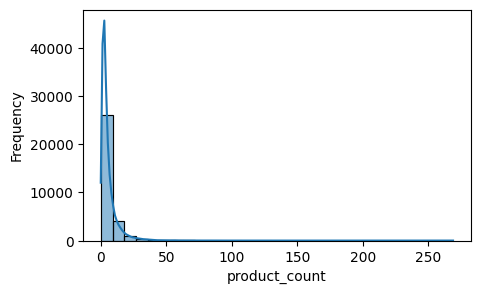

Analyzing Column: total_spend
Original Skewness: 4.8120
Log Transform Skewness: 0.1035
Square Root Transform Skewness: 1.6010


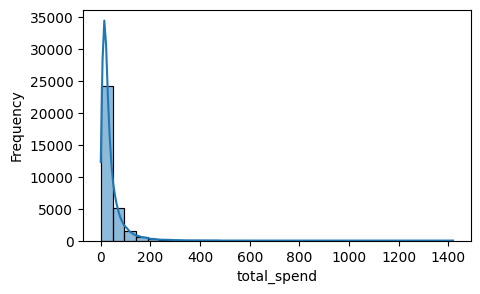

Analyzing Column: total_orders
Original Skewness: 4.5377
Log Transform Skewness: 0.8803
Square Root Transform Skewness: 1.8139


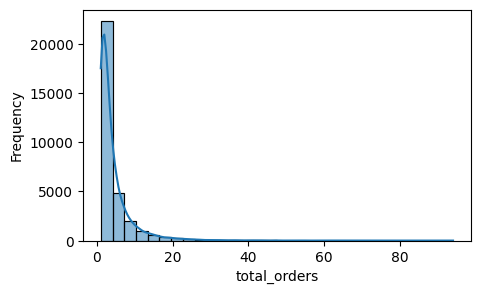

Analyzing Column: average_order_revenue
Original Skewness: 2.4425
Log Transform Skewness: 0.1595
Square Root Transform Skewness: 0.9748


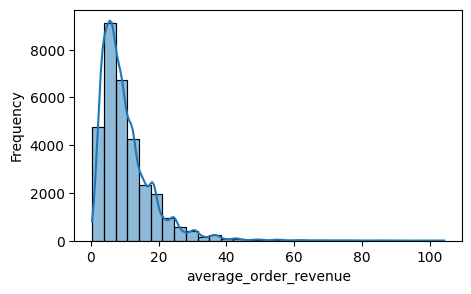

Analyzing Column: first_order_rearranged
Original Skewness: -0.7582
Log Transform Skewness: -2.2418
Square Root Transform Skewness: -1.3070


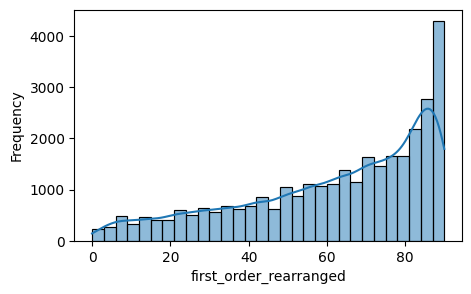

Analyzing Column: last_order_rearranged
Original Skewness: 0.9351
Log Transform Skewness: -0.4156
Square Root Transform Skewness: 0.2716


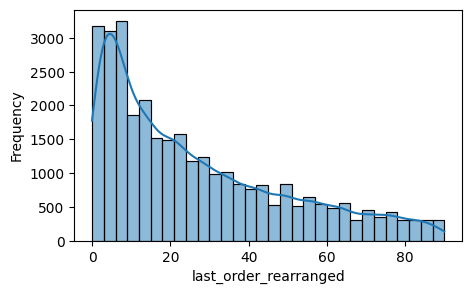

Analyzing Column: is_chain_percentage
Original Skewness: -0.5207
Log Transform Skewness: -0.7157
Square Root Transform Skewness: -1.0459


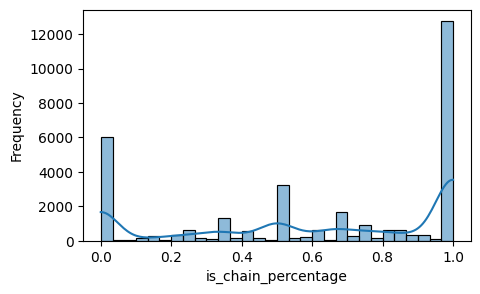

In [21]:
df_cluster = df[numerical_cols]
for column in numerical_cols:
    print(f"Analyzing Column: {column}")
    
    # Original skewness
    original_skew = sts.skew(df[column]) 
    print(f"Original Skewness: {original_skew:.4f}")
    
    # Log transformation 
    log_skew = sts.skew(np.log1p(df[column]))
    print(f"Log Transform Skewness: {log_skew:.4f}")
    
    # Square root transformation
    sqrt_skew = sts.skew(np.sqrt(df[column]))
    print(f"Square Root Transform Skewness: {sqrt_skew:.4f}")
    
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column].dropna(), bins=30, kde=True)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Skewness measures the asymmetry of the distribution:

- Positive skew: Right tail is longer.
- Negative skew: Left tail is longer.
- Values close to 0 indicate symmetry.


Compares the absolute values of skewness for:

- Original data.
- Log-transformed data.
- Square root-transformed data.

Selects the transformation with the smallest absolute skewness.

Analyzing Column: customer_age
Best Transformation: Log

Skewness: 0.7002713304407124


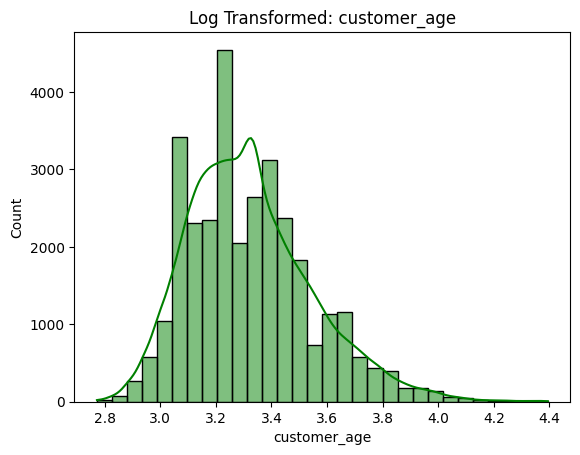

Analyzing Column: vendor_count
Best Transformation: Log

Skewness: 0.8242286921673979


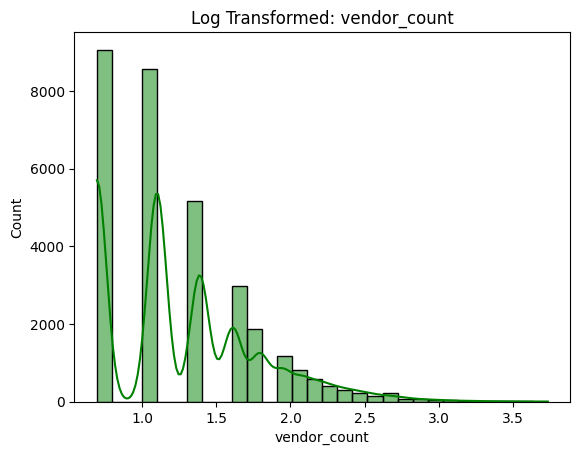

Analyzing Column: product_count
Best Transformation: Log

Skewness: 0.7612555634737908


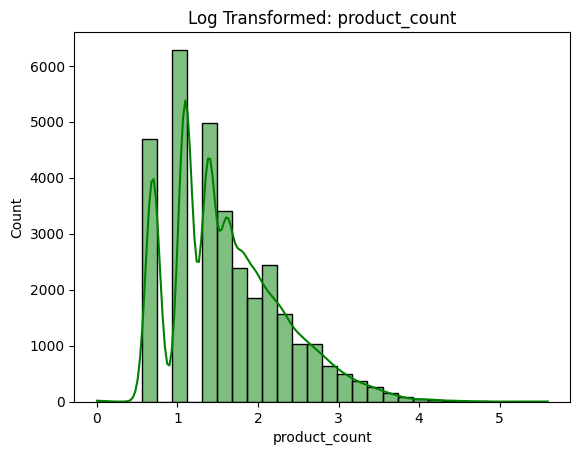

Analyzing Column: total_spend
Best Transformation: Log

Skewness: 0.10347494020305405


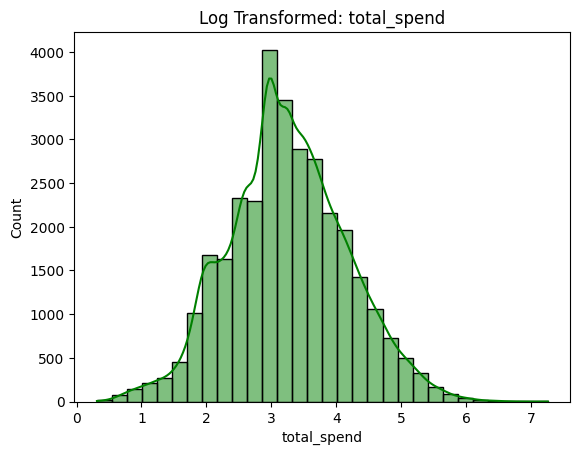

Analyzing Column: total_orders
Best Transformation: Log

Skewness: 0.880293429940788


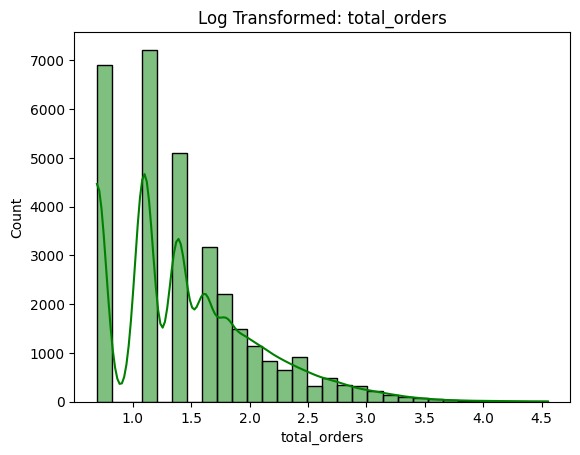

Analyzing Column: average_order_revenue
Best Transformation: Log

Skewness: 0.1594779948312446


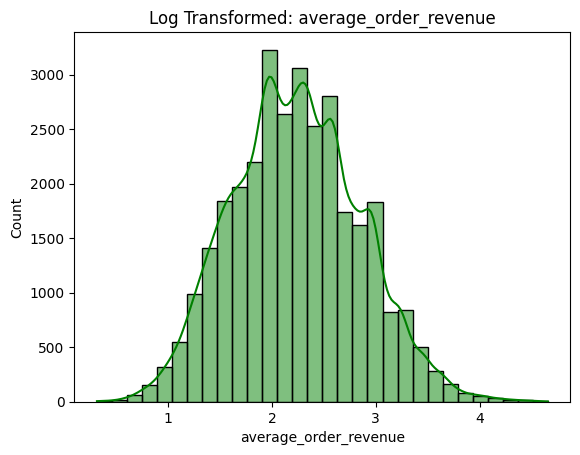

Analyzing Column: last_order_rearranged
Best Transformation: Square Root

Skewness: 0.2715550783791161


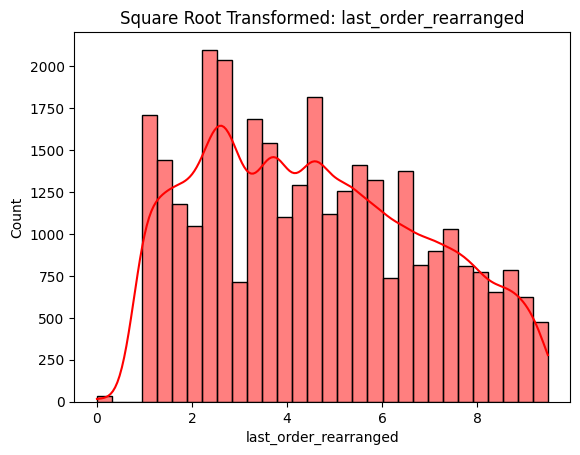

In [23]:
# Define a function to apply the transformation with the lowest skewness
def apply_transformation(column_name):
    print(f"Analyzing Column: {column_name}")
    
    
    original_skew = sts.skew(df[column].dropna())
    
    # Log Transformation
    log_skew = sts.skew(np.log1p(df[column_name].dropna()))

    
    # Square Root Transformation
    sqrt_skew = sts.skew(np.sqrt(df[column_name].dropna()))

    
    # Apply the best transformation based on skewness results
    if abs(log_skew) < abs(sqrt_skew) and abs(log_skew) < abs(original_skew):
        print(f"Best Transformation: Log\n")
        print(f"Skewness: {log_skew}")
        sns.histplot(np.log1p(df[column_name].dropna()), kde=True, color='green', bins=30)
        plt.title(f'Log Transformed: {column_name}')
        plt.show()
        return np.log1p(df[column_name].dropna())

    elif abs(sqrt_skew) < abs(log_skew) and abs(sqrt_skew) < abs(original_skew):
        print(f"Best Transformation: Square Root\n")
        print(f"Skewness: {sqrt_skew}")
        sns.histplot(np.sqrt(df[column_name].dropna()), kde=True, color='red', bins=30)
        plt.title(f'Square Root Transformed: {column_name}')
        plt.show()
        return np.sqrt(df[column_name].dropna())

    else:
        print(f"Best Transformation: None (Original)\n")
        print(f"Skewness: {original_skew}")
        sns.histplot(df[column].dropna(), kde=True, color='blue', bins=30)
        plt.title(f'Original Distribution: {column_name}')
        plt.show()
        return df[column].dropna()

for column in numerical_cols:
    if sts.skew(df[column]) > 0.5:  # Apply only if skewness is significant
        df_cluster[column] = apply_transformation(column)

In [24]:
df_cluster.head()

customer_age  vendor_count  product_count  total_spend  total_orders  \
0      2.944439      1.098612       1.791759     3.397189      1.098612   
1      2.890372      1.098612       1.098612     3.006178      1.098612   
2      3.663562      0.693147       1.098612     2.322388      1.098612   
3      3.332205      1.098612       1.386294     3.483085      1.098612   
4      3.044522      1.098612       1.791759     4.033178      1.098612   

   average_order_revenue  first_order_rearranged  last_order_rearranged  \
0               2.736962                    90.0               9.433981   
1               2.361326                    90.0               9.433981   
2               1.722767                    90.0               9.433981   
3               2.820188                    90.0               9.380832   
4               3.357594                    90.0               9.380832   

   is_chain_percentage  
0                  0.5  
1                  1.0  
2                  1.0  
3                  0.5  
4                  0.0

In [25]:
print(np.isinf(df_cluster).sum()) 

customer_age              0
vendor_count              0
product_count             0
total_spend               0
total_orders              0
average_order_revenue     0
first_order_rearranged    0
last_order_rearranged     0
is_chain_percentage       0
dtype: int64


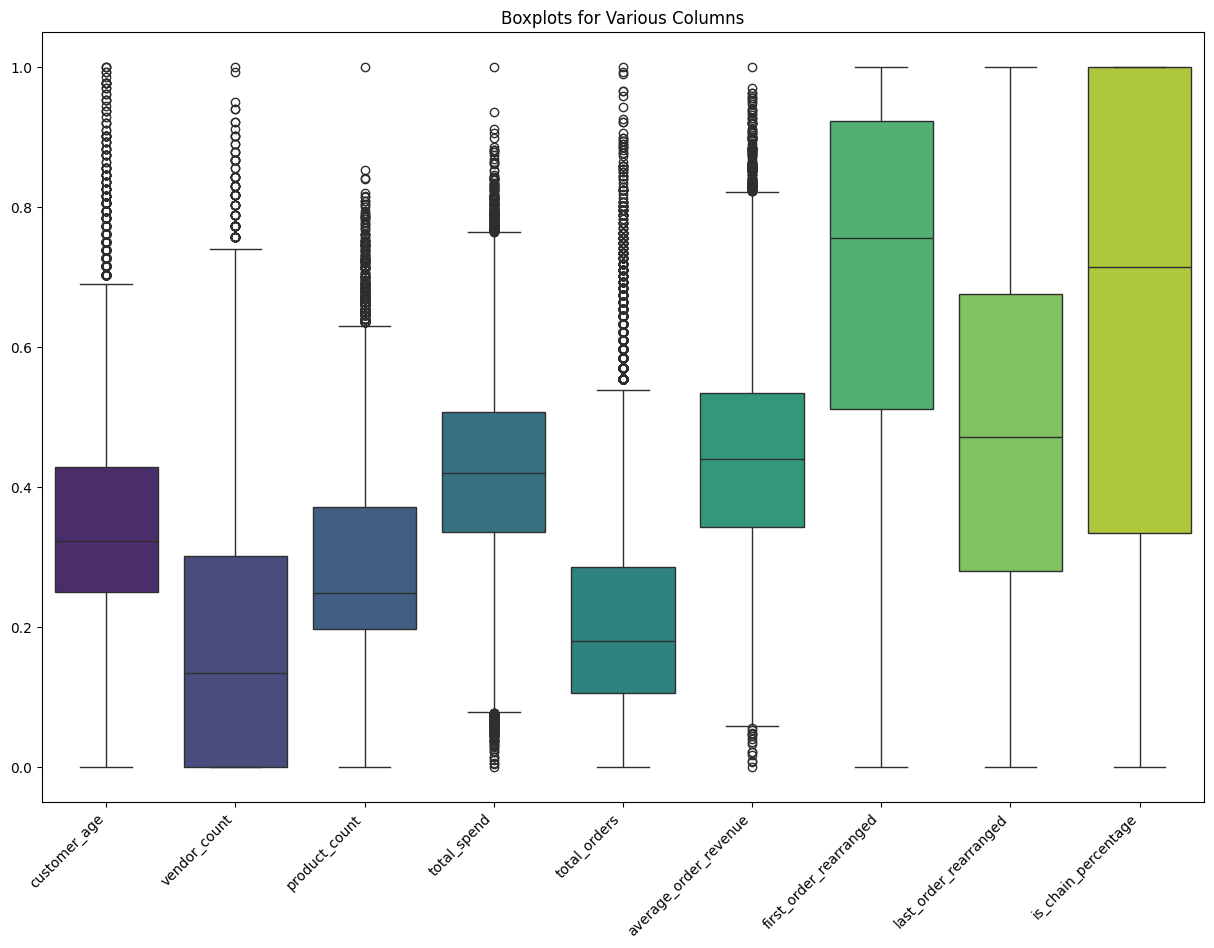

In [26]:
scaler = MinMaxScaler()

plt.figure(figsize=(15, 10))
sns.boxplot(data=pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns), orient='v', palette='viridis')
plt.title('Boxplots for Various Columns')
plt.xticks(rotation=45, ha='right')
plt.show()


### 3.3.1 IQR and Z-Score with Transformations

In [27]:
for col in df_cluster.columns:
    print(f"Column: {col}")
    
    # IQR method
    Q1 = df_cluster[col].quantile(0.25)
    Q3 = df_cluster[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = (df_cluster[col] < Q1 - 1.5 * IQR) | (df_cluster[col] > Q3 + 1.5 * IQR)
    
    # Z-score method
    col_z_scores = (df_cluster[col] - df_cluster[col].mean()) / df_cluster[col].std()
    outliers_zscore = (col_z_scores > 3) | (col_z_scores < -3)

    # Outlier information (IQR method)
    outliers_iqr_count = len(df_cluster[outliers_iqr])
    outliers_iqr_lower_bound = np.max(df_cluster[df_cluster[col] < Q1 - 1.5 * IQR][col]) if outliers_iqr_count > 0 else None
    outliers_iqr_upper_bound = np.min(df_cluster[df_cluster[col] > Q3 + 1.5 * IQR][col]) if outliers_iqr_count > 0 else None
    
    # Outlier information (Z-score method)
    outliers_zscore_count = len(df_cluster[outliers_zscore])
    outliers_zscore_lower_bound = np.min(df_cluster[outliers_zscore][col]) if outliers_zscore_count > 0 else None
    outliers_zscore_upper_bound = np.max(df_cluster[outliers_zscore][col]) if outliers_zscore_count > 0 else None
    
    # Print results
    print(f"Outliers (IQR) - count: {outliers_iqr_count}, lower bound: {outliers_iqr_lower_bound}, upper bound: {outliers_iqr_upper_bound}")
    print(f"Outliers (Z-score) - count: {outliers_zscore_count}, lower bound: {outliers_zscore_lower_bound}, upper bound: {outliers_zscore_upper_bound}")
    
    print("\n")

Column: customer_age
Outliers (IQR) - count: 502, lower bound: nan, upper bound: 3.912023005428146
Outliers (Z-score) - count: 220, lower bound: 4.007333185232471, upper bound: 4.394449154672439


Column: vendor_count
Outliers (IQR) - count: 105, lower bound: nan, upper bound: 2.995732273553991
Outliers (Z-score) - count: 206, lower bound: 2.833213344056216, upper bound: 3.7376696182833684


Column: product_count
Outliers (IQR) - count: 319, lower bound: nan, upper bound: 3.5553480614894135
Outliers (Z-score) - count: 185, lower bound: 3.713572066704308, upper bound: 5.598421958998375


Column: total_spend
Outliers (IQR) - count: 297, lower bound: 0.8501509293696101, upper bound: 5.621270053081737
Outliers (Z-score) - count: 60, lower bound: 0.31481073984003355, upper bound: 7.257940208262125


Column: total_orders
Outliers (IQR) - count: 1124, lower bound: nan, upper bound: 2.833213344056216
Outliers (Z-score) - count: 231, lower bound: 3.367295829986474, upper bound: 4.55387689160054

In [28]:
df_cluster

customer_age  vendor_count  product_count  total_spend  total_orders  \
0          2.944439      1.098612       1.791759     3.397189      1.098612   
1          2.890372      1.098612       1.098612     3.006178      1.098612   
2          3.663562      0.693147       1.098612     2.322388      1.098612   
3          3.332205      1.098612       1.386294     3.483085      1.098612   
4          3.044522      1.098612       1.791759     4.033178      1.098612   
...             ...           ...            ...          ...           ...   
31883      3.433987      0.693147       0.693147     2.946542      0.693147   
31884      3.332205      0.693147       0.693147     2.946542      0.693147   
31885      3.218876      0.693147       0.693147     2.933325      0.693147   
31886      3.555348      0.693147       0.693147     2.567254      0.693147   
31887      3.433987      0.693147       0.693147     2.187174      0.693147   

       average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                   2.736962                    90.0               9.433981   
1                   2.361326                    90.0               9.433981   
2                   1.722767                    90.0               9.433981   
3                   2.820188                    90.0               9.380832   
4                   3.357594                    90.0               9.380832   
...                      ...                     ...                    ...   
31883               2.946542                    68.0               9.486833   
31884               2.946542                    68.0               9.486833   
31885               2.933325                    68.0               9.486833   
31886               2.567254                    68.0               9.486833   
31887               2.187174                    68.0               9.486833   

       is_chain_percentage  
0                      0.5  
1                      1.0  
2                      1.0  
3                      0.5  
4                      0.0  
...                    ...  
31883                  1.0  
31884                  0.0  
31885                  1.0  
31886                  0.0  
31887                  0.0  

[31750 rows x 9 columns]

In [29]:
np.random.seed(42)

df_dbscan = df_cluster.copy()

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_dbscan)

epsilon = 0.2  # Radius for neighborhood - We selected this value after trying different values - you can see different values in the rest of the cells of the notebook
min_samples = 3  # Minimum samples to form a cluster - We selected this value after trying different values
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, n_jobs=4)
df_dbscan['Cluster'] = dbscan.fit_predict(df_scaled)

# Identify and separate outliers
outliers = df_dbscan[df_dbscan['Cluster'] == -1]

# Display cluster counts
cluster_counts = pd.Series(dbscan.labels_).value_counts()
print("Cluster Counts:\n", cluster_counts)



Cluster Counts:
  0    31453
-1      294
 1        3
Name: count, dtype: int64


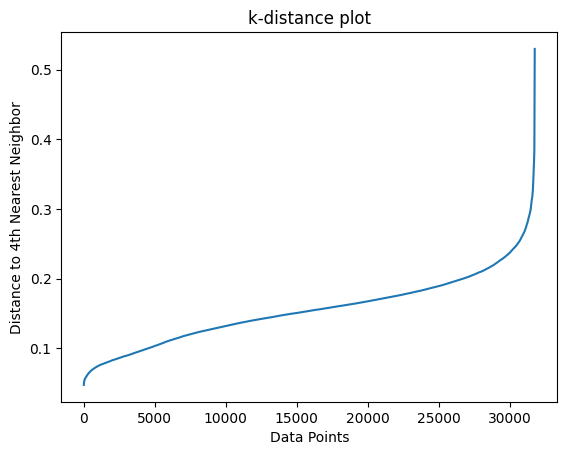

In [32]:
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_scaled)
distances, _ = neigh.kneighbors(df_scaled)
distances = np.sort(distances[:, -1])  # 4th neighbor distance (min_samples - 1)
plt.plot(distances)
plt.title("k-distance plot")
plt.xlabel("Data Points")
plt.ylabel("Distance to 4th Nearest Neighbor")
plt.show()
#Epsilon value is selected as 0.2 since it is the point where the curve starts to flatten.

In [33]:
print("Silhouette Score:", silhouette_score(df_scaled, dbscan.labels_))

Silhouette Score: 0.039296883787710436


locator: <matplotlib.ticker.AutoLocator object at 0x0000022644F80E80>


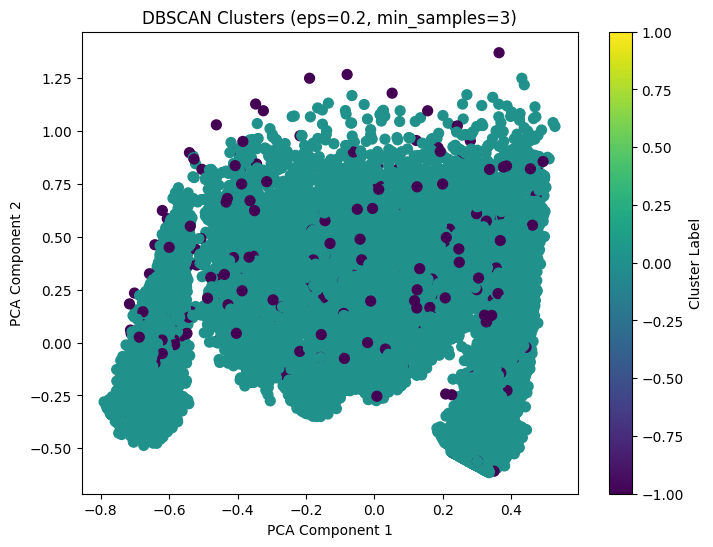

eps=0.2, min_samples=3:
Number of clusters (excluding noise): 2
Number of noise points: 294


locator: <matplotlib.ticker.AutoLocator object at 0x000002264B0CBD00>


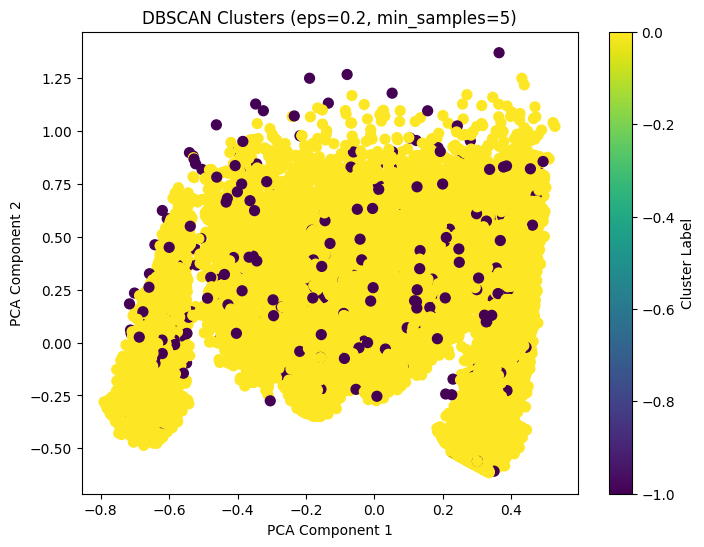

eps=0.2, min_samples=5:
Number of clusters (excluding noise): 1
Number of noise points: 368


locator: <matplotlib.ticker.AutoLocator object at 0x00000226454F3160>


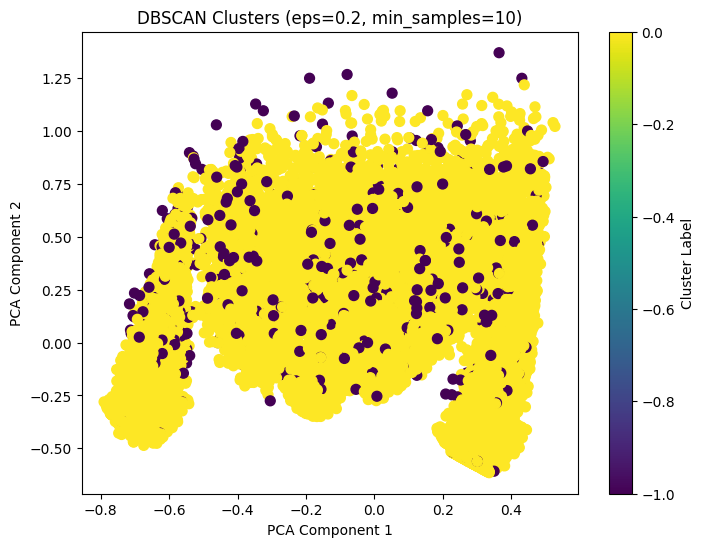

eps=0.2, min_samples=10:
Number of clusters (excluding noise): 1
Number of noise points: 574


locator: <matplotlib.ticker.AutoLocator object at 0x00000226455A1E50>


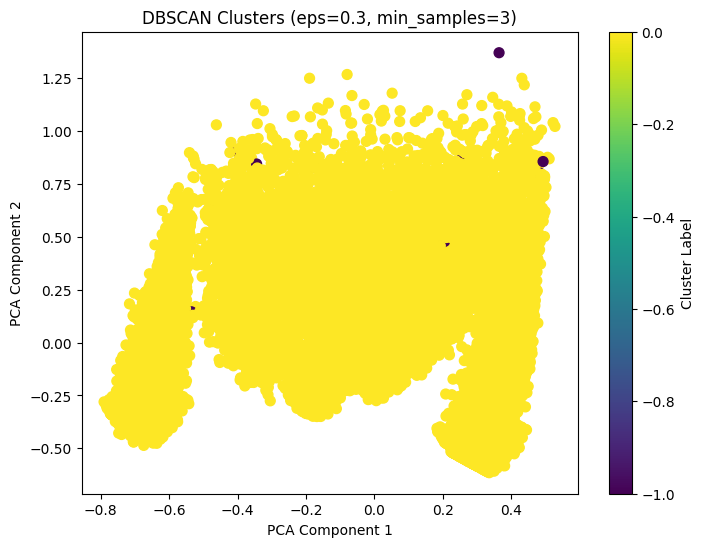

eps=0.3, min_samples=3:
Number of clusters (excluding noise): 1
Number of noise points: 10


locator: <matplotlib.ticker.AutoLocator object at 0x00000226455F44C0>


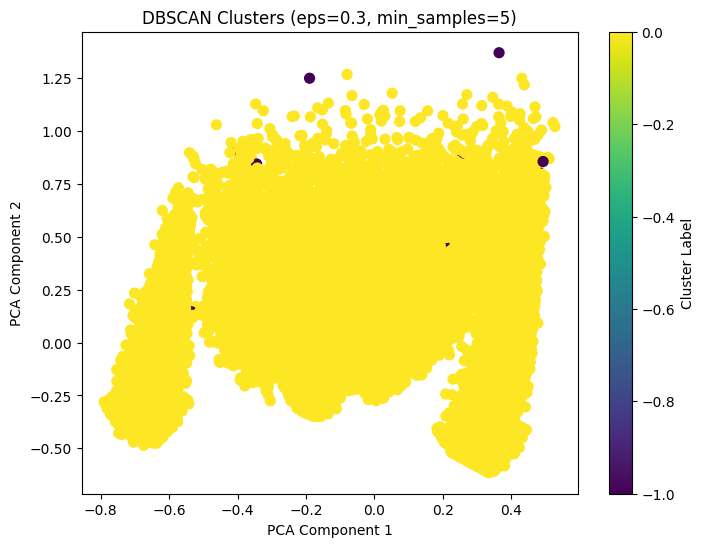

eps=0.3, min_samples=5:
Number of clusters (excluding noise): 1
Number of noise points: 11


locator: <matplotlib.ticker.AutoLocator object at 0x00000226467FE4C0>


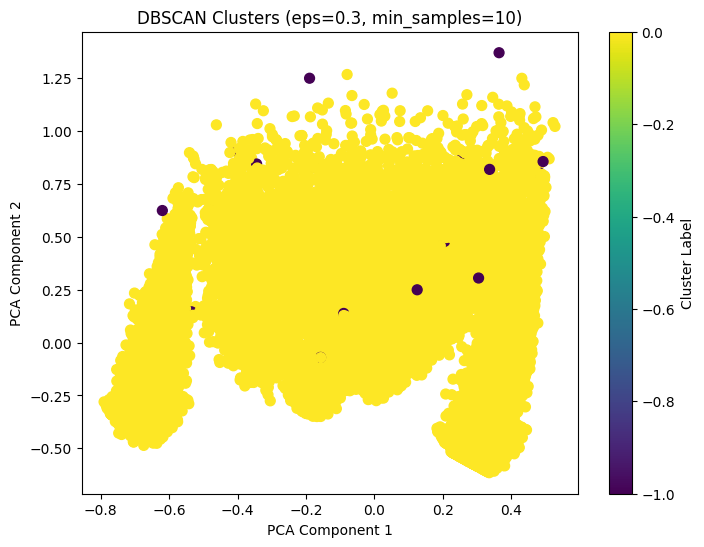

eps=0.3, min_samples=10:
Number of clusters (excluding noise): 1
Number of noise points: 18


colorbar update normal <matplotlib.colors.Normalize object at 0x000002264B0184F0> <matplotlib.colors.Normalize object at 0x000002264B0184F0>
locator: <matplotlib.ticker.AutoLocator object at 0x000002264B009700>
colorbar update normal <matplotlib.colors.Normalize object at 0x000002264B0184F0> <matplotlib.colors.Normalize object at 0x000002264B0184F0>
locator: <matplotlib.ticker.AutoLocator object at 0x000002264B009700>
locator: <matplotlib.ticker.AutoLocator object at 0x000002264B009640>


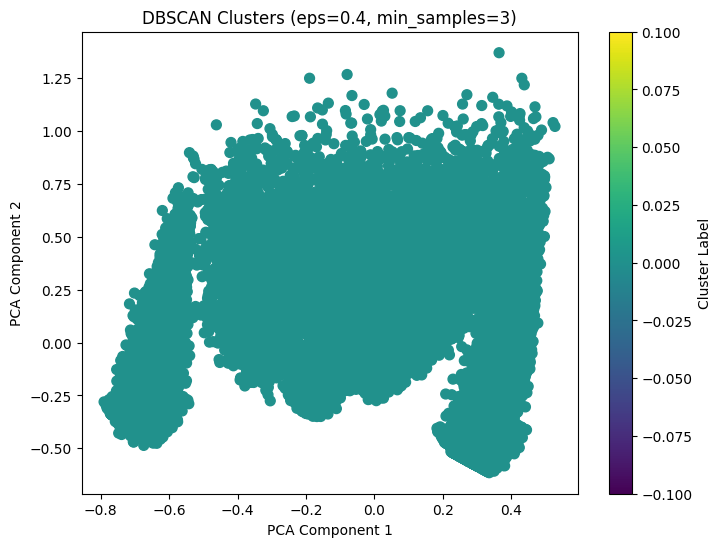

eps=0.4, min_samples=3:
Number of clusters (excluding noise): 1
Number of noise points: 0


colorbar update normal <matplotlib.colors.Normalize object at 0x0000022645614220> <matplotlib.colors.Normalize object at 0x0000022645614220>
locator: <matplotlib.ticker.AutoLocator object at 0x000002264560F5B0>
colorbar update normal <matplotlib.colors.Normalize object at 0x0000022645614220> <matplotlib.colors.Normalize object at 0x0000022645614220>
locator: <matplotlib.ticker.AutoLocator object at 0x000002264560F5B0>
locator: <matplotlib.ticker.AutoLocator object at 0x000002264560FC10>


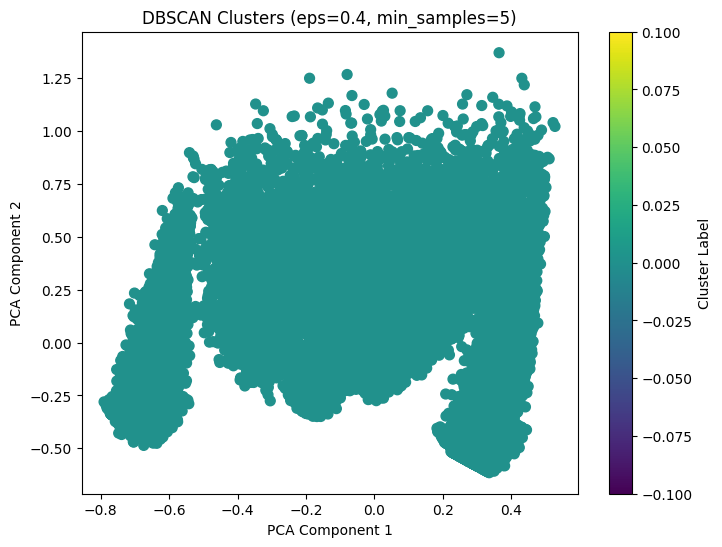

eps=0.4, min_samples=5:
Number of clusters (excluding noise): 1
Number of noise points: 0


colorbar update normal <matplotlib.colors.Normalize object at 0x00000226464277F0> <matplotlib.colors.Normalize object at 0x00000226464277F0>
locator: <matplotlib.ticker.AutoLocator object at 0x000002264B100CA0>
colorbar update normal <matplotlib.colors.Normalize object at 0x00000226464277F0> <matplotlib.colors.Normalize object at 0x00000226464277F0>
locator: <matplotlib.ticker.AutoLocator object at 0x000002264B100CA0>
locator: <matplotlib.ticker.AutoLocator object at 0x000002264B100BB0>


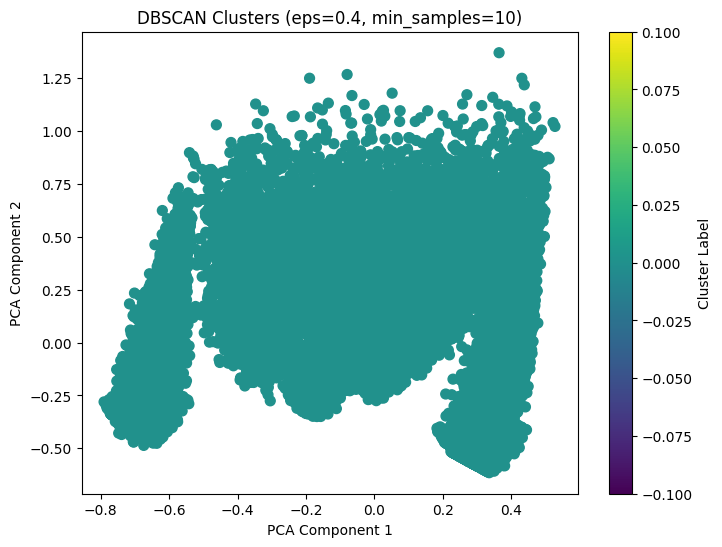

eps=0.4, min_samples=10:
Number of clusters (excluding noise): 1
Number of noise points: 0


colorbar update normal <matplotlib.colors.Normalize object at 0x0000022645F8E6D0> <matplotlib.colors.Normalize object at 0x0000022645F8E6D0>
locator: <matplotlib.ticker.AutoLocator object at 0x0000022644FCA9A0>
colorbar update normal <matplotlib.colors.Normalize object at 0x0000022645F8E6D0> <matplotlib.colors.Normalize object at 0x0000022645F8E6D0>
locator: <matplotlib.ticker.AutoLocator object at 0x0000022644FCA9A0>
locator: <matplotlib.ticker.AutoLocator object at 0x0000022644FCA820>


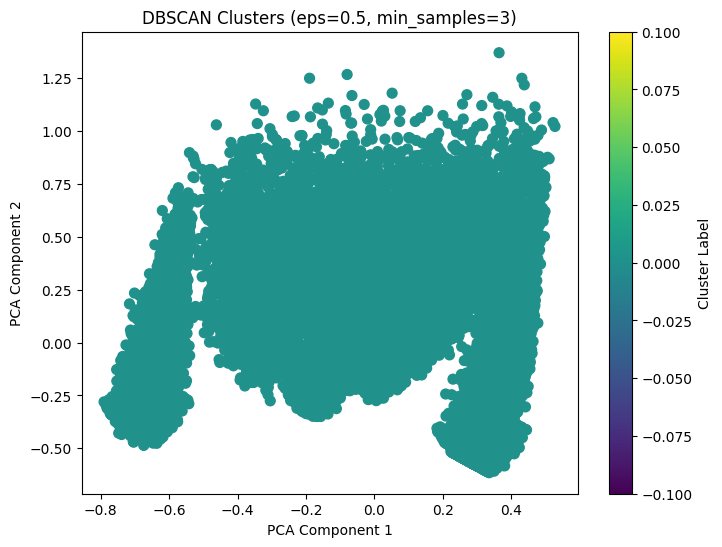

eps=0.5, min_samples=3:
Number of clusters (excluding noise): 1
Number of noise points: 0


colorbar update normal <matplotlib.colors.Normalize object at 0x0000022645EB0850> <matplotlib.colors.Normalize object at 0x0000022645EB0850>
locator: <matplotlib.ticker.AutoLocator object at 0x00000226462597F0>
colorbar update normal <matplotlib.colors.Normalize object at 0x0000022645EB0850> <matplotlib.colors.Normalize object at 0x0000022645EB0850>
locator: <matplotlib.ticker.AutoLocator object at 0x00000226462597F0>
locator: <matplotlib.ticker.AutoLocator object at 0x00000226462596A0>


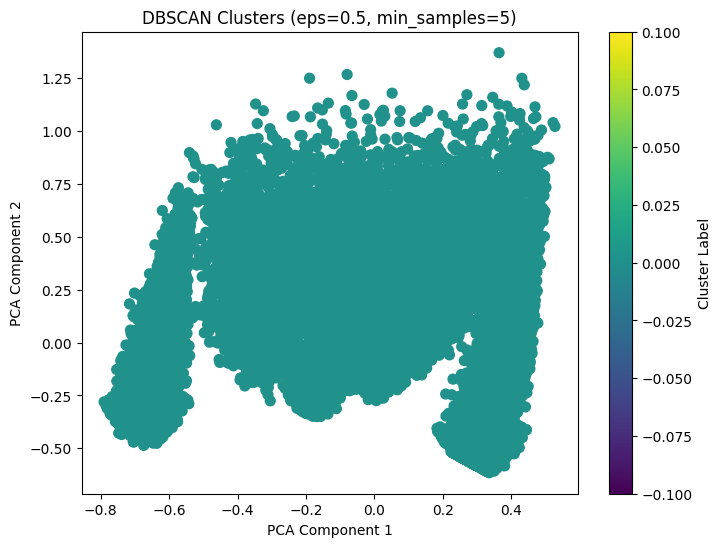

eps=0.5, min_samples=5:
Number of clusters (excluding noise): 1
Number of noise points: 0


colorbar update normal <matplotlib.colors.Normalize object at 0x0000022645D88DF0> <matplotlib.colors.Normalize object at 0x0000022645D88DF0>
locator: <matplotlib.ticker.AutoLocator object at 0x0000022645D8E4C0>
colorbar update normal <matplotlib.colors.Normalize object at 0x0000022645D88DF0> <matplotlib.colors.Normalize object at 0x0000022645D88DF0>
locator: <matplotlib.ticker.AutoLocator object at 0x0000022645D8E4C0>
locator: <matplotlib.ticker.AutoLocator object at 0x0000022645D8E3A0>


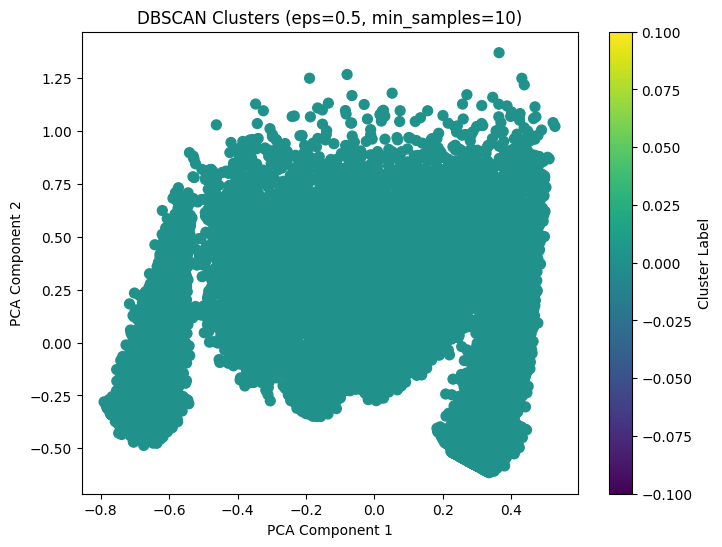

eps=0.5, min_samples=10:
Number of clusters (excluding noise): 1
Number of noise points: 0


In [34]:
# We tried multiple values for epsilon and min_samples, and selected the best values based on the silhouette score.
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_cluster)

# To visualize the clusters, we reduced the dimensions to 2 using PCA
pca = PCA(n_components=4)
df_reduced = pca.fit_transform(df_scaled)

# Test different eps and min_samples values
for eps in [0.2, 0.3, 0.4, 0.5]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)

        # Plot results
        plt.figure(figsize=(8, 6))
        plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=labels, cmap='viridis', s=50)
        plt.title(f"DBSCAN Clusters (eps={eps}, min_samples={min_samples})")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.colorbar(label="Cluster Label")
        plt.show()

        # Print cluster summary
        print(f"eps={eps}, min_samples={min_samples}:")
        print(f"Number of clusters (excluding noise): {len(set(labels)) - (1 if -1 in labels else 0)}")
        print(f"Number of noise points: {(labels == -1).sum()}")

### 3.3.2 DBSCAN

In [35]:
np.random.seed(42)

df_dbscan = df_cluster.copy()

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_dbscan)

# Apply DBSCAN with the specified parameters
epsilon = 0.3  
min_samples = 5 
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df_dbscan['Cluster'] = dbscan.fit_predict(df_scaled)

# Identify outliers (Cluster == -1)
outliers = df_dbscan[df_dbscan['Cluster'] == -1]

# Set the cluster as the index
df_dbscan.set_index('Cluster', inplace=True)

# Display the count of each cluster
cluster_counts = pd.Series(dbscan.labels_).value_counts()
print(cluster_counts)

 0    31739
-1       11
Name: count, dtype: int64


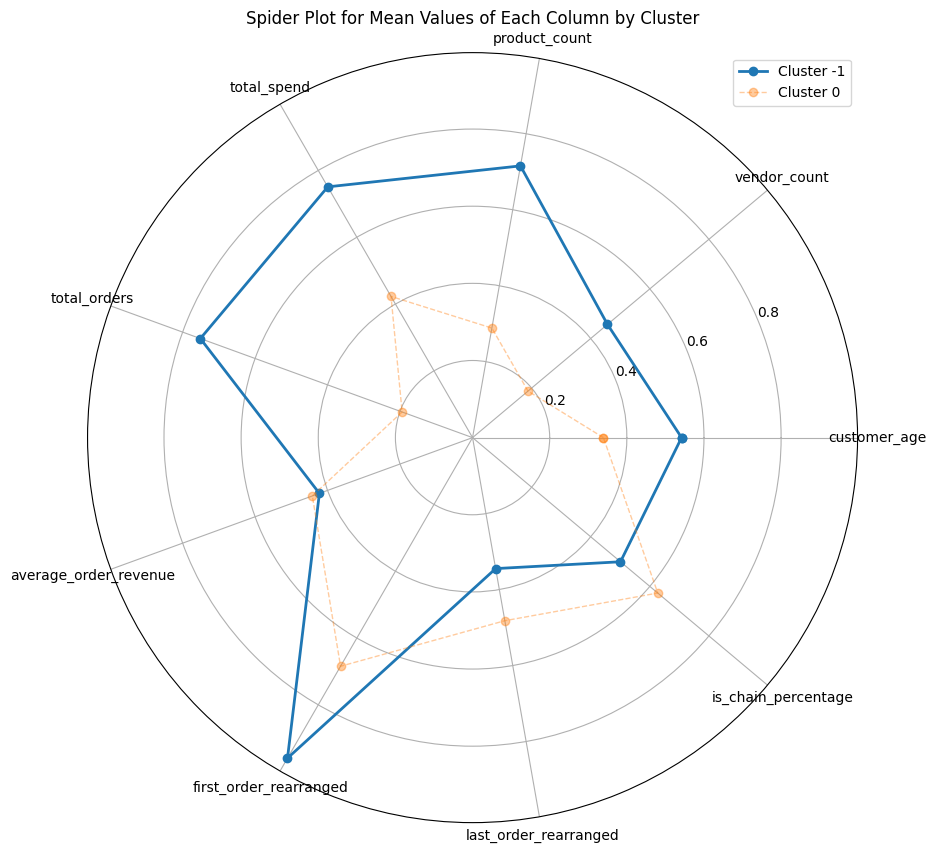

In [36]:
normalized_data = (df_dbscan - df_dbscan.min()) / (df_dbscan.max() - df_dbscan.min())

grouped_data = normalized_data.groupby(normalized_data.index).mean()

normalized_data = grouped_data

num_categories = len(grouped_data.columns)

angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles.append(angles[0])

plt.figure(figsize=(10, 10))
for i in range(len(normalized_data)):
    values = normalized_data.iloc[i].tolist()
    values.append(values[0])
    if normalized_data.index[i] == -1:
        plt.polar(angles, values, marker='o', linestyle='-', linewidth=2, label=f'Cluster {normalized_data.index[i]}')
    else:
        plt.polar(angles, values, marker='o', linestyle='--', linewidth=1, alpha=0.4, label=f'Cluster {normalized_data.index[i]}')

plt.xticks(angles[:-1], grouped_data.columns)
plt.legend(loc='upper right')
plt.title('Spider Plot for Mean Values of Each Column by Cluster')

plt.show()

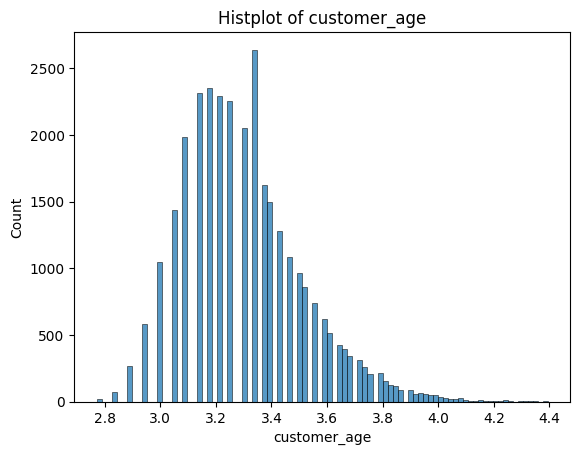

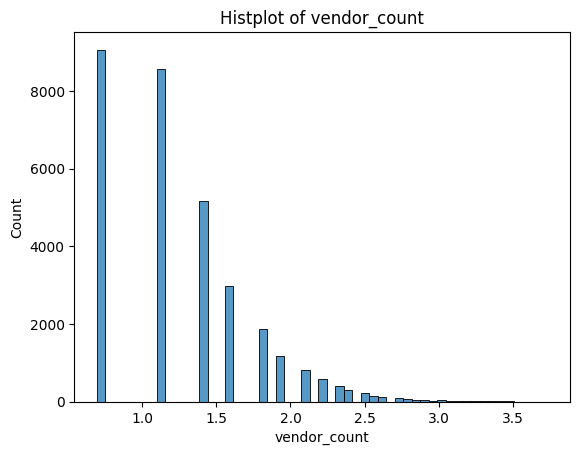

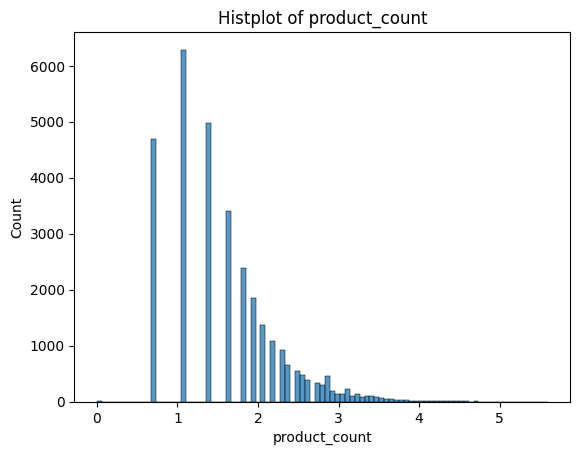

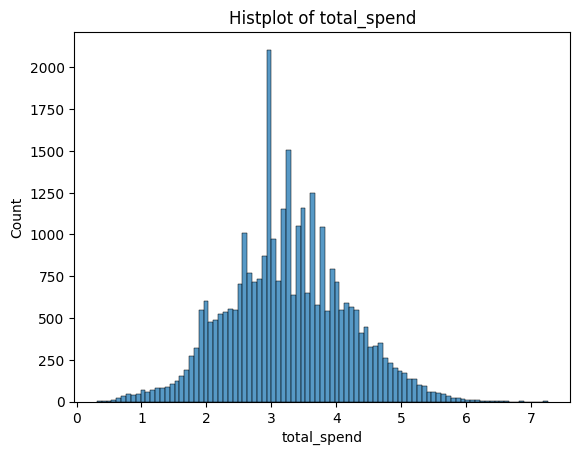

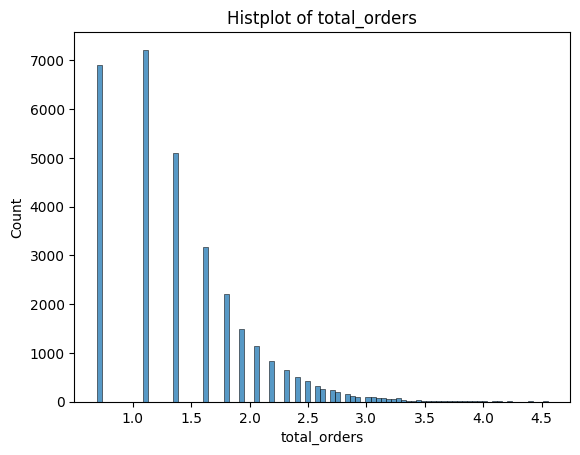

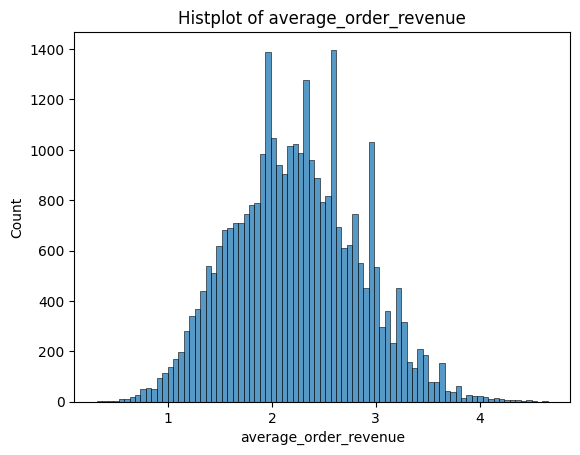

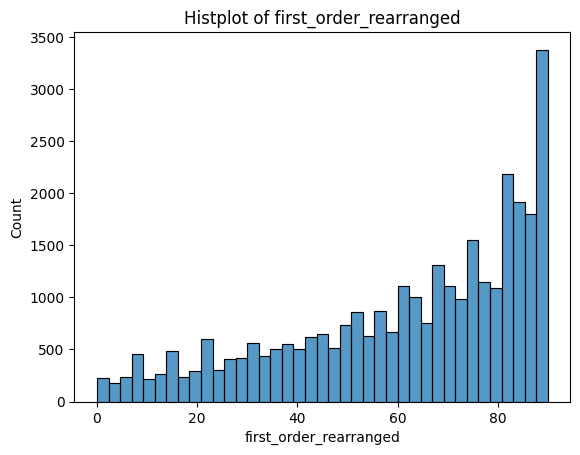

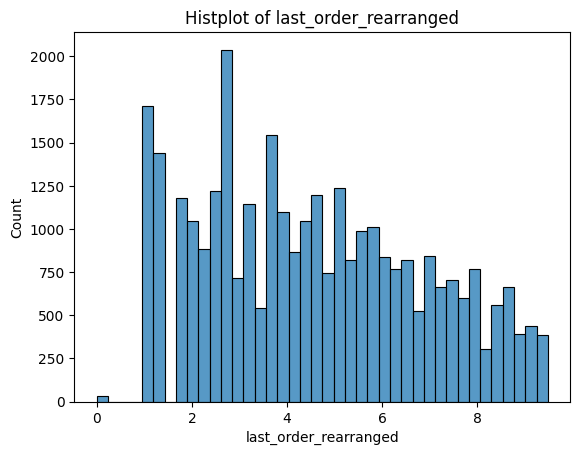

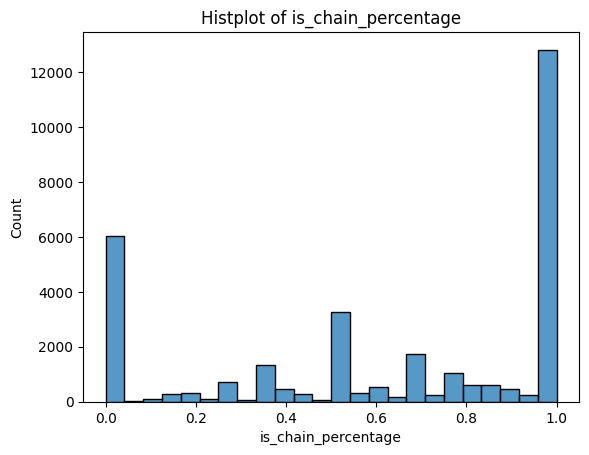

In [37]:
for i in (df_cluster.columns):
    sns.histplot(df_cluster, x = i)
    plt.title('Histplot of ' + str(i))
    plt.show()

In [38]:
df_cluster

customer_age  vendor_count  product_count  total_spend  total_orders  \
0          2.944439      1.098612       1.791759     3.397189      1.098612   
1          2.890372      1.098612       1.098612     3.006178      1.098612   
2          3.663562      0.693147       1.098612     2.322388      1.098612   
3          3.332205      1.098612       1.386294     3.483085      1.098612   
4          3.044522      1.098612       1.791759     4.033178      1.098612   
...             ...           ...            ...          ...           ...   
31883      3.433987      0.693147       0.693147     2.946542      0.693147   
31884      3.332205      0.693147       0.693147     2.946542      0.693147   
31885      3.218876      0.693147       0.693147     2.933325      0.693147   
31886      3.555348      0.693147       0.693147     2.567254      0.693147   
31887      3.433987      0.693147       0.693147     2.187174      0.693147   

       average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                   2.736962                    90.0               9.433981   
1                   2.361326                    90.0               9.433981   
2                   1.722767                    90.0               9.433981   
3                   2.820188                    90.0               9.380832   
4                   3.357594                    90.0               9.380832   
...                      ...                     ...                    ...   
31883               2.946542                    68.0               9.486833   
31884               2.946542                    68.0               9.486833   
31885               2.933325                    68.0               9.486833   
31886               2.567254                    68.0               9.486833   
31887               2.187174                    68.0               9.486833   

       is_chain_percentage  
0                      0.5  
1                      1.0  
2                      1.0  
3                      0.5  
4                      0.0  
...                    ...  
31883                  1.0  
31884                  0.0  
31885                  1.0  
31886                  0.0  
31887                  0.0  

[31750 rows x 9 columns]

In [39]:
df_cluster['outliers_hand'] = ((df_cluster['customer_age'] > 4.0) 
            | (df_cluster['vendor_count'] < 0.5)
            | (df_cluster['product_count'] < 0.5)
            | (df_cluster['total_spend'] > 5 )
            | (df_cluster['total_spend'] < 1)
            | (df_cluster['total_orders'] > 2.5)
            | (df_cluster['average_order_revenue'] > 4)
            | (df_cluster['average_order_revenue'] < 1))

In [40]:
for k in range(len(df_cluster.columns)-1):
    i = df_cluster.columns[k]

    # IQR method
    Q1 = df_cluster[i].quantile(0.25)
    Q3 = df_cluster[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr += (df_cluster[i] < Q1 - 1.5 * IQR) | (df_cluster[i] > Q3 + 1.5 * IQR)
    
    # Z-score method
    df_cluster['Zscore'] = (df_cluster[i] - df_cluster[i].mean()) / df_cluster[i].std()
    outliers_zscore += (df_cluster['Zscore'] > 3) | (df_cluster['Zscore'] < -3)
    df_cluster.drop(columns = ['Zscore'], inplace = True)
df_cluster['outliers_zscore'] = outliers_zscore
df_cluster['outliers_iqr'] = outliers_iqr
df_cluster['outliers_dbscan'] = list(pd.Series(df_dbscan.index).apply(lambda x: True if x == -1 else False))
clear_output()
df_cluster

customer_age  vendor_count  product_count  total_spend  total_orders  \
0          2.944439      1.098612       1.791759     3.397189      1.098612   
1          2.890372      1.098612       1.098612     3.006178      1.098612   
2          3.663562      0.693147       1.098612     2.322388      1.098612   
3          3.332205      1.098612       1.386294     3.483085      1.098612   
4          3.044522      1.098612       1.791759     4.033178      1.098612   
...             ...           ...            ...          ...           ...   
31883      3.433987      0.693147       0.693147     2.946542      0.693147   
31884      3.332205      0.693147       0.693147     2.946542      0.693147   
31885      3.218876      0.693147       0.693147     2.933325      0.693147   
31886      3.555348      0.693147       0.693147     2.567254      0.693147   
31887      3.433987      0.693147       0.693147     2.187174      0.693147   

       average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                   2.736962                    90.0               9.433981   
1                   2.361326                    90.0               9.433981   
2                   1.722767                    90.0               9.433981   
3                   2.820188                    90.0               9.380832   
4                   3.357594                    90.0               9.380832   
...                      ...                     ...                    ...   
31883               2.946542                    68.0               9.486833   
31884               2.946542                    68.0               9.486833   
31885               2.933325                    68.0               9.486833   
31886               2.567254                    68.0               9.486833   
31887               2.187174                    68.0               9.486833   

       is_chain_percentage  outliers_hand  outliers_zscore  outliers_iqr  \
0                      0.5          False            False         False   
1                      1.0          False            False         False   
2                      1.0          False            False         False   
3                      0.5          False            False         False   
4                      0.0          False            False         False   
...                    ...            ...              ...           ...   
31883                  1.0          False            False         False   
31884                  0.0          False            False         False   
31885                  1.0          False            False         False   
31886                  0.0          False            False         False   
31887                  0.0          False            False         False   

       outliers_dbscan  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
31883            False  
31884            False  
31885            False  
31886            False  
31887            False  

[31750 rows x 13 columns]

In [41]:
df_cluster['outliers_zscore'].value_counts()

outliers_zscore
False    31111
True       639
Name: count, dtype: int64

In [42]:
# We want to see the percentage of outliers in each method.
columns = ['outliers_iqr', 'outliers_zscore', 'outliers_hand', 'outliers_dbscan']

for col in columns:
    print(f"\n{col}:")
    value_counts = df_cluster[col].value_counts()
    print(value_counts.head())
    total_values = df_cluster[col].shape[0]
    percentage_outliers = (value_counts / total_values) * 100
    print(f"Percentage of outliers in {col}:")
    print(percentage_outliers)



outliers_iqr:
outliers_iqr
False    29852
True      1898
Name: count, dtype: int64
Percentage of outliers in outliers_iqr:
outliers_iqr
False    94.022047
True      5.977953
Name: count, dtype: float64

outliers_zscore:
outliers_zscore
False    31111
True       639
Name: count, dtype: int64
Percentage of outliers in outliers_zscore:
outliers_zscore
False    97.987402
True      2.012598
Name: count, dtype: float64

outliers_hand:
outliers_hand
False    28567
True      3183
Name: count, dtype: int64
Percentage of outliers in outliers_hand:
outliers_hand
False    89.974803
True     10.025197
Name: count, dtype: float64

outliers_dbscan:
outliers_dbscan
False    31739
True        11
Name: count, dtype: int64
Percentage of outliers in outliers_dbscan:
outliers_dbscan
False    99.965354
True      0.034646
Name: count, dtype: float64


We decided to use zscore outlier removal tecnique since we do not want to remove more meaningful variables using IQR method. At the same time, DBscan did not removed almost any outliers in our dataset which is why we decided to continue our process with z score based outlier removal technique. 

In [38]:
## Drop the existing outlier columns if they exist
#df_cluster.drop(columns=['outliers_iqr', 'outliers_zscore', 'outliers_hand', 'outliers_dbscan'], inplace=True)
#
## Store the initial number of rows
#initial_rows = len(df_cluster)
#
## Initialize the DBSCAN model
#dbscan = DBSCAN(eps=0.3, min_samples=5) 
#
## Loop through each column to identify and remove outliers using DBSCAN
#for col in df_cluster.columns:
#    print(f"\nProcessing column: {col}")
#    
#    # Reshape the column into a 2D array for DBSCAN (DBSCAN expects 2D input)
#    col_data = df_cluster[col].values.reshape(-1, 1)
#
#    # Fit DBSCAN to the column data
#    dbscan.fit(col_data)
#    
#    # Get the labels from DBSCAN (-1 indicates noise/outliers)
#    outliers_dbscan = dbscan.labels_ == -1
#    
#    # Output the count of outliers found
#    outliers_dbscan_count = np.sum(outliers_dbscan)
#    print(f"Found {outliers_dbscan_count} outliers in {col} based on DBSCAN")
#
#    # Calculate the percentage of outliers removed for this column
#    outliers_percentage = (outliers_dbscan_count / initial_rows) * 100
#    print(f"Percentage of outliers removed from {col}: {outliers_percentage:.2f}%")
#    
#    # Remove the rows with outliers in this column
#    df_cluster = df_cluster[~outliers_dbscan]
#
## Print the shape of the dataset after removing outliers
#print(f"\nShape of the dataset after removing outliers based on DBSCAN: {df_cluster.shape}")



Processing column: customer_age
Found 0 outliers in customer_age based on DBSCAN
Percentage of outliers removed from customer_age: 0.00%

Processing column: vendor_count
Found 0 outliers in vendor_count based on DBSCAN
Percentage of outliers removed from vendor_count: 0.00%

Processing column: product_count
Found 0 outliers in product_count based on DBSCAN
Percentage of outliers removed from product_count: 0.00%

Processing column: is_chain
Found 0 outliers in is_chain based on DBSCAN
Percentage of outliers removed from is_chain: 0.00%

Processing column: first_order
Found 0 outliers in first_order based on DBSCAN
Percentage of outliers removed from first_order: 0.00%

Processing column: last_order
Found 0 outliers in last_order based on DBSCAN
Percentage of outliers removed from last_order: 0.00%

Processing column: total_spend
Found 0 outliers in total_spend based on DBSCAN
Percentage of outliers removed from total_spend: 0.00%

Processing column: total_orders
Found 0 outliers in to

In [43]:
df_skewness_plus_zcore = df_cluster[df_cluster['outliers_zscore'] == False] # We will use the data without z-score outliers in the clustering process.

In [44]:
df_skewness_plus_zcore

customer_age  vendor_count  product_count  total_spend  total_orders  \
0          2.944439      1.098612       1.791759     3.397189      1.098612   
1          2.890372      1.098612       1.098612     3.006178      1.098612   
2          3.663562      0.693147       1.098612     2.322388      1.098612   
3          3.332205      1.098612       1.386294     3.483085      1.098612   
4          3.044522      1.098612       1.791759     4.033178      1.098612   
...             ...           ...            ...          ...           ...   
31883      3.433987      0.693147       0.693147     2.946542      0.693147   
31884      3.332205      0.693147       0.693147     2.946542      0.693147   
31885      3.218876      0.693147       0.693147     2.933325      0.693147   
31886      3.555348      0.693147       0.693147     2.567254      0.693147   
31887      3.433987      0.693147       0.693147     2.187174      0.693147   

       average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                   2.736962                    90.0               9.433981   
1                   2.361326                    90.0               9.433981   
2                   1.722767                    90.0               9.433981   
3                   2.820188                    90.0               9.380832   
4                   3.357594                    90.0               9.380832   
...                      ...                     ...                    ...   
31883               2.946542                    68.0               9.486833   
31884               2.946542                    68.0               9.486833   
31885               2.933325                    68.0               9.486833   
31886               2.567254                    68.0               9.486833   
31887               2.187174                    68.0               9.486833   

       is_chain_percentage  outliers_hand  outliers_zscore  outliers_iqr  \
0                      0.5          False            False         False   
1                      1.0          False            False         False   
2                      1.0          False            False         False   
3                      0.5          False            False         False   
4                      0.0          False            False         False   
...                    ...            ...              ...           ...   
31883                  1.0          False            False         False   
31884                  0.0          False            False         False   
31885                  1.0          False            False         False   
31886                  0.0          False            False         False   
31887                  0.0          False            False         False   

       outliers_dbscan  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
31883            False  
31884            False  
31885            False  
31886            False  
31887            False  

[31111 rows x 13 columns]

In [45]:
df_skewness_plus_zcore.drop(columns=['outliers_iqr', 'outliers_zscore', 'outliers_hand', 'outliers_dbscan'], inplace=True)
df_skewness_plus_zcore

customer_age  vendor_count  product_count  total_spend  total_orders  \
0          2.944439      1.098612       1.791759     3.397189      1.098612   
1          2.890372      1.098612       1.098612     3.006178      1.098612   
2          3.663562      0.693147       1.098612     2.322388      1.098612   
3          3.332205      1.098612       1.386294     3.483085      1.098612   
4          3.044522      1.098612       1.791759     4.033178      1.098612   
...             ...           ...            ...          ...           ...   
31883      3.433987      0.693147       0.693147     2.946542      0.693147   
31884      3.332205      0.693147       0.693147     2.946542      0.693147   
31885      3.218876      0.693147       0.693147     2.933325      0.693147   
31886      3.555348      0.693147       0.693147     2.567254      0.693147   
31887      3.433987      0.693147       0.693147     2.187174      0.693147   

       average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                   2.736962                    90.0               9.433981   
1                   2.361326                    90.0               9.433981   
2                   1.722767                    90.0               9.433981   
3                   2.820188                    90.0               9.380832   
4                   3.357594                    90.0               9.380832   
...                      ...                     ...                    ...   
31883               2.946542                    68.0               9.486833   
31884               2.946542                    68.0               9.486833   
31885               2.933325                    68.0               9.486833   
31886               2.567254                    68.0               9.486833   
31887               2.187174                    68.0               9.486833   

       is_chain_percentage  
0                      0.5  
1                      1.0  
2                      1.0  
3                      0.5  
4                      0.0  
...                    ...  
31883                  1.0  
31884                  0.0  
31885                  1.0  
31886                  0.0  
31887                  0.0  

[31111 rows x 9 columns]

In [46]:
df_cluster.drop(columns=['outliers_iqr', 'outliers_zscore', 'outliers_hand', 'outliers_dbscan'], inplace=True)

In [47]:
df_cluster.head()

customer_age  vendor_count  product_count  total_spend  total_orders  \
0      2.944439      1.098612       1.791759     3.397189      1.098612   
1      2.890372      1.098612       1.098612     3.006178      1.098612   
2      3.663562      0.693147       1.098612     2.322388      1.098612   
3      3.332205      1.098612       1.386294     3.483085      1.098612   
4      3.044522      1.098612       1.791759     4.033178      1.098612   

   average_order_revenue  first_order_rearranged  last_order_rearranged  \
0               2.736962                    90.0               9.433981   
1               2.361326                    90.0               9.433981   
2               1.722767                    90.0               9.433981   
3               2.820188                    90.0               9.380832   
4               3.357594                    90.0               9.380832   

   is_chain_percentage  
0                  0.5  
1                  1.0  
2                  1.0  
3                  0.5  
4                  0.0

## Without Logarithmic Transformation

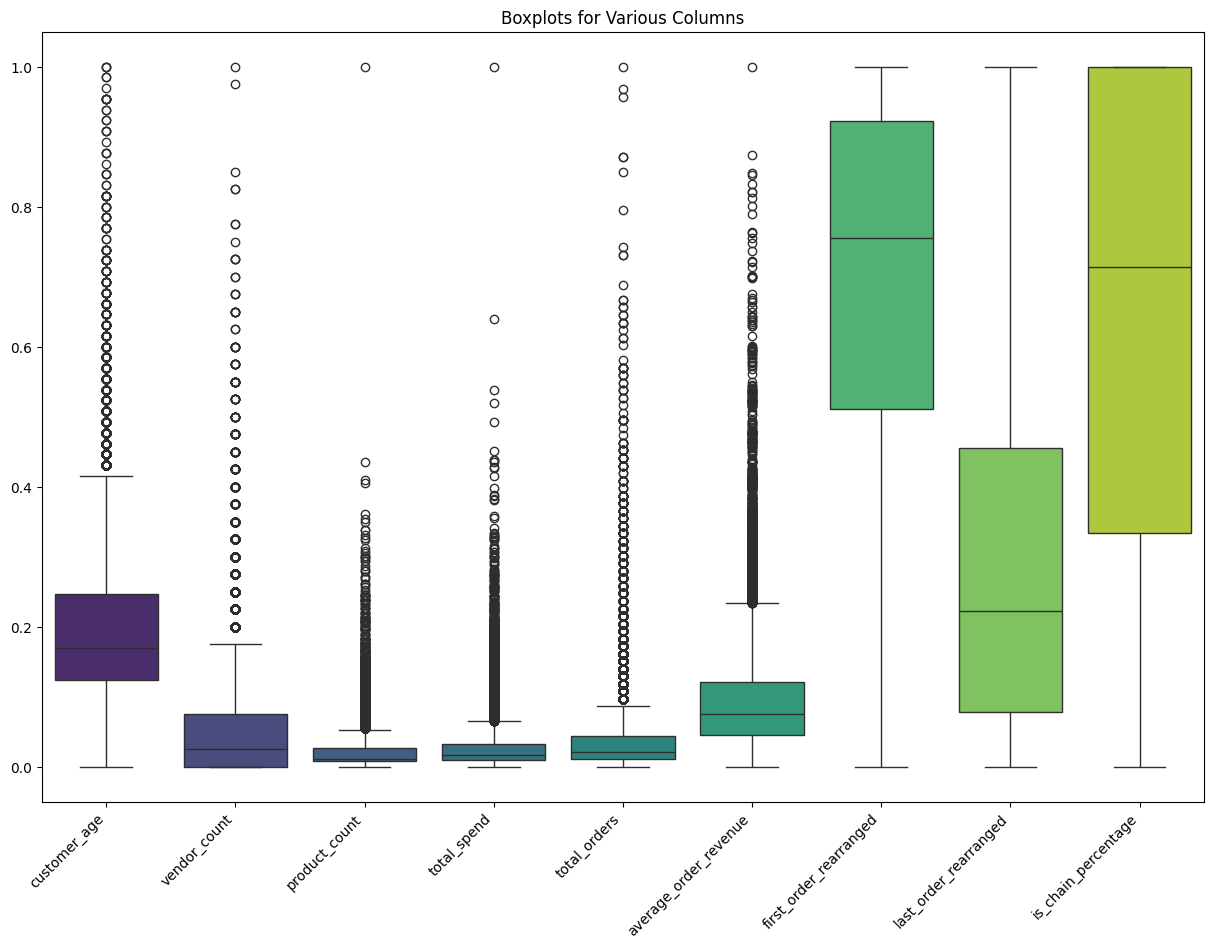

customer_age  vendor_count  product_count  total_spend  total_orders  \
0            18             2              5        28.88             2   
1            17             2              2        19.21             2   
2            38             1              2         9.20             2   
3            27             2              3        31.56             2   
4            20             2              5        55.44             2   

   average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                 14.440                    90.0                     89   
1                  9.605                    90.0                     89   
2                  4.600                    90.0                     89   
3                 15.780                    90.0                     88   
4                 27.720                    90.0                     88   

   is_chain_percentage  
0                  0.5  
1                  1.0  
2                  1.0  
3                  0.5  
4                  0.0

In [48]:
df_outliers = df[numerical_cols]
scaler = MinMaxScaler()
plt.figure(figsize=(15, 10))
sns.boxplot(data=pd.DataFrame(scaler.fit_transform(df_outliers), columns=df_outliers.columns), orient='v', palette='viridis')
plt.title('Boxplots for Various Columns')
plt.xticks(rotation=45, ha='right')  # We are rotating the x-axis labels for better readability
plt.show()
df_outliers.head()

## IQR And Z-Score Without Transformations

In [49]:
for col in df_outliers.columns:
    print(f"Column: {col}")
    
    # IQR method
    Q1 = df_outliers[col].quantile(0.25)
    Q3 = df_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = (df_outliers[col] < Q1 - 1.5 * IQR) | (df_outliers[col] > Q3 + 1.5 * IQR)
    
    # Z-score method
    col_z_scores = (df_outliers[col] - df_outliers[col].mean()) / df_outliers[col].std()
    outliers_zscore = (col_z_scores > 3) | (col_z_scores < -3)

    # Outlier information (IQR method)
    outliers_iqr_count = len(df_outliers[outliers_iqr])
    outliers_iqr_lower_bound = np.max(df_outliers[df_outliers[col] < Q1 - 1.5 * IQR][col]) if outliers_iqr_count > 0 else None
    outliers_iqr_upper_bound = np.min(df_outliers[df_outliers[col] > Q3 + 1.5 * IQR][col]) if outliers_iqr_count > 0 else None
    
    # Outlier information (Z-score method)
    outliers_zscore_count = len(df_outliers[outliers_zscore])
    outliers_zscore_lower_bound = np.min(df_outliers[outliers_zscore][col]) if outliers_zscore_count > 0 else None
    outliers_zscore_upper_bound = np.max(df_outliers[outliers_zscore][col]) if outliers_zscore_count > 0 else None
    
    # Print results
    print(f"Outliers (IQR) - count: {outliers_iqr_count}, lower bound: {outliers_iqr_lower_bound}, upper bound: {outliers_iqr_upper_bound}")
    print(f"Outliers (Z-score) - count: {outliers_zscore_count}, lower bound: {outliers_zscore_lower_bound}, upper bound: {outliers_zscore_upper_bound}")
    
    print("\n")

Column: customer_age
Outliers (IQR) - count: 1078, lower bound: nan, upper bound: 44
Outliers (Z-score) - count: 502, lower bound: 49, upper bound: 80


Column: vendor_count
Outliers (IQR) - count: 1524, lower bound: nan, upper bound: 9
Outliers (Z-score) - count: 623, lower bound: 12, upper bound: 41


Column: product_count
Outliers (IQR) - count: 2371, lower bound: nan, upper bound: 15
Outliers (Z-score) - count: 624, lower bound: 27, upper bound: 269


Column: total_spend
Outliers (IQR) - count: 2606, lower bound: nan, upper bound: 93.46
Outliers (Z-score) - count: 629, lower bound: 177.99, upper bound: 1418.33


Column: total_orders
Outliers (IQR) - count: 3029, lower bound: nan, upper bound: 10
Outliers (Z-score) - count: 647, lower bound: 20, upper bound: 94


Column: average_order_revenue
Outliers (IQR) - count: 1601, lower bound: nan, upper bound: 24.715
Outliers (Z-score) - count: 555, lower bound: 33.910000000000004, upper bound: 104.32


Column: first_order_rearranged
Outlie

## DBSCAN Without Skewness

In [50]:
np.random.seed(42)

df_dbscan = df_outliers.copy()

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_dbscan)

# Apply DBSCAN 
epsilon = 0.3  
min_samples = 5 
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df_dbscan['Cluster'] = dbscan.fit_predict(df_scaled)

# Identify outliers (Cluster == -1)
outliers = df_dbscan[df_dbscan['Cluster'] == -1]

# Set the cluster as the index
df_dbscan.set_index('Cluster', inplace=True)

# Display the count of each cluster
cluster_counts = pd.Series(dbscan.labels_).value_counts()
print(cluster_counts)

 0    31733
-1       17
Name: count, dtype: int64


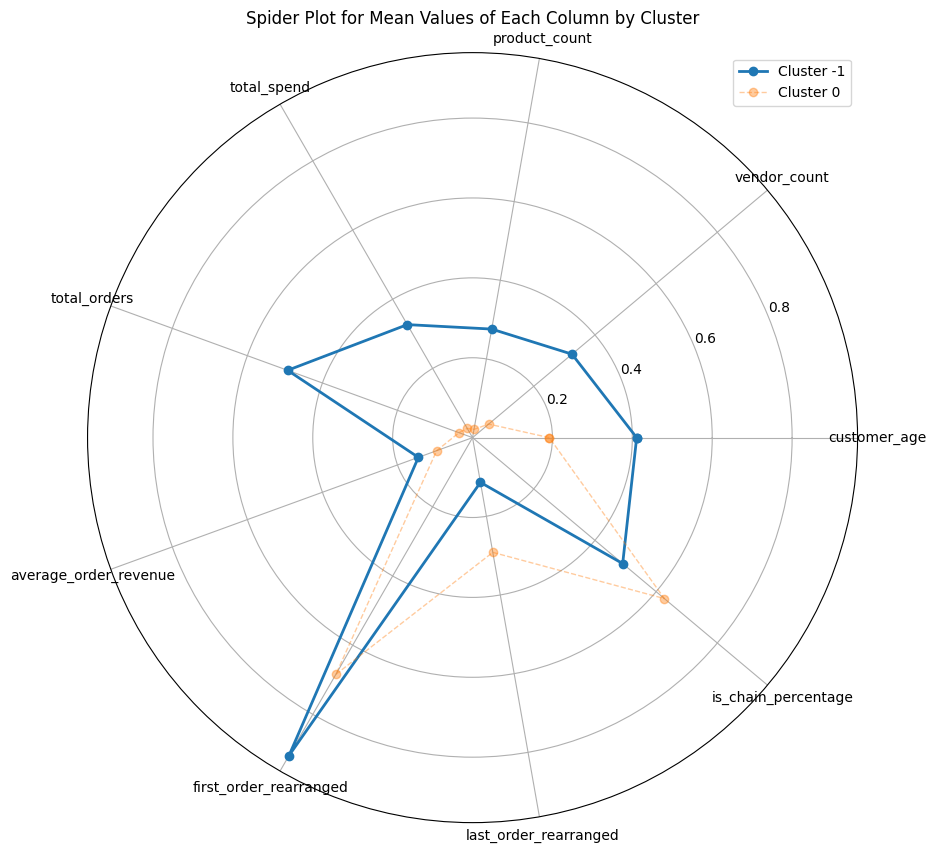

In [51]:
normalized_data = (df_dbscan - df_dbscan.min()) / (df_dbscan.max() - df_dbscan.min())

grouped_data = normalized_data.groupby(normalized_data.index).mean()

normalized_data = grouped_data

num_categories = len(grouped_data.columns)

angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles.append(angles[0])

plt.figure(figsize=(10, 10))
for i in range(len(normalized_data)):
    values = normalized_data.iloc[i].tolist()
    values.append(values[0])
    if normalized_data.index[i] == -1:
        plt.polar(angles, values, marker='o', linestyle='-', linewidth=2, label=f'Cluster {normalized_data.index[i]}')
    else:
        plt.polar(angles, values, marker='o', linestyle='--', linewidth=1, alpha=0.4, label=f'Cluster {normalized_data.index[i]}')

plt.xticks(angles[:-1], grouped_data.columns)
plt.legend(loc='upper right')
plt.title('Spider Plot for Mean Values of Each Column by Cluster')

plt.show()


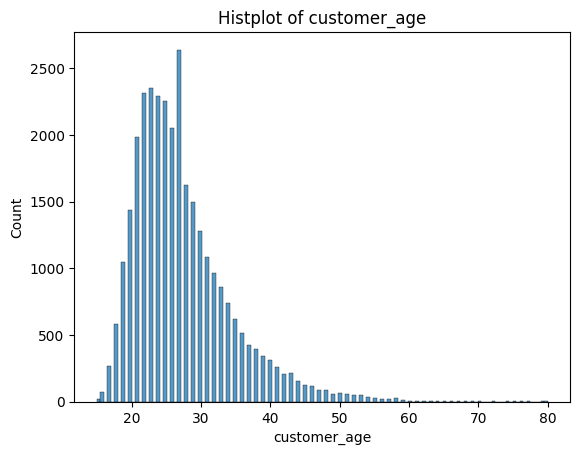

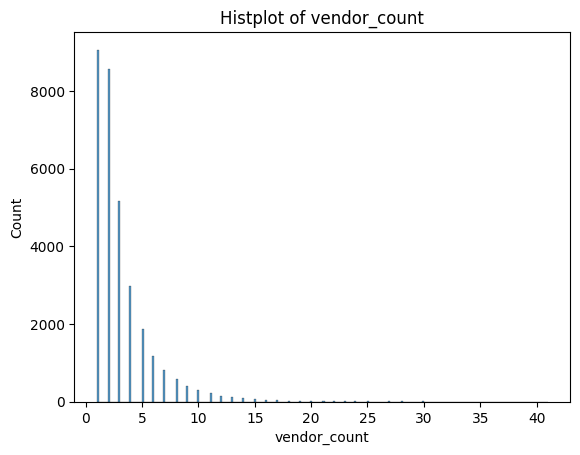

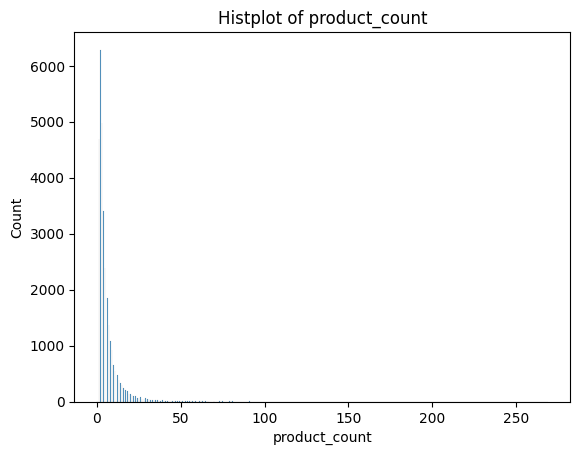

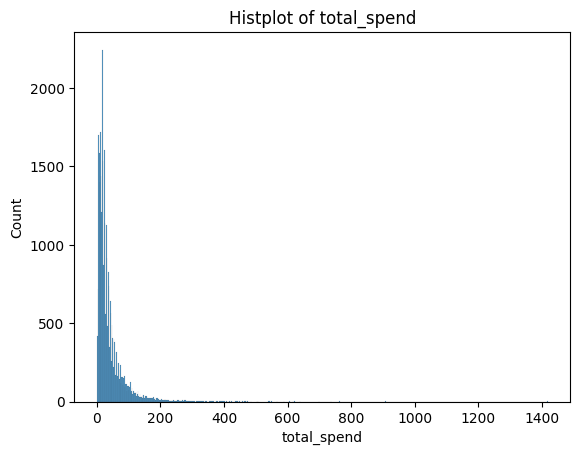

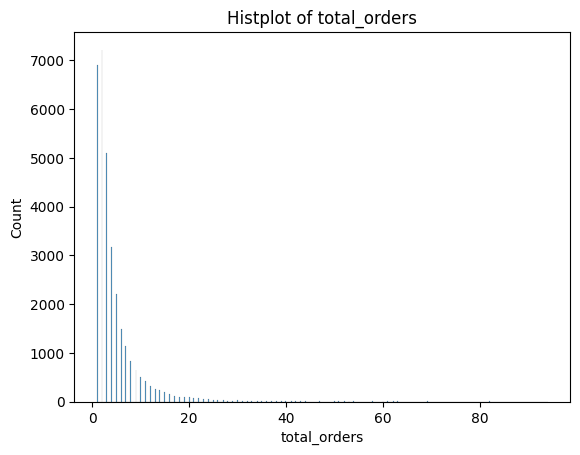

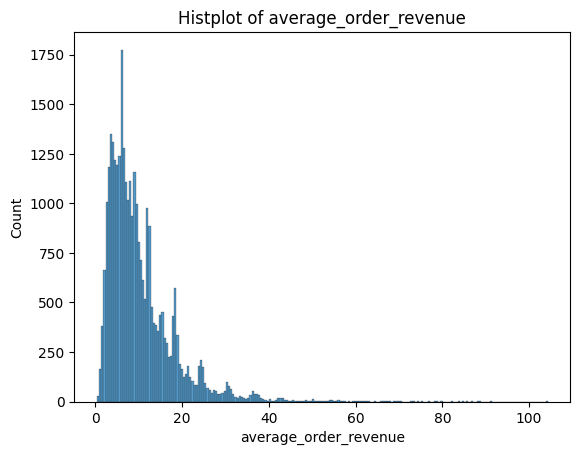

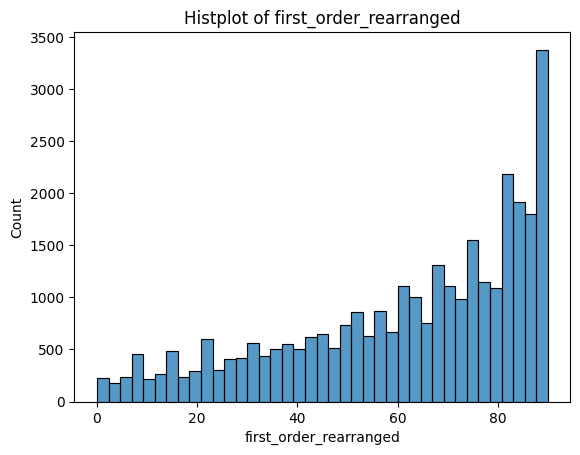

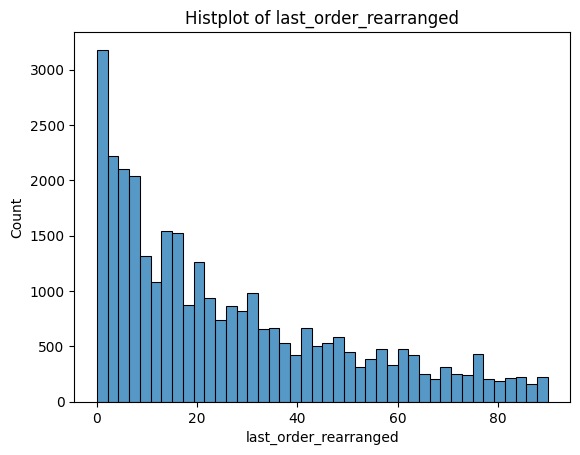

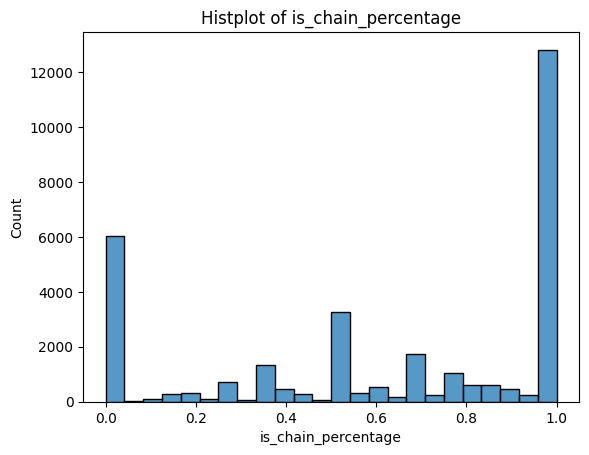

In [52]:
for i in (df_outliers.columns):
    sns.histplot(df_outliers, x = i)
    plt.title('Histplot of ' + str(i))
    plt.show()

In [53]:
df_outliers['outliers_hand'] = ((df_outliers['customer_age'] > 50) 
            | (df_outliers['vendor_count'] > 10)
            | (df_outliers['product_count'] < 30)
            | (df_outliers['total_spend'] > 200)
            | (df_outliers['total_orders'] > 20)
            | (df_outliers['average_order_revenue'] > 40))

In [54]:
for k in range(len(df_outliers.columns)-1):
    i = df_outliers.columns[k]

    # IQR method
    Q1 = df_outliers[i].quantile(0.25)
    Q3 = df_outliers[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr += (df_outliers[i] < Q1 - 1.5 * IQR) | (df_outliers[i] > Q3 + 1.5 * IQR)
    
    # Z-score method
    df_outliers['Zscore'] = (df_outliers[i] - df_outliers[i].mean()) / df_outliers[i].std()
    outliers_zscore += (df_outliers['Zscore'] > 2) | (df_outliers['Zscore'] < -2)
    df_outliers.drop(columns = ['Zscore'], inplace = True)
df_outliers['outliers_zscore'] = outliers_zscore
df_outliers['outliers_iqr'] = outliers_iqr
df_outliers['outliers_dbscan'] = list(pd.Series(df_dbscan.index).apply(lambda x: True if x == -1 else False))
clear_output()
df_outliers

customer_age  vendor_count  product_count  total_spend  total_orders  \
0                18             2              5        28.88             2   
1                17             2              2        19.21             2   
2                38             1              2         9.20             2   
3                27             2              3        31.56             2   
4                20             2              5        55.44             2   
...             ...           ...            ...          ...           ...   
31883            30             1              1        18.04             1   
31884            27             1              1        18.04             1   
31885            24             1              1        17.79             1   
31886            34             1              1        12.03             1   
31887            30             1              1         7.91             1   

       average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                     14.440                    90.0                     89   
1                      9.605                    90.0                     89   
2                      4.600                    90.0                     89   
3                     15.780                    90.0                     88   
4                     27.720                    90.0                     88   
...                      ...                     ...                    ...   
31883                 18.040                    68.0                     90   
31884                 18.040                    68.0                     90   
31885                 17.790                    68.0                     90   
31886                 12.030                    68.0                     90   
31887                  7.910                    68.0                     90   

       is_chain_percentage  outliers_hand  outliers_zscore  outliers_iqr  \
0                      0.5           True             True         False   
1                      1.0           True             True         False   
2                      1.0           True             True         False   
3                      0.5           True             True         False   
4                      0.0           True             True          True   
...                    ...            ...              ...           ...   
31883                  1.0           True             True         False   
31884                  0.0           True             True         False   
31885                  1.0           True             True         False   
31886                  0.0           True             True         False   
31887                  0.0           True             True         False   

       outliers_dbscan  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
31883            False  
31884            False  
31885            False  
31886            False  
31887            False  

[31750 rows x 13 columns]

In [55]:
columns = ['outliers_iqr', 'outliers_zscore', 'outliers_hand', 'outliers_dbscan']

for col in columns:
    print(f"\n{col}:")
    value_counts = df_outliers[col].value_counts()
    print(value_counts.head())
    total_values = df_outliers[col].shape[0]
    percentage_outliers = (value_counts / total_values) * 100
    print(f"Percentage of outliers in {col}:")
    print(percentage_outliers)


outliers_iqr:
outliers_iqr
False    25428
True      6322
Name: count, dtype: int64
Percentage of outliers in outliers_iqr:
outliers_iqr
False    80.088189
True     19.911811
Name: count, dtype: float64

outliers_zscore:
outliers_zscore
False    23778
True      7972
Name: count, dtype: int64
Percentage of outliers in outliers_zscore:
outliers_zscore
False    74.891339
True     25.108661
Name: count, dtype: float64

outliers_hand:
outliers_hand
True     31739
False       11
Name: count, dtype: int64
Percentage of outliers in outliers_hand:
outliers_hand
True     99.965354
False     0.034646
Name: count, dtype: float64

outliers_dbscan:
outliers_dbscan
False    31733
True        17
Name: count, dtype: int64
Percentage of outliers in outliers_dbscan:
outliers_dbscan
False    99.946457
True      0.053543
Name: count, dtype: float64


In [56]:
df_outliers.drop(columns=['outliers_iqr', 'outliers_zscore', 'outliers_hand', 'outliers_dbscan'], inplace=True)

initial_rows = len(df_outliers)

dbscan = DBSCAN(eps=0.3, min_samples=5) 


for col in df_outliers.columns:
    print(f"\nProcessing column: {col}")
    
    col_data = df_outliers[col].values.reshape(-1, 1)
    dbscan.fit(col_data)
    outliers_dbscan = dbscan.labels_ == -1
    outliers_dbscan_count = np.sum(outliers_dbscan)
    print(f"Found {outliers_dbscan_count} outliers in {col} based on DBSCAN")

    
    outliers_percentage = (outliers_dbscan_count / initial_rows) * 100
    print(f"Percentage of outliers removed from {col}: {outliers_percentage:.2f}%")
    
    df_outliers = df_outliers[~outliers_dbscan]

print(f"\nShape of the dataset after removing outliers based on DBSCAN: {df_outliers.shape}")



Processing column: customer_age
Found 0 outliers in customer_age based on DBSCAN
Percentage of outliers removed from customer_age: 0.00%

Processing column: vendor_count
Found 2 outliers in vendor_count based on DBSCAN
Percentage of outliers removed from vendor_count: 0.01%

Processing column: product_count
Found 2 outliers in product_count based on DBSCAN
Percentage of outliers removed from product_count: 0.01%

Processing column: total_spend
Found 50 outliers in total_spend based on DBSCAN
Percentage of outliers removed from total_spend: 0.16%

Processing column: total_orders
Found 5 outliers in total_orders based on DBSCAN
Percentage of outliers removed from total_orders: 0.02%

Processing column: average_order_revenue
Found 1 outliers in average_order_revenue based on DBSCAN
Percentage of outliers removed from average_order_revenue: 0.00%

Processing column: first_order_rearranged
Found 0 outliers in first_order_rearranged based on DBSCAN
Percentage of outliers removed from first_

In [57]:
df_outliers.head()

customer_age  vendor_count  product_count  total_spend  total_orders  \
0            18             2              5        28.88             2   
1            17             2              2        19.21             2   
2            38             1              2         9.20             2   
3            27             2              3        31.56             2   
4            20             2              5        55.44             2   

   average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                 14.440                    90.0                     89   
1                  9.605                    90.0                     89   
2                  4.600                    90.0                     89   
3                 15.780                    90.0                     88   
4                 27.720                    90.0                     88   

   is_chain_percentage  
0                  0.5  
1                  1.0  
2                  1.0  
3                  0.5  
4                  0.0

Skewness after remove outliers

Analyzing Column: customer_age
Best Transformation: Log

Skewness: 0.7002713304407124


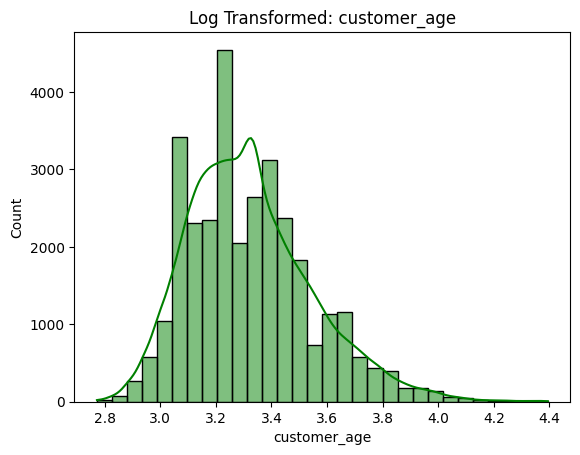

Analyzing Column: vendor_count
Best Transformation: Log

Skewness: 0.8242286921673979


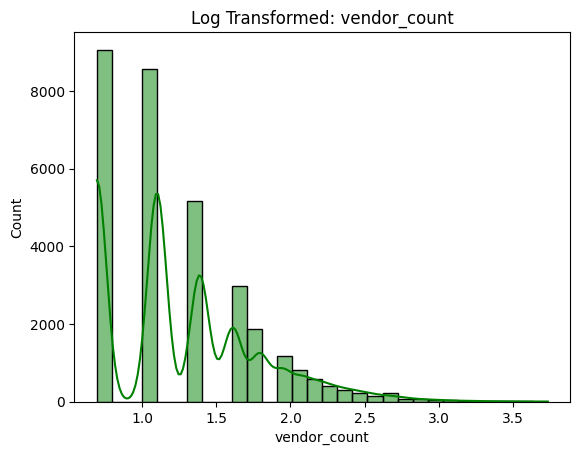

Analyzing Column: product_count
Best Transformation: Log

Skewness: 0.7612555634737908


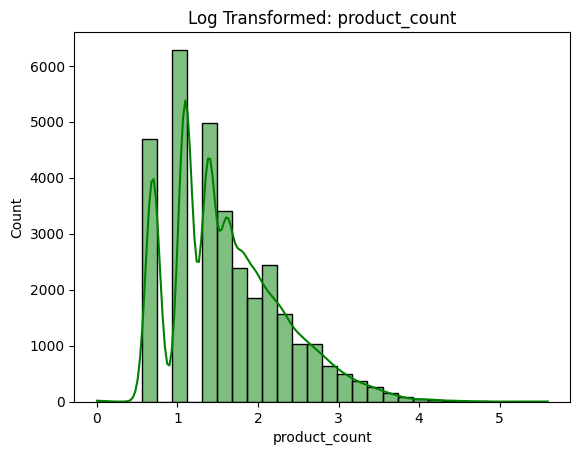

Analyzing Column: total_spend
Best Transformation: Log

Skewness: 0.10347494020305405


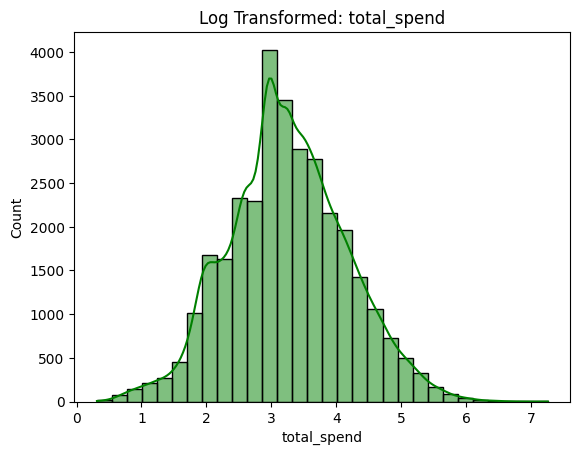

Analyzing Column: total_orders
Best Transformation: Log

Skewness: 0.880293429940788


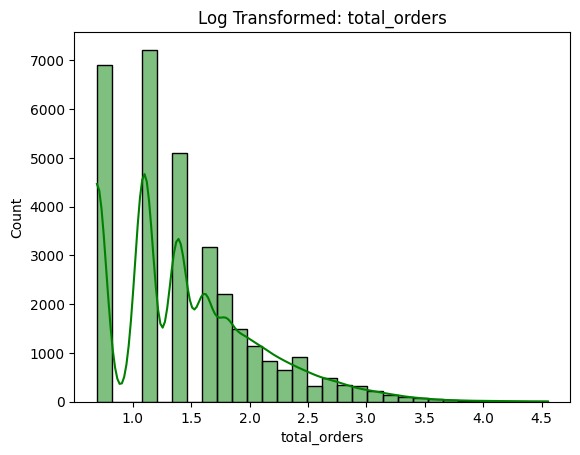

Analyzing Column: average_order_revenue
Best Transformation: Log

Skewness: 0.1594779948312446


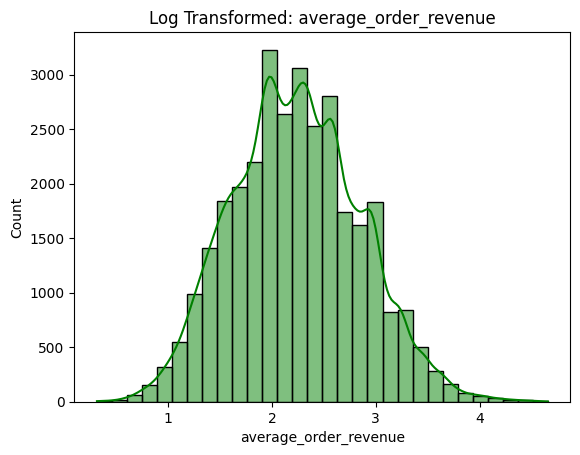

Analyzing Column: last_order_rearranged
Best Transformation: Square Root

Skewness: 0.2715550783791161


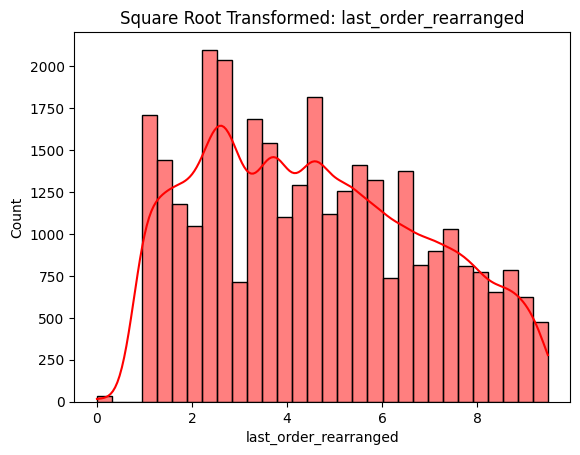

In [58]:
new_df = df_outliers.copy()
for column in numerical_cols:
    if sts.skew(df[column]) > 0.5:  # Apply only if skewness is significant
        new_df[column] = apply_transformation(column)

# 4.Clustering

In [59]:
def preprocess_data(data):
    data = data.copy()
    numeric_cols = data.select_dtypes(include=[np.number])
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(numeric_cols)
    return scaled_data, numeric_cols.columns

scaled_data_skewed, feature_names_skewed = preprocess_data(df_skewness_plus_zcore)
scaled_data_no_skewed, feature_names_outliers = preprocess_data(df_outliers)
scaled_data, feature_names = preprocess_data(new_df)

## 4.1 Hierarchical Dendogram

- To find the best hierarchical clustering method and number of clusters, we will evaluate the performace using silhouette scores, alinski_harabasz_score, davies_bouldin_score.

Best method: ward, Best k: 3, Silhouette Score: 0.243


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
findfont: score(FontEntry(fname='c:\\Users\\ARDA\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='c:\\Users\\ARDA\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\ARDA\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\Users\\ARDA\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STI

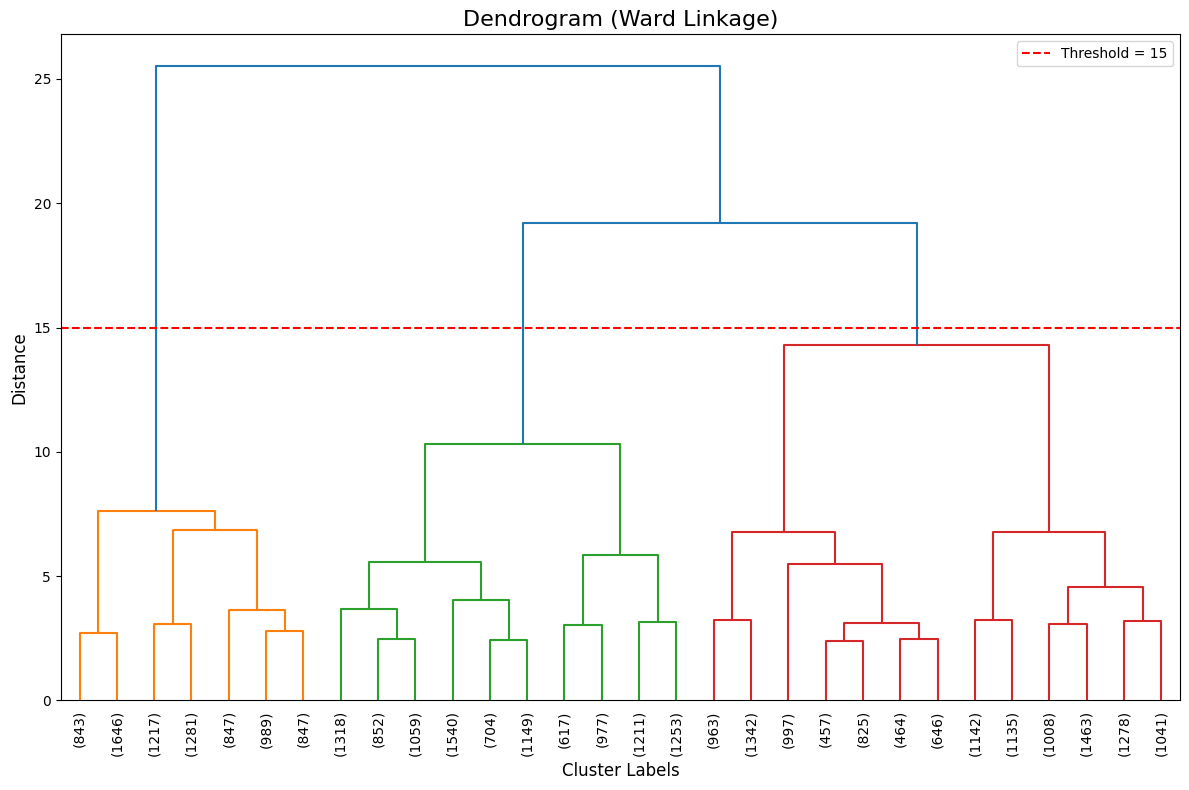

In [60]:
#Gower distance function
def gower_distance(X):
    """
    Computes the Gower distance for a dataset.
    Gower distance is normalized Manhattan distance.
    """
    return pairwise_distances(X, metric='manhattan') / X.shape[1]

# Compute Gower distance matrix
gower_dist = gower_distance(scaled_data_skewed)

condensed_gower_dist = squareform(gower_dist, checks=False)

# Evaluate clustering with different linkage methods
linkages = ['ward', 'complete', 'average']
silhouette_scores = {}

# Compute silhouette scores
for method in linkages:
    Z = linkage(condensed_gower_dist, method=method)
    for k in range(2, 11):
        clusters = fcluster(Z, k, criterion='maxclust')
        sil_score = silhouette_score(scaled_data_skewed, clusters)
        silhouette_scores[(method, k)] = sil_score

# Print the best silhouette score
best_method, best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best method: {best_method}, Best k: {best_k}, Silhouette Score: {silhouette_scores[(best_method, best_k)]:.3f}")


plt.figure(figsize=(12, 8))
Z = linkage(condensed_gower_dist, method=best_method)
dendrogram(
    Z,
    truncate_mode='lastp',   
    p=30,                    
    show_leaf_counts=True,   
    leaf_rotation=90,        
    leaf_font_size=10,       
    color_threshold=15       
)

# Add titles and labels
plt.title(f'Dendrogram ({best_method.capitalize()} Linkage)', fontsize=16)
plt.xlabel('Cluster Labels', fontsize=12)
plt.ylabel('Distance', fontsize=12)

y_threshold = 15 
plt.axhline(y=y_threshold, color='r', linestyle='--', label=f'Threshold = {y_threshold}')
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

Method: ward, k: 2, Silhouette: 0.204, CH: 8425.933, DB: 1.502
Method: ward, k: 3, Silhouette: 0.243, CH: 11002.783, DB: 1.399
Method: ward, k: 4, Silhouette: 0.198, CH: 9939.316, DB: 1.641
Method: ward, k: 5, Silhouette: 0.173, CH: 8500.149, DB: 1.779
Method: ward, k: 6, Silhouette: 0.144, CH: 7555.819, DB: 1.780
Method: ward, k: 7, Silhouette: 0.139, CH: 6823.883, DB: 1.766
Method: complete, k: 2, Silhouette: 0.174, CH: 7635.601, DB: 1.951
Method: complete, k: 3, Silhouette: 0.106, CH: 5538.463, DB: 1.915
Method: complete, k: 4, Silhouette: 0.169, CH: 8113.885, DB: 1.644
Method: complete, k: 5, Silhouette: 0.136, CH: 6719.609, DB: 1.588
Method: complete, k: 6, Silhouette: 0.114, CH: 6186.589, DB: 1.841
Method: complete, k: 7, Silhouette: 0.111, CH: 5949.701, DB: 1.847
Method: average, k: 2, Silhouette: 0.206, CH: 7262.315, DB: 1.399
Method: average, k: 3, Silhouette: 0.120, CH: 3633.609, DB: 1.198
Method: average, k: 4, Silhouette: 0.173, CH: 6282.314, DB: 1.184
Method: average, k: 5

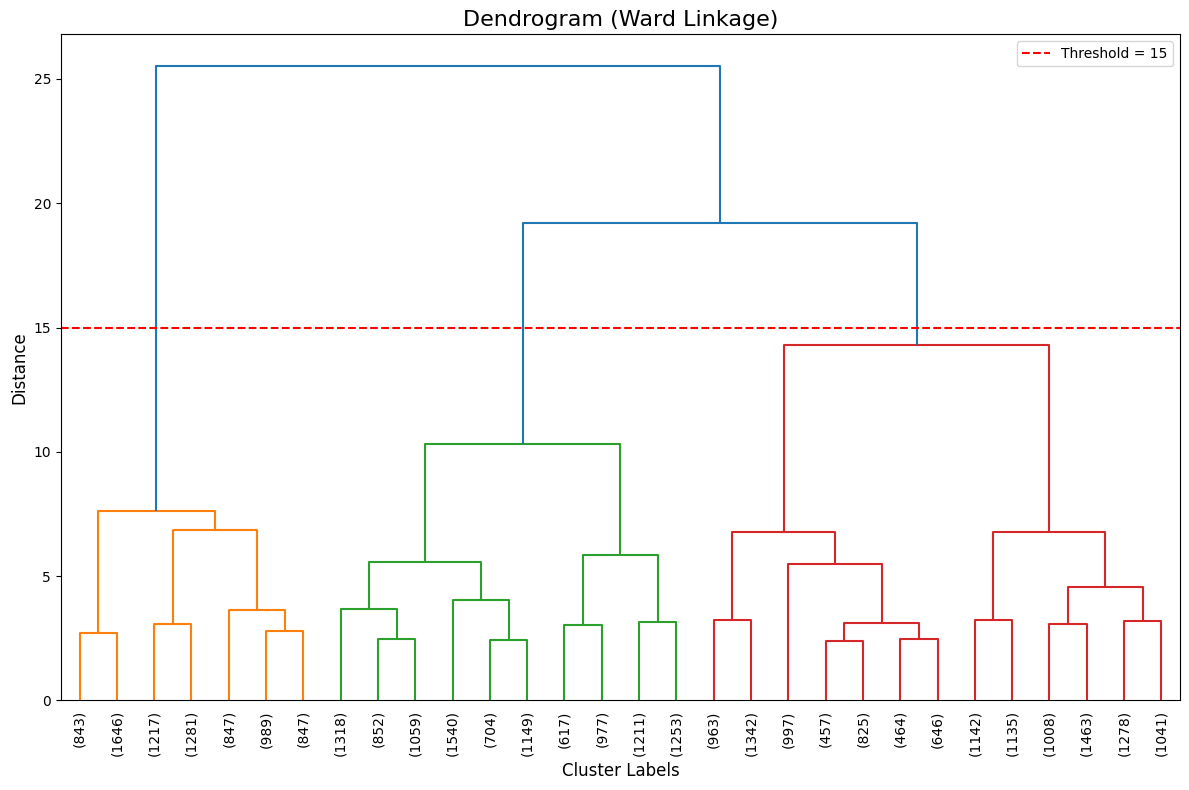

In [62]:

# To find the best hierarchical clustering method and number of clusters, we will evaluate the silhouette scores, alinski_harabasz_score, davies_bouldin_score  for different methods and cluster counts.
gower_dist = gower_distance(scaled_data_skewed)
condensed_gower_dist = squareform(gower_dist, checks=False)

# Evaluate clustering
linkages = ['ward', 'complete', 'average']
silhouette_scores = {}
ch_scores = {}
db_scores = {}

for method in linkages:
    Z = linkage(condensed_gower_dist, method=method)
    for k in range(2, 8):
        clusters = fcluster(Z, k, criterion='maxclust')
        sil_score = silhouette_score(scaled_data_skewed, clusters)
        ch_score = calinski_harabasz_score(scaled_data_skewed, clusters)
        db_score = davies_bouldin_score(scaled_data_skewed, clusters)

        silhouette_scores[(method, k)] = sil_score
        ch_scores[(method, k)] = ch_score
        db_scores[(method, k)] = db_score

        print(f"Method: {method}, k: {k}, Silhouette: {sil_score:.3f}, CH: {ch_score:.3f}, DB: {db_score:.3f}")

# Find the best method and k
best_method, best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest Method: {best_method}, Best k: {best_k}, Best Silhouette Score: {silhouette_scores[(best_method, best_k)]:.3f}")

# Plot the dendrogram
plt.figure(figsize=(12, 8))
Z = linkage(condensed_gower_dist, method=best_method)
dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=15
)
plt.title(f'Dendrogram ({best_method.capitalize()} Linkage)', fontsize=16)
plt.xlabel('Cluster Labels', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=15, color='r', linestyle='--', label=f'Threshold = 15')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


| Method   | k  | Silhouette | CH        | DB     |
|----------|----|------------|-----------|--------|
| ward     | 2  | 0.204      | 8425.933  | 1.502  |
| ward     | 3  | 0.243      | 11002.783 | 1.399  |
| ward     | 4  | 0.198      | 9939.316  | 1.641  |
| ward     | 5  | 0.173      | 8500.149  | 1.779  |
| ward     | 6  | 0.144      | 7555.819  | 1.780  |



| Method     | k  | Silhouette | CH        | DB     |
|------------|----|------------|-----------|--------|
| complete   | 2  | 0.174      | 7635.601  | 1.951  |
| complete   | 3  | 0.106      | 5538.463  | 1.915  |
| complete   | 4  | 0.169      | 8113.885  | 1.644  |
| complete   | 5  | 0.136      | 6719.609  | 1.588  |
| complete   | 6  | 0.114      | 6186.589  | 1.841  |



| Method   | k  | Silhouette | CH        | DB     |
|----------|----|------------|-----------|--------|
| average  | 2  | 0.206      | 7262.315  | 1.399  |
| average  | 3  | 0.120      | 3633.609  | 1.198  |
| average  | 4  | 0.173      | 6282.314  | 1.184  |
| average  | 5  | 0.144      | 4718.892  | 1.202  |
| average  | 6  | 0.125      | 3776.069  | 1.177  |

In [63]:
Z = linkage(condensed_gower_dist, method='ward')
k = 3 # Our cluster count
cluster_labels = fcluster(Z, t=k, criterion='maxclust')

# Adding cluster labels to the dataframe
df_skewness_plus_zcore['cluster_dendogram'] = cluster_labels

In [64]:
df_skewness_plus_zcore

customer_age  vendor_count  product_count  total_spend  total_orders  \
0          2.944439      1.098612       1.791759     3.397189      1.098612   
1          2.890372      1.098612       1.098612     3.006178      1.098612   
2          3.663562      0.693147       1.098612     2.322388      1.098612   
3          3.332205      1.098612       1.386294     3.483085      1.098612   
4          3.044522      1.098612       1.791759     4.033178      1.098612   
...             ...           ...            ...          ...           ...   
31883      3.433987      0.693147       0.693147     2.946542      0.693147   
31884      3.332205      0.693147       0.693147     2.946542      0.693147   
31885      3.218876      0.693147       0.693147     2.933325      0.693147   
31886      3.555348      0.693147       0.693147     2.567254      0.693147   
31887      3.433987      0.693147       0.693147     2.187174      0.693147   

       average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                   2.736962                    90.0               9.433981   
1                   2.361326                    90.0               9.433981   
2                   1.722767                    90.0               9.433981   
3                   2.820188                    90.0               9.380832   
4                   3.357594                    90.0               9.380832   
...                      ...                     ...                    ...   
31883               2.946542                    68.0               9.486833   
31884               2.946542                    68.0               9.486833   
31885               2.933325                    68.0               9.486833   
31886               2.567254                    68.0               9.486833   
31887               2.187174                    68.0               9.486833   

       is_chain_percentage  cluster_dendogram  
0                      0.5                  3  
1                      1.0                  2  
2                      1.0                  2  
3                      0.5                  3  
4                      0.0                  3  
...                    ...                ...  
31883                  1.0                  2  
31884                  0.0                  3  
31885                  1.0                  2  
31886                  0.0                  3  
31887                  0.0                  3  

[31111 rows x 10 columns]

## 4.2 K-Mean

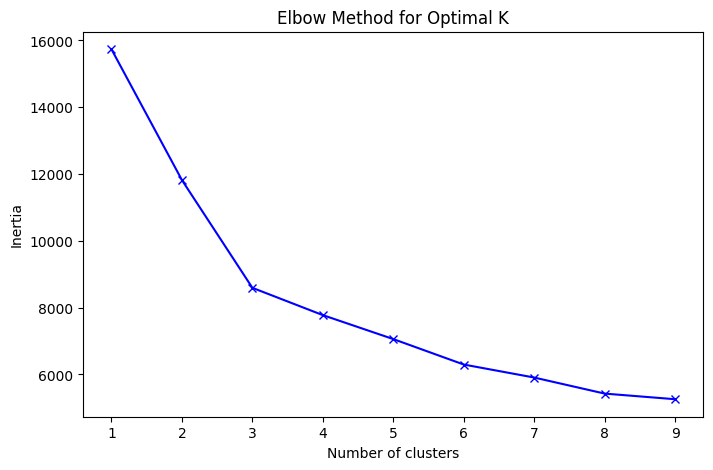

In [66]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data_skewed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

## 4.2.1 Silhouette Score Comparision

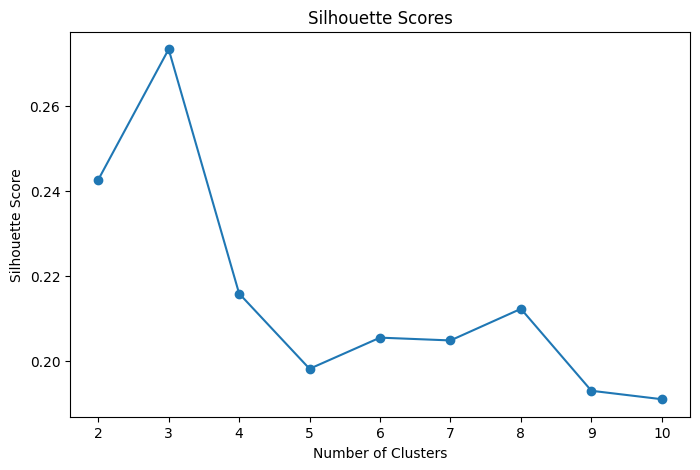

In [67]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data_skewed)
    sil_scores.append(silhouette_score(scaled_data_skewed, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [69]:
sil_scores

[0.2426245107421369,
 0.2733921145185419,
 0.21584306792699234,
 0.1981131735613632,
 0.20545496129608182,
 0.2047960878821926,
 0.21224204914975806,
 0.19294089911307158,
 0.19094901904628656]

## 4.2.2 Davies Bouldin Score Comparision 

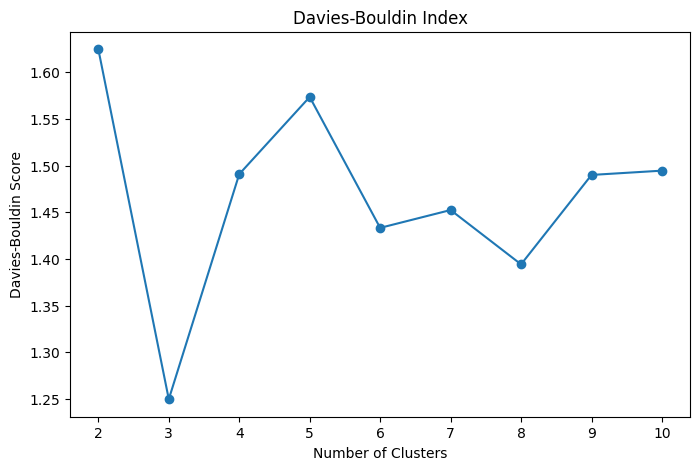

In [70]:
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data_skewed)
    db_scores.append(davies_bouldin_score(scaled_data_skewed, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()


## 4.2.3 Gap Statistic

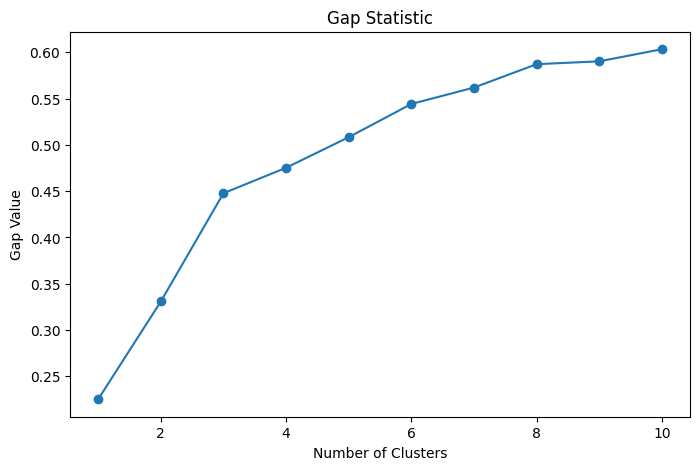

In [74]:
def gap_statistic(X, k_max=10, n_refs=10):
    gaps = []
    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        orig_disp = np.mean(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))
        ref_disps = []
        for _ in range(n_refs):
            ref_data = np.random.uniform(X.min(axis=0), X.max(axis=0), X.shape)
            kmeans_ref = KMeans(n_clusters=k, random_state=42).fit(ref_data)
            ref_disp = np.mean(np.min(cdist(ref_data, kmeans_ref.cluster_centers_, 'euclidean'), axis=1))
            ref_disps.append(ref_disp)

        gap = np.log(np.mean(ref_disps)) - np.log(orig_disp)
        gaps.append(gap)
    return gaps

gaps = gap_statistic(scaled_data_skewed)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), gaps, marker='o')
plt.title('Gap Statistic')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Value')
plt.show()

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=5.0.
findfont: score(FontEntry(fname='c:\\Users\\ARDA\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='c:\\Users\\ARDA\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\ARDA\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\Users\\ARDA\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIX

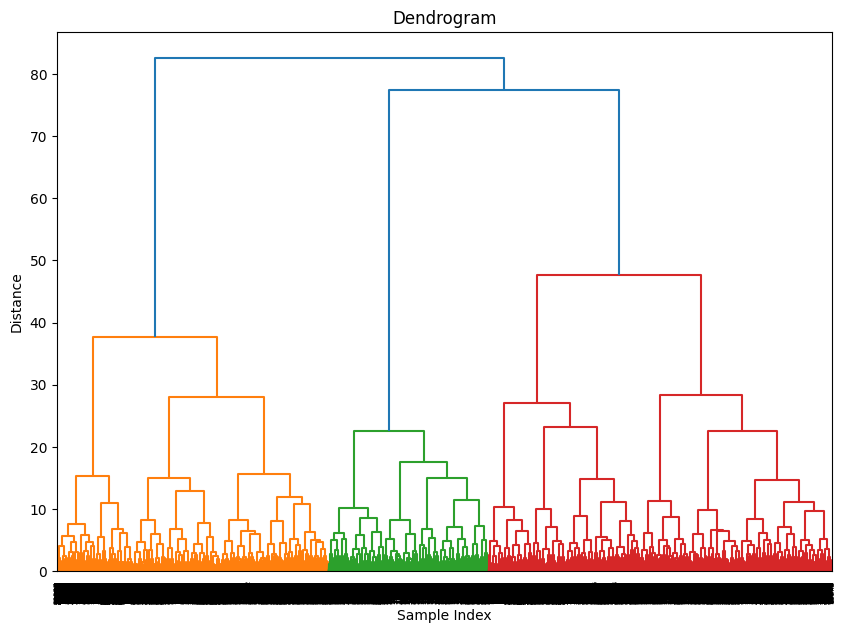

In [75]:
Z = linkage(scaled_data_skewed, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [68]:
# Optimal K-Means
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data_skewed)
kmeans_labels = kmeans.labels_
df_skewness_plus_zcore['cluster_kmeans'] = kmeans.fit_predict(df_skewness_plus_zcore)

## 4.4 BIRCH

In [77]:
birch = Birch(n_clusters=3)
df_skewness_plus_zcore['cluster_birch'] = birch.fit_predict(df_skewness_plus_zcore)

## 4.5 SOM

In [78]:
np.random.seed(42)

sm = sompy.SOMFactory().build(
    data=scaled_data_skewed,  
    mapsize=[7, 7],  
    initialization='random',  
    neighborhood='gaussian', 
    training='batch',  
    lattice='hexa',  
    component_names=feature_names  
)

# Train the SOM
sm.train(
    n_job=4,  
    verbose='info',  
    train_rough_len=200,  
    train_finetune_len=200  
)


winning_nodes = sm.find_bmu(scaled_data_skewed)  


bmu_to_cluster = {}
cluster_id = 0  

cluster_labels = []

for result in winning_nodes[0]: 
    if result not in bmu_to_cluster:  

        bmu_to_cluster[result] = cluster_id % 4 
        cluster_id += 1
    cluster_labels.append(bmu_to_cluster[result])

df_skewness_plus_zcore['cluster_som'] = cluster_labels

 Training...
 random_initialization took: 0.004000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 200

 epoch: 1 ---> elapsed time:  0.274000, quantization error: 3.152172

 epoch: 2 ---> elapsed time:  0.060000, quantization error: 2.794405

 epoch: 3 ---> elapsed time:  0.053000, quantization error: 2.673061

 epoch: 4 ---> elapsed time:  0.064000, quantization error: 2.640867

 epoch: 5 ---> elapsed time:  0.051000, quantization error: 2.625082

 epoch: 6 ---> elapsed time:  0.065000, quantization error: 2.614587

 epoch: 7 ---> elapsed time:  0.058000, quantization error: 2.605653

 epoch: 8 ---> elapsed time:  0.056000, quantization error: 2.599611

 epoch: 9 ---> elapsed time:  0.051000, quantization error: 2.592717

 epoch: 10 ---> elapsed time:  0.065000, quantization error: 2.581279

 epoch: 11 ---> elapsed time:  0.057000, quantization error: 2.577418

 epoch: 12 ---> elapsed time:  0.063000, quantization error: 2.575681

 epoch: 13 ---> 

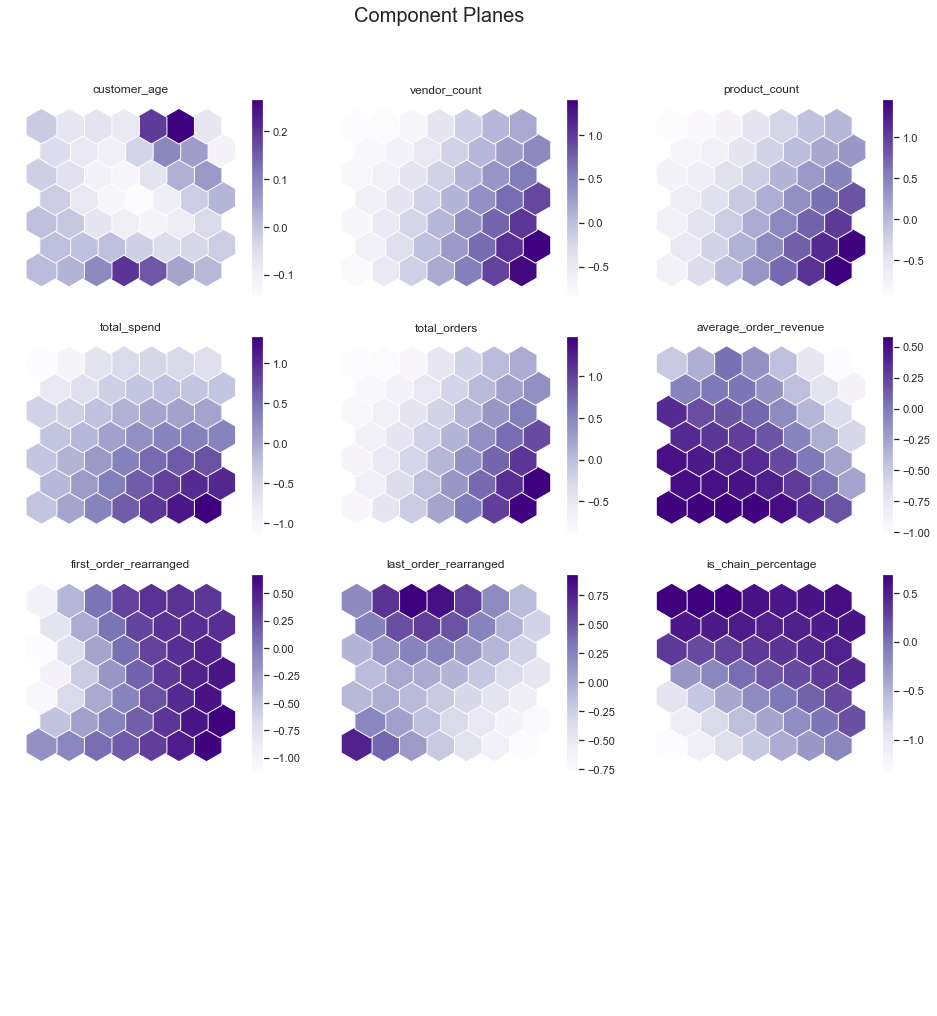

In [79]:
plt.rcParams['figure.dpi'] = 72
sns.set()
view2D = View2D(12, 12, "", text_size=10)
view2D.show(sm, col_sz=3, cmap = 'Purples', what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

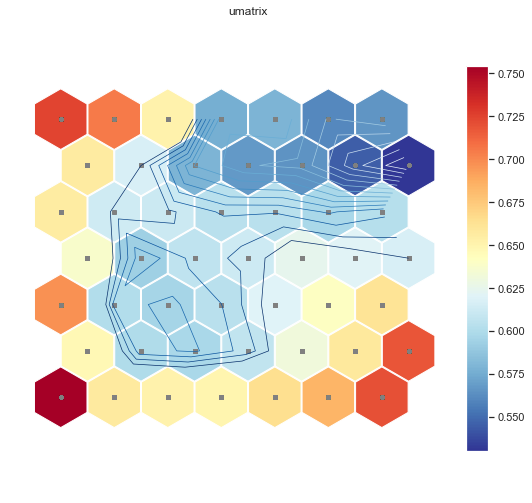

array([[0.72438948, 0.70459441, 0.65192025, 0.57575964, 0.57911756,
        0.5599653 , 0.5658776 ],
       [0.65646279, 0.61610728, 0.57896628, 0.56753879, 0.56473151,
        0.54442394, 0.53006764],
       [0.65554694, 0.61301057, 0.61124679, 0.60292216, 0.60317089,
        0.59677371, 0.60227538],
       [0.63723578, 0.59293728, 0.60605341, 0.61236836, 0.62408048,
        0.62111908, 0.61609114],
       [0.6973525 , 0.60086022, 0.5958214 , 0.60369947, 0.6202181 ,
        0.64059449, 0.6620849 ],
       [0.64707797, 0.5995067 , 0.59673577, 0.6065288 , 0.6314364 ,
        0.65827518, 0.71826944],
       [0.75457888, 0.65808798, 0.6517899 , 0.65017797, 0.66447997,
        0.68412454, 0.71979079]])

In [80]:
u = sompy.umatrix.UMatrixView(8, 8, 'umatrix', show_axis=True, text_size=10, show_text=True)

UMAT = u.show(
    sm, 
    distance=2,
    row_normalized=False,
    show_data=True, 
    contour=True,
    blob=True
)

np.flip(UMAT[1], axis=1) 

In [81]:
topographic_error = sm.calculate_topographic_error()
print(f'Topographic Error: {topographic_error}')

Topographic Error: 0.06438237279418856


After interpreting the Umatrix and the topographic error, and when we examine the cluster means, 4 clusters is the best cluster count for our analysis. 

## 4.6 DBSCAN

In [82]:

np.random.seed(42)
epsilon = 0.25
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df_skewness_plus_zcore['cluster_dbscan'] = dbscan.fit_predict(scaled_data_skewed)

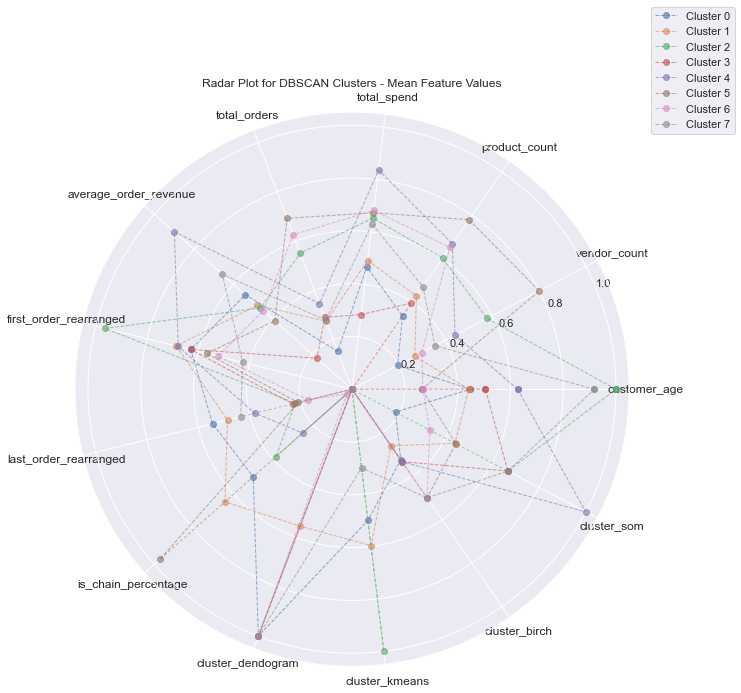

In [83]:
normalized_data = (df_skewness_plus_zcore - df_skewness_plus_zcore.min()) / (df_skewness_plus_zcore.max() - df_skewness_plus_zcore.min())
normalized_data['cluster_dbscan'] = df_skewness_plus_zcore['cluster_dbscan']
normalized_data_valid = normalized_data[normalized_data['cluster_dbscan'] != -1]

grouped_data = normalized_data_valid.groupby('cluster_dbscan').mean()

num_categories = len(grouped_data.columns)

angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

angles.append(angles[0])

plt.figure(figsize=(10, 10))
for cluster_id in grouped_data.index:
    values = grouped_data.loc[cluster_id].tolist()
    values.append(values[0])  
    
    if cluster_id == -1:
        plt.polar(angles, values, marker='o', linestyle='-', linewidth=2, label=f'Outliers (Cluster {cluster_id})', alpha=0.7)
    else:
        plt.polar(angles, values, marker='o', linestyle='--', linewidth=1, alpha=0.6, label=f'Cluster {cluster_id}')

plt.xticks(angles[:-1], grouped_data.columns, fontsize=12)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.title('Radar Plot for DBSCAN Clusters - Mean Feature Values')
plt.show()

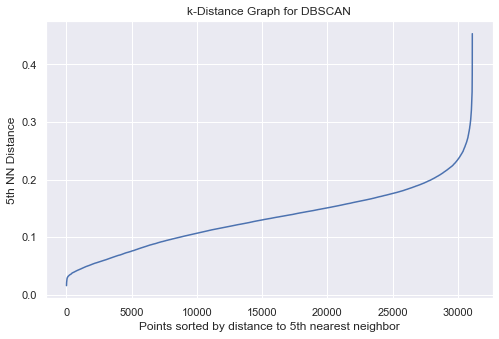

In [84]:
nearest_neighbors = NearestNeighbors(n_neighbors=5).fit(scaled_data_skewed)
distances, indices = nearest_neighbors.kneighbors(scaled_data_skewed)

distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-Distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance to 5th nearest neighbor')
plt.ylabel('5th NN Distance')
plt.show()

## 4.8 MeanShift

In [86]:
bandwidth = estimate_bandwidth(scaled_data_skewed, quantile=0.2, random_state = 1, n_jobs= -1)

print(f"Estimated bandwidth: {bandwidth}")

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs = 4)
ms_labels = ms.fit_predict(scaled_data_skewed)
df_skewness_plus_zcore['cluster_meanshift'] = ms_labels

Estimated bandwidth: 0.6947089457251774


In [94]:
from sklearn.cluster import MeanShift

# Apply MeanShift with different bandwidth values
for bw in [0.1, 0.05, 0.02]:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_labels = ms.fit_predict(scaled_data_skewed)
    n_clusters = len(np.unique(ms_labels))
    print(f"Bandwidth: {bw}, Number of Clusters: {n_clusters}")


Bandwidth: 0.1, Number of Clusters: 14630
Bandwidth: 0.05, Number of Clusters: 23931
Bandwidth: 0.02, Number of Clusters: 28640


In [97]:
df_skewness_plus_zcore.head()

customer_age  vendor_count  product_count  total_spend  total_orders  \
0      2.944439      1.098612       1.791759     3.397189      1.098612   
1      2.890372      1.098612       1.098612     3.006178      1.098612   
2      3.663562      0.693147       1.098612     2.322388      1.098612   
3      3.332205      1.098612       1.386294     3.483085      1.098612   
4      3.044522      1.098612       1.791759     4.033178      1.098612   

   average_order_revenue  first_order_rearranged  last_order_rearranged  \
0               2.736962                    90.0               9.433981   
1               2.361326                    90.0               9.433981   
2               1.722767                    90.0               9.433981   
3               2.820188                    90.0               9.380832   
4               3.357594                    90.0               9.380832   

   is_chain_percentage  cluster_dendogram  cluster_kmeans  cluster_birch  \
0                  0.5                  3               2              0   
1                  1.0                  2               2              0   
2                  1.0                  2               2              0   
3                  0.5                  3               2              0   
4                  0.0                  3               2              0   

   cluster_som  cluster_dbscan  cluster_meanshift  
0            0               0                  0  
1            0               1                  0  
2            1               1                  0  
3            0               0                  0  
4            2               1                  0

## 4.9 Compare All Clusters

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

def compare_clusters(df, label_columns, figsize=(25, 25), compare_titles=None, important_features=None, scale_data=True):
    """
    Improved cluster profiling function with better label handling, subplot spacing,
    optional feature highlighting, and data scaling.

    Args:
        df: The input DataFrame.
        label_columns: List of column names containing cluster labels.
        figsize: Figure size. Defaults to (25, 25).
        compare_titles: Titles for each clustering method. Defaults to None.
        important_features: List of feature names to highlight. Defaults to None.
        scale_data: Whether to scale the data before plotting. Defaults to True.
    """
    if compare_titles is None:
        compare_titles = label_columns

    num_rows = len(label_columns)
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=figsize, gridspec_kw={'width_ratios': [2, 1]})
    fig.suptitle("Cluster Simple Profiling", fontsize=20, y=0.99)

    palette = sns.color_palette("tab10", n_colors=10)

    for i, (label, title) in enumerate(zip(label_columns, compare_titles)):
        ax_row = axes[i] if num_rows > 1 else axes

        drop_cols = [col for col in label_columns if col != label]
        dfax = df.drop(drop_cols, axis=1)

        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label).size().reset_index(name='counts')

        if scale_data:
            scaler = StandardScaler()
            scaled_centroids = scaler.fit_transform(centroids.drop(columns=label))
            scaled_centroids_df = pd.DataFrame(scaled_centroids, columns=centroids.columns[1:])
            scaled_centroids_df[label] = centroids[label]
            plot_df = scaled_centroids_df
            y_label_text = "Scaled Mean Value"
        else:
            plot_df = centroids
            y_label_text = "Mean Value"

        ax_row[0].set_prop_cycle(color=palette)
        lines = pd.plotting.parallel_coordinates(
            plot_df, label, ax=ax_row[0], linewidth=1.5, alpha=0.7
        )

        if important_features:
            for feature in important_features:
                if feature in plot_df.columns: 
                    try:
                        line_index = plot_df.columns.get_loc(feature)
                        for line in lines.collections:
                            line.set_segments([(x, y) for x, y in line.get_segments() if not np.isnan(y).any()])
                        lines[line_index].set_linewidth(3)
                        lines[line_index].set_alpha(1.0)
                    except KeyError:
                        print(f"Feature '{feature}' not found in DataFrame.")

        num_features = len(plot_df.columns) - 1
        feature_indices = np.arange(num_features)
        feature_names = plot_df.columns[1:]

        if num_features > 10:
            step = max(1, num_features // 10)
            ax_row[0].set_xticks(feature_indices[::step])
            ax_row[0].set_xticklabels(feature_names[::step], rotation=45, ha='right', fontsize=10)
        else:
            ax_row[0].set_xticks(feature_indices)
            ax_row[0].set_xticklabels(feature_names, rotation=45, ha='right', fontsize=10)

        ax_row[0].tick_params(axis='y', labelsize=10)
        ax_row[0].set_title(f"Cluster Means ({title})", fontsize=14)
        ax_row[0].set_ylabel(y_label_text, fontsize=12)
        ax_row[0].legend(title="Clusters", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
        ax_row[0].margins(x=0.01)

        sns.barplot(x=label, y="counts", data=counts, palette=palette, ax=ax_row[1])
        ax_row[1].set_title(f"Cluster Sizes ({title})", fontsize=14)
        ax_row[1].set_ylabel("Absolute Frequency", fontsize=12)
        ax_row[1].set_xlabel("Cluster", fontsize=12)
        ax_row[1].tick_params(axis='both', which='major', labelsize=10)
        ax_row[1].set_yscale('log')

    plt.tight_layout(rect=[0, 0, 1, 0.96], w_pad=0.5, h_pad=0.5)
    plt.show()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

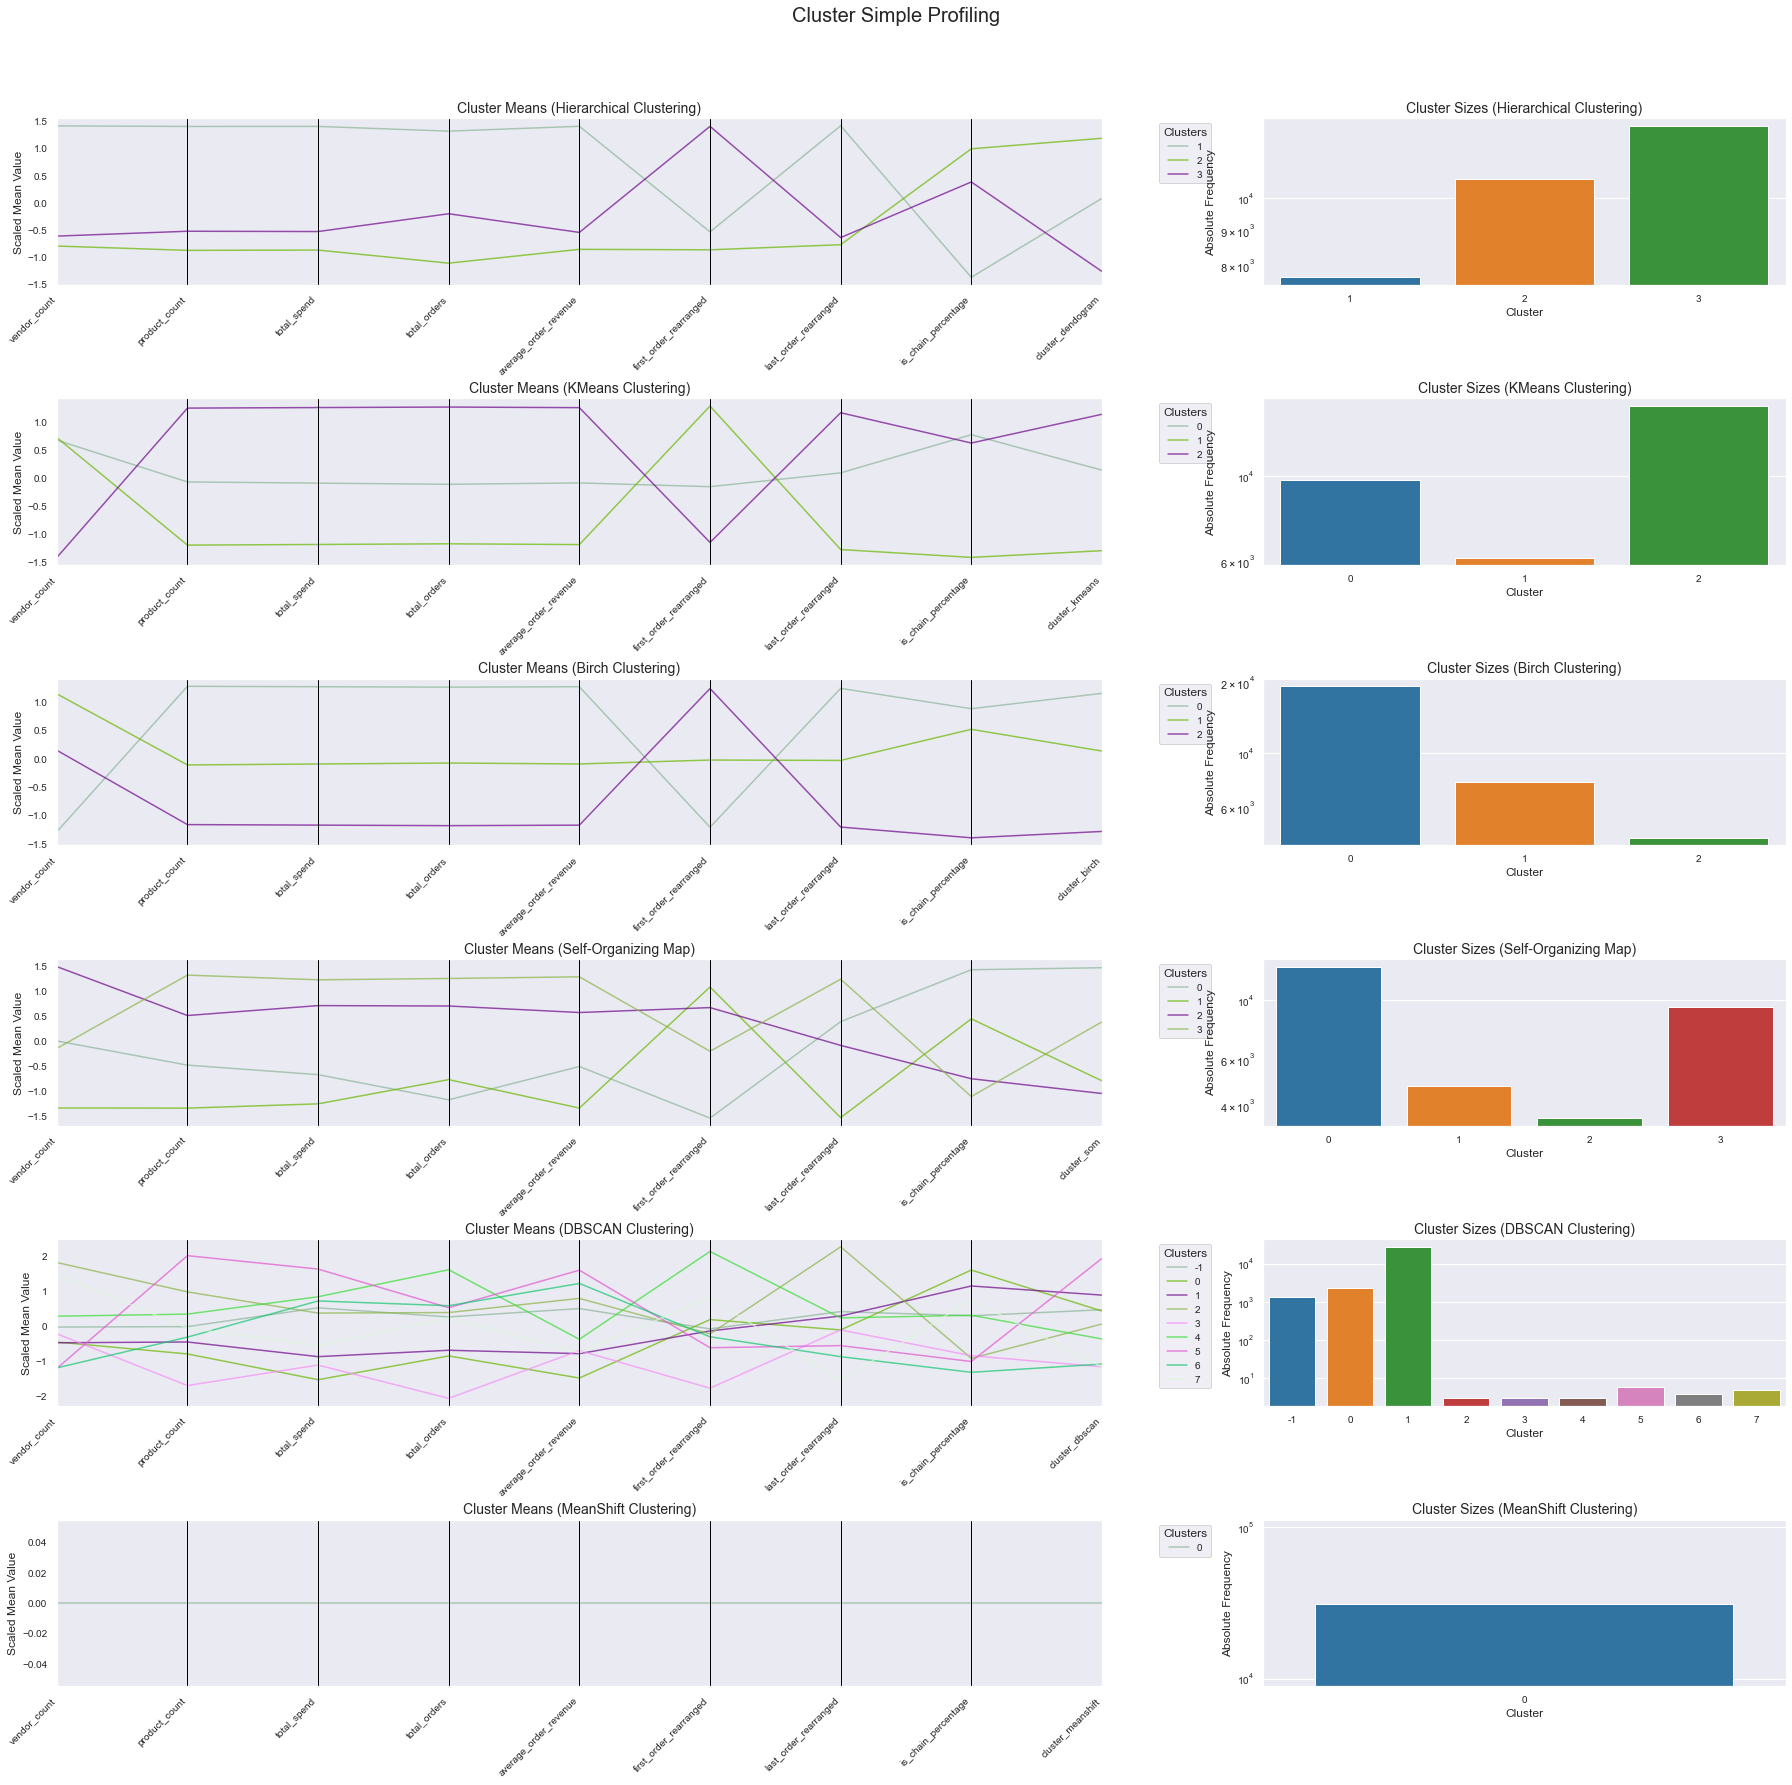

In [107]:
cluster_columns = ['cluster_dendogram','cluster_kmeans', 'cluster_birch', 'cluster_som', 'cluster_dbscan', 'cluster_meanshift']
compare_titles = ["Hierarchical Clustering","KMeans Clustering", "Birch Clustering", "Self-Organizing Map", "DBSCAN Clustering", "MeanShift Clustering"]

compare_clusters(df_skewness_plus_zcore, label_columns=cluster_columns, compare_titles=compare_titles)

In [108]:
df_skewness_plus_zcore

customer_age  vendor_count  product_count  total_spend  total_orders  \
0          2.944439      1.098612       1.791759     3.397189      1.098612   
1          2.890372      1.098612       1.098612     3.006178      1.098612   
2          3.663562      0.693147       1.098612     2.322388      1.098612   
3          3.332205      1.098612       1.386294     3.483085      1.098612   
4          3.044522      1.098612       1.791759     4.033178      1.098612   
...             ...           ...            ...          ...           ...   
31883      3.433987      0.693147       0.693147     2.946542      0.693147   
31884      3.332205      0.693147       0.693147     2.946542      0.693147   
31885      3.218876      0.693147       0.693147     2.933325      0.693147   
31886      3.555348      0.693147       0.693147     2.567254      0.693147   
31887      3.433987      0.693147       0.693147     2.187174      0.693147   

       average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                   2.736962                    90.0               9.433981   
1                   2.361326                    90.0               9.433981   
2                   1.722767                    90.0               9.433981   
3                   2.820188                    90.0               9.380832   
4                   3.357594                    90.0               9.380832   
...                      ...                     ...                    ...   
31883               2.946542                    68.0               9.486833   
31884               2.946542                    68.0               9.486833   
31885               2.933325                    68.0               9.486833   
31886               2.567254                    68.0               9.486833   
31887               2.187174                    68.0               9.486833   

       is_chain_percentage  cluster_dendogram  cluster_kmeans  cluster_birch  \
0                      0.5                  3               2              0   
1                      1.0                  2               2              0   
2                      1.0                  2               2              0   
3                      0.5                  3               2              0   
4                      0.0                  3               2              0   
...                    ...                ...             ...            ...   
31883                  1.0                  2               0              0   
31884                  0.0                  3               0              0   
31885                  1.0                  2               0              0   
31886                  0.0                  3               0              0   
31887                  0.0                  3               0              0   

       cluster_som  cluster_dbscan  cluster_meanshift  
0                0               0                  0  
1                0               1                  0  
2                1               1                  0  
3                0               0                  0  
4                2               1                  0  
...            ...             ...                ...  
31883            0               1                  0  
31884            0               1                  0  
31885            0               1                  0  
31886            0               1                  0  
31887            0               1                  0  

[31111 rows x 15 columns]

-  We reverted transformation of our data to the original scale to interpret the results effectively. 

In [109]:
df_revert = df_skewness_plus_zcore.copy()

In [110]:
def revert_transformation(column_name):
    if 'log' in applied_transformations[column_name]: 
        print(f"Reverting Log Transformation for {column_name}")
        df_revert[column_name] = np.expm1(df_revert[column_name])
    elif 'sqrt' in applied_transformations[column_name]:
        print(f"Reverting Square Root Transformation for {column_name}")
        df_revert[column_name] = np.square(df_revert[column_name])
    else:
        print(f"No Transformation to Revert for {column_name}")

# The columns we will revert transformations since we applied them at the beginning of our analysis. 
applied_transformations = {
    "customer_age": "log",
    "vendor_count": "log",
    "product_count": "log",
    "total_spend": "log",
    "total_orders": "log",
    "average_order_revenue": "log",
    "last_order_rearranged": "sqrt",
    "is_chain_percentage": "none",
    "first_order_rearranged": "none",
    "cluster_dendogram": "none",
    "cluster_kmeans": "none",	
    "cluster_birch" : "none",
    "cluster_dbscan" : "none",	
    "cluster_meanshift": "none"
}

for column in applied_transformations.keys():
    revert_transformation(column)

Reverting Log Transformation for customer_age
Reverting Log Transformation for vendor_count
Reverting Log Transformation for product_count
Reverting Log Transformation for total_spend
Reverting Log Transformation for total_orders
Reverting Log Transformation for average_order_revenue
Reverting Square Root Transformation for last_order_rearranged
No Transformation to Revert for is_chain_percentage
No Transformation to Revert for first_order_rearranged
No Transformation to Revert for cluster_dendogram
No Transformation to Revert for cluster_kmeans
No Transformation to Revert for cluster_birch
No Transformation to Revert for cluster_dbscan
No Transformation to Revert for cluster_meanshift


In [111]:
cluster_means_som = df_revert.groupby('cluster_som').mean()
cluster_means_som

customer_age  vendor_count  product_count  total_spend  \
cluster_som                                                           
0               27.371215      2.599178       4.385495    27.891696   
1               25.607590      1.748357       2.792029    27.187297   
2               29.385067      3.908557       7.449944    40.873258   
3               27.166155      3.775389       6.880123    50.660484   

             total_orders  average_order_revenue  first_order_rearranged  \
cluster_som                                                                
0                3.524710               8.386857               62.231925   
1                2.080348              13.262964               43.726309   
2                5.688199              13.774506               57.654922   
3                5.223340               9.965168               70.415334   

             last_order_rearranged  is_chain_percentage  cluster_dendogram  \
cluster_som                                                                  
0                        35.148785             0.795513           2.086579   
1                        28.160271             0.397333           2.666313   
2                        19.838926             0.352740           2.229586   
3                        15.832257             0.604990           1.996717   

             cluster_kmeans  cluster_birch  cluster_dbscan  cluster_meanshift  
cluster_som                                                                    
0                  1.158206       0.499664        0.852486                0.0  
1                  0.831885       1.041976        0.779309                0.0  
2                  1.288870       0.670861        0.915548                0.0  
3                  1.330509       0.262417        0.834798                0.0

In [112]:
cluster_means_som.to_csv('som_triaal_3.csv')

In [113]:
df_revert['cluster_som'].value_counts()

cluster_som
0    13375
3     9443
1     4717
2     3576
Name: count, dtype: int64

In [114]:
df_revert

customer_age  vendor_count  product_count  total_spend  total_orders  \
0              18.0           2.0            5.0        28.88           2.0   
1              17.0           2.0            2.0        19.21           2.0   
2              38.0           1.0            2.0         9.20           2.0   
3              27.0           2.0            3.0        31.56           2.0   
4              20.0           2.0            5.0        55.44           2.0   
...             ...           ...            ...          ...           ...   
31883          30.0           1.0            1.0        18.04           1.0   
31884          27.0           1.0            1.0        18.04           1.0   
31885          24.0           1.0            1.0        17.79           1.0   
31886          34.0           1.0            1.0        12.03           1.0   
31887          30.0           1.0            1.0         7.91           1.0   

       average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                     14.440                    90.0                   89.0   
1                      9.605                    90.0                   89.0   
2                      4.600                    90.0                   89.0   
3                     15.780                    90.0                   88.0   
4                     27.720                    90.0                   88.0   
...                      ...                     ...                    ...   
31883                 18.040                    68.0                   90.0   
31884                 18.040                    68.0                   90.0   
31885                 17.790                    68.0                   90.0   
31886                 12.030                    68.0                   90.0   
31887                  7.910                    68.0                   90.0   

       is_chain_percentage  cluster_dendogram  cluster_kmeans  cluster_birch  \
0                      0.5                  3               2              0   
1                      1.0                  2               2              0   
2                      1.0                  2               2              0   
3                      0.5                  3               2              0   
4                      0.0                  3               2              0   
...                    ...                ...             ...            ...   
31883                  1.0                  2               0              0   
31884                  0.0                  3               0              0   
31885                  1.0                  2               0              0   
31886                  0.0                  3               0              0   
31887                  0.0                  3               0              0   

       cluster_som  cluster_dbscan  cluster_meanshift  
0                0               0                  0  
1                0               1                  0  
2                1               1                  0  
3                0               0                  0  
4                2               1                  0  
...            ...             ...                ...  
31883            0               1                  0  
31884            0               1                  0  
31885            0               1                  0  
31886            0               1                  0  
31887            0               1                  0  

[31111 rows x 15 columns]

### Preparing Our Final Dataset for Customer Segmentation Analysis
- In the previous step we finalized defining clusters for our customers. 
- In this step, we will prepare our dataset to use categorical features as well. Here the aim is to understand customers' behaviours and analyze effectively for several purposes such as marketing campaigns, etc.
- And we want to see each cluster's favourite cousins (or most spent one), habits of promo usage, payment method, what time of day they tend to order, where they order from. To do this effectively, we're matching databases we had created previously. 

In [123]:
df_revert.columns

Index(['customer_age', 'vendor_count', 'product_count', 'total_spend',
       'total_orders', 'average_order_revenue', 'first_order_rearranged',
       'last_order_rearranged', 'is_chain_percentage', 'cluster_dendogram',
       'cluster_kmeans', 'cluster_birch', 'cluster_som', 'cluster_dbscan',
       'cluster_meanshift'],
      dtype='object')

In [119]:
the_main_df

customer_id customer_region  customer_age  vendor_count  product_count  \
0      1b8f824d5e            2360          18.0             2              5   
1      5d272b9dcb            8670          17.0             2              2   
2      f6d1b2ba63            4660          38.0             1              2   
3      180c632ed8            4660           NaN             2              3   
4      4eb37a6705            4660          20.0             2              5   
...           ...             ...           ...           ...            ...   
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

       is_chain  first_order  last_order last_promo payment_method  ...  \
0             1          0.0           1   DELIVERY           DIGI  ...   
1             2          0.0           1   DISCOUNT           DIGI  ...   
2             2          0.0           1   DISCOUNT           CASH  ...   
3             1          0.0           2   DELIVERY           DIGI  ...   
4             0          0.0           2          -           DIGI  ...   
...         ...          ...         ...        ...            ...  ...   
31883         1          NaN           0    FREEBIE           DIGI  ...   
31884         0          NaN           0   DELIVERY           DIGI  ...   
31885         1          NaN           0          -           DIGI  ...   
31886         0          NaN           0   DISCOUNT           DIGI  ...   
31887         0          NaN           0          -           CASH  ...   

      CUI_Chinese_Percentage CUI_Desserts_Percentage CUI_Healthy_Percentage  \
0                        0.0                     0.0                    0.0   
1                        0.0                     0.0                    0.0   
2                        0.0                     0.0                    0.0   
3                        0.0                     0.0                    0.0   
4                        0.0                     0.0                    0.0   
...                      ...                     ...                    ...   
31883                    0.0                     0.0                    0.0   
31884                    0.0                     0.0                    0.0   
31885                    0.0                     1.0                    0.0   
31886                    0.0                     0.0                    0.0   
31887                    0.0                     0.0                    0.0   

       CUI_Indian_Percentage  CUI_Italian_Percentage  CUI_Japanese_Percentage  \
0                   1.000000                     0.0                      0.0   
1                   0.000000                     0.0                      0.0   
2                   0.000000                     0.0                      0.0   
3                   0.565906                     0.0                      0.0   
4                   0.000000                     0.0                      0.0   
...                      ...                     ...                      ...   
31883               0.000000                     0.0                      0.0   
31884               0.000000                     0.0                      0.0   
31885               0.000000                     0.0                      0.0   
31886               0.000000                     0.0                      0.0   
31887               0.000000                     1.0                      0.0   

       CUI_Noodle Dishes_Percentage CUI_OTHER_Percentage  \
0                               0.0                  0.0   
1                               0.0                  0.0   
2                               0.0       

In [121]:
the_main_df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'favorite_cuisine', 'hour', 'day', 'total_spend',
       'total_orders', 'average_order_revenue', 'is_promo_used', 'age_group',
       'first_order_rearranged', 'last_order_rearranged',
       'weeks_after_first_order', 'weeks_after_last_order',
       'is_chain_percentage', 'CUI_American_Percentage',
       'CUI_Asian_Percentage', 'CUI_Beverages_Percentage',
       'CUI_Cafe_Percentage', 'CUI_Chicken Dishes_Percentage',
       'CUI_Chinese_Percentage', 'CUI_Desserts_Percentage',
       'CUI_Healthy_Percentage', 'CUI_Indian_Percentage',
       'CUI_Italian_Percentage', 'CUI_Japanese_Percentage',
       'CUI_Noodle Dishes_Percentage', 'CUI_OTHER_Percentage',
       'CUI_Street Food / Snacks_Percentage', 'CUI_Thai_Percentage'],
      dtype='object')

In [124]:
columns_to_add = [
    'customer_region', 'last_promo', 'payment_method', 'hour', 'day', 
    'CUI_American_Percentage', 'CUI_Asian_Percentage', 'CUI_Beverages_Percentage',
    'CUI_Cafe_Percentage', 'CUI_Chicken Dishes_Percentage', 'CUI_Chinese_Percentage',
    'CUI_Desserts_Percentage', 'CUI_Healthy_Percentage', 'CUI_Indian_Percentage',
    'CUI_Italian_Percentage', 'CUI_Japanese_Percentage', 'CUI_Noodle Dishes_Percentage',
    'CUI_OTHER_Percentage', 'CUI_Street Food / Snacks_Percentage', 'CUI_Thai_Percentage'
]

result_df = df_revert.join(the_main_df[columns_to_add], how='inner')
result_df.head()

customer_age  vendor_count  product_count  total_spend  total_orders  \
0          18.0           2.0            5.0        28.88           2.0   
1          17.0           2.0            2.0        19.21           2.0   
2          38.0           1.0            2.0         9.20           2.0   
3          27.0           2.0            3.0        31.56           2.0   
4          20.0           2.0            5.0        55.44           2.0   

   average_order_revenue  first_order_rearranged  last_order_rearranged  \
0                 14.440                    90.0                   89.0   
1                  9.605                    90.0                   89.0   
2                  4.600                    90.0                   89.0   
3                 15.780                    90.0                   88.0   
4                 27.720                    90.0                   88.0   

   is_chain_percentage  cluster_dendogram  ...  CUI_Chinese_Percentage  \
0                  0.5                  3  ...                     0.0   
1                  1.0                  2  ...                     0.0   
2                  1.0                  2  ...                     0.0   
3                  0.5                  3  ...                     0.0   
4                  0.0                  3  ...                     0.0   

   CUI_Desserts_Percentage  CUI_Healthy_Percentage  CUI_Indian_Percentage  \
0                      0.0                     0.0               1.000000   
1                      0.0                     0.0               0.000000   
2                      0.0                     0.0               0.000000   
3                      0.0                     0.0               0.565906   
4                      0.0                     0.0               0.000000   

   CUI_Italian_Percentage CUI_Japanese_Percentage  \
0                     0.0                     0.0   
1                     0.0                     0.0   
2                     0.0                     0.0   
3                     0.0                     0.0   
4                     0.0                     0.0   

  CUI_Noodle Dishes_Percentage CUI_OTHER_Percentage  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   

  CUI_Street Food / Snacks_Percentage CUI_Thai_Percentage  
0                                 0.0                 0.0  
1                                 0.0                 0.0  
2                                 0.0                 0.0  
3                                 0.0                 0.0  
4                                 0.0                 0.0  

[5 rows x 35 columns]

In [125]:
result_df.to_csv('final_df.csv')

In [2]:
df_revert = pd.read_csv('df_revert.csv')

In [3]:
df_revert.head()

Unnamed: 0  customer_age  vendor_count  product_count  total_spend  \
0           0          18.0           2.0            5.0        28.88   
1           1          17.0           2.0            2.0        19.21   
2           2          38.0           1.0            2.0         9.20   
3           3          27.0           2.0            3.0        31.56   
4           4          20.0           2.0            5.0        55.44   

   total_orders  average_order_revenue  first_order_rearranged  \
0           2.0                 14.440                    90.0   
1           2.0                  9.605                    90.0   
2           2.0                  4.600                    90.0   
3           2.0                 15.780                    90.0   
4           2.0                 27.720                    90.0   

   last_order_rearranged  is_chain_percentage  cluster_dendogram  \
0                   89.0                  0.5                  3   
1                   89.0                  1.0                  2   
2                   89.0                  1.0                  2   
3                   88.0                  0.5                  3   
4                   88.0                  0.0                  3   

   cluster_kmeans  cluster_birch  cluster_som  cluster_dbscan  \
0               2              0            0               0   
1               2              0            0               1   
2               2              0            1               1   
3               2              0            0               0   
4               2              0            2               1   

   cluster_meanshift  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [5]:
cluster_means_som = df_revert.groupby('cluster_som').mean()
cluster_means_som.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
cluster_means_som   

customer_age  vendor_count  product_count  total_spend  \
cluster_som                                                           
0               27.371215      2.599178       4.385495    27.891696   
1               25.607590      1.748357       2.792029    27.187297   
2               29.385067      3.908557       7.449944    40.873258   
3               27.166155      3.775389       6.880123    50.660484   

             total_orders  average_order_revenue  first_order_rearranged  \
cluster_som                                                                
0                3.524710               8.386857               62.231925   
1                2.080348              13.262964               43.726309   
2                5.688199              13.774506               57.654922   
3                5.223340               9.965168               70.415334   

             last_order_rearranged  is_chain_percentage  cluster_dendogram  \
cluster_som                                                                  
0                        35.148785             0.795513           2.086579   
1                        28.160271             0.397333           2.666313   
2                        19.838926             0.352740           2.229586   
3                        15.832257             0.604990           1.996717   

             cluster_kmeans  cluster_birch  cluster_dbscan  cluster_meanshift  
cluster_som                                                                    
0                  1.158206       0.499664        0.852486                0.0  
1                  0.831885       1.041976        0.779309                0.0  
2                  1.288870       0.670861        0.915548                0.0  
3                  1.330509       0.262417        0.834798                0.0

In [7]:
cluster_means_kmeans = df_revert.groupby('cluster_kmeans').mean()
cluster_means_kmeans.drop(columns=['Unnamed: 0'], inplace=True)
cluster_means_kmeans

customer_age  vendor_count  product_count  total_spend  \
cluster_kmeans                                                           
0                  27.317758      2.494825       4.071524    30.086997   
1                  27.300360      1.663015       2.467626    21.113067   
2                  27.233460      3.814715       7.128511    46.147094   

                total_orders  average_order_revenue  first_order_rearranged  \
cluster_kmeans                                                                
0                   3.170509              10.429224               55.150528   
1                   1.912688              12.136264               21.913669   
2                   5.512077               9.325948               81.220596   

                last_order_rearranged  is_chain_percentage  cluster_dendogram  \
cluster_kmeans                                                                  
0                           28.696485             0.621051           2.331181   
1                           15.043492             0.583634           2.497874   
2                           29.623261             0.647032           1.922158   

                cluster_birch  cluster_som  cluster_dbscan  cluster_meanshift  
cluster_kmeans                                                                 
0                    0.606620     1.207603        0.823035                0.0  
1                    1.725801     0.979725        0.838784                0.0  
2                    0.000000     1.471580        0.858034                0.0

In [8]:
cluster_means_som.to_csv('hebele_som_last.csv')
cluster_means_kmeans.to_csv('hebele_kmeans_last.csv')

In [9]:
final = pd.read_csv('final_df.csv')

In [10]:
final.head()

Unnamed: 0  customer_age  vendor_count  product_count  total_spend  \
0           0          18.0           2.0            5.0        28.88   
1           1          17.0           2.0            2.0        19.21   
2           2          38.0           1.0            2.0         9.20   
3           3          27.0           2.0            3.0        31.56   
4           4          20.0           2.0            5.0        55.44   

   total_orders  average_order_revenue  first_order_rearranged  \
0           2.0                 14.440                    90.0   
1           2.0                  9.605                    90.0   
2           2.0                  4.600                    90.0   
3           2.0                 15.780                    90.0   
4           2.0                 27.720                    90.0   

   last_order_rearranged  is_chain_percentage  ...  CUI_Chinese_Percentage  \
0                   89.0                  0.5  ...                     0.0   
1                   89.0                  1.0  ...                     0.0   
2                   89.0                  1.0  ...                     0.0   
3                   88.0                  0.5  ...                     0.0   
4                   88.0                  0.0  ...                     0.0   

   CUI_Desserts_Percentage  CUI_Healthy_Percentage  CUI_Indian_Percentage  \
0                      0.0                     0.0               1.000000   
1                      0.0                     0.0               0.000000   
2                      0.0                     0.0               0.000000   
3                      0.0                     0.0               0.565906   
4                      0.0                     0.0               0.000000   

   CUI_Italian_Percentage  CUI_Japanese_Percentage  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     0.0                      0.0   
4                     0.0                      0.0   

  CUI_Noodle Dishes_Percentage CUI_OTHER_Percentage  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   

  CUI_Street Food / Snacks_Percentage CUI_Thai_Percentage  
0                                 0.0                 0.0  
1                                 0.0                 0.0  
2                                 0.0                 0.0  
3                                 0.0                 0.0  
4                                 0.0                 0.0  

[5 rows x 36 columns]

In [12]:
final.columns

Index(['Unnamed: 0', 'customer_age', 'vendor_count', 'product_count',
       'total_spend', 'total_orders', 'average_order_revenue',
       'first_order_rearranged', 'last_order_rearranged',
       'is_chain_percentage', 'cluster_dendogram', 'cluster_kmeans',
       'cluster_birch', 'cluster_som', 'cluster_dbscan', 'cluster_meanshift',
       'customer_region', 'last_promo', 'payment_method', 'hour', 'day',
       'CUI_American_Percentage', 'CUI_Asian_Percentage',
       'CUI_Beverages_Percentage', 'CUI_Cafe_Percentage',
       'CUI_Chicken Dishes_Percentage', 'CUI_Chinese_Percentage',
       'CUI_Desserts_Percentage', 'CUI_Healthy_Percentage',
       'CUI_Indian_Percentage', 'CUI_Italian_Percentage',
       'CUI_Japanese_Percentage', 'CUI_Noodle Dishes_Percentage',
       'CUI_OTHER_Percentage', 'CUI_Street Food / Snacks_Percentage',
       'CUI_Thai_Percentage'],
      dtype='object')

In [13]:
final.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
columns_to_need = ['cluster_som','customer_region', 'last_promo', 'payment_method', 'hour', 'day', 
                   'CUI_American_Percentage', 'CUI_Asian_Percentage',
       'CUI_Beverages_Percentage', 'CUI_Cafe_Percentage',
       'CUI_Chicken Dishes_Percentage', 'CUI_Chinese_Percentage',
       'CUI_Desserts_Percentage', 'CUI_Healthy_Percentage',
       'CUI_Indian_Percentage', 'CUI_Italian_Percentage',
       'CUI_Japanese_Percentage', 'CUI_Noodle Dishes_Percentage',
       'CUI_OTHER_Percentage', 'CUI_Street Food / Snacks_Percentage',
       'CUI_Thai_Percentage']
for_analysis = final[columns_to_need]
for_analysis.head()

cluster_som customer_region last_promo payment_method       hour      day  \
0            0            2360   DELIVERY           DIGI     Dinner  weekend   
1            0            8670   DISCOUNT           DIGI  Breakfast  weekend   
2            1            4660   DISCOUNT           CASH  Breakfast  weekend   
3            0            4660   DELIVERY           DIGI      Lunch  weekday   
4            2            4660          -           DIGI  Breakfast  weekday   

   CUI_American_Percentage  CUI_Asian_Percentage  CUI_Beverages_Percentage  \
0                 0.000000              0.000000                       0.0   
1                 0.667361              0.332639                       0.0   
2                 1.000000              0.000000                       0.0   
3                 0.000000              0.434094                       0.0   
4                 0.262807              0.737193                       0.0   

   CUI_Cafe_Percentage  ...  CUI_Chinese_Percentage  CUI_Desserts_Percentage  \
0                  0.0  ...                     0.0                      0.0   
1                  0.0  ...                     0.0                      0.0   
2                  0.0  ...                     0.0                      0.0   
3                  0.0  ...                     0.0                      0.0   
4                  0.0  ...                     0.0                      0.0   

   CUI_Healthy_Percentage  CUI_Indian_Percentage  CUI_Italian_Percentage  \
0                     0.0               1.000000                     0.0   
1                     0.0               0.000000                     0.0   
2                     0.0               0.000000                     0.0   
3                     0.0               0.565906                     0.0   
4                     0.0               0.000000                     0.0   

   CUI_Japanese_Percentage  CUI_Noodle Dishes_Percentage  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   

   CUI_OTHER_Percentage  CUI_Street Food / Snacks_Percentage  \
0                   0.0                                  0.0   
1                   0.0                                  0.0   
2                   0.0                                  0.0   
3                   0.0                                  0.0   
4                   0.0                                  0.0   

   CUI_Thai_Percentage  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

In [ ]:
grouped = for_analysis.groupby('cluster_som').agg({
    'customer_region': 'value_counts',
    'last_promo': 'value_counts',
    'payment_method': 'value_counts',
    'hour': 'value_counts',
    'day': 'value_counts'
}).unstack(fill_value=0)

customer_region                                                    \
                          -    2360   2440   2490   4140    4660   8370  8550   
cluster_som                                                                     
0                     159.0  5040.0  825.0  268.0  262.0  3576.0  143.0   2.0   
1                      90.0   583.0  101.0   38.0  234.0  1579.0  139.0  14.0   
2                      54.0  1070.0  188.0   57.0  155.0   825.0   96.0   4.0   
3                     130.0  1883.0  341.0   76.0  199.0  3407.0  112.0   6.0   

                               ...  day                                        \
               8670 Afternoon  ... CASH DELIVERY DIGI DISCOUNT Dinner FREEBIE   
cluster_som                    ...                                              
0            3100.0       NaN  ...  NaN      NaN  NaN      NaN    NaN     NaN   
1            1939.0       NaN  ...  NaN      NaN  NaN      NaN    NaN     NaN   
2            1127.0       NaN  ...  NaN      NaN  NaN      NaN    NaN     NaN   
3            3289.0       NaN  ...  NaN      NaN  NaN      NaN    NaN     NaN   

                                              
            Late Night Lunch weekday weekend  
cluster_som                                   
0                  NaN   NaN  9284.0  4091.0  
1                  NaN   NaN  3387.0  1330.0  
2                  NaN   NaN  2514.0  1062.0  
3                  NaN   NaN  6279.0  3164.0  

[4 rows x 110 columns]

In [19]:
def calculate_counts_and_percentages(df, group_col, target_col):
    grouped = df.groupby(group_col)[target_col].value_counts().unstack(fill_value=0)
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    return grouped, percentages

last_promo_counts, last_promo_percentages = calculate_counts_and_percentages(for_analysis, 'cluster_som', 'last_promo')
payment_method_counts, payment_method_percentages = calculate_counts_and_percentages(for_analysis, 'cluster_som', 'payment_method')
hour_counts, hour_percentages = calculate_counts_and_percentages(for_analysis, 'cluster_som', 'hour')
day_counts, day_percentages = calculate_counts_and_percentages(for_analysis, 'cluster_som', 'day')

def combine_counts_and_percentages(counts, percentages):
    combined = counts.copy()
    for col in percentages.columns:
        combined[col] = combined[col].astype(str) + " (" + percentages[col].round(2).astype(str) + "%)"
    return combined

last_promo_combined = combine_counts_and_percentages(last_promo_counts, last_promo_percentages)
payment_method_combined = combine_counts_and_percentages(payment_method_counts, payment_method_percentages)
hour_combined = combine_counts_and_percentages(hour_counts, hour_percentages)
day_combined = combine_counts_and_percentages(day_counts, day_percentages)

In [36]:
region_counts, region_percentages = calculate_counts_and_percentages(for_analysis, 'cluster_som', 'customer_region')
region_combined = combine_counts_and_percentages(region_counts, region_percentages)

In [20]:
last_promo_combined

last_promo               -       DELIVERY       DISCOUNT        FREEBIE
cluster_som                                                            
0            6401 (47.86%)  3083 (23.05%)  2119 (15.84%)  1772 (13.25%)
1            2181 (46.24%)   1203 (25.5%)   709 (15.03%)   624 (13.23%)
2            1855 (51.87%)   767 (21.45%)   468 (13.09%)   486 (13.59%)
3            5865 (62.11%)   1105 (11.7%)  1088 (11.52%)  1385 (14.67%)

In [21]:
payment_method_combined

payment_method           CARD           CASH           DIGI
cluster_som                                                
0               7840 (58.62%)  2825 (21.12%)  2710 (20.26%)
1               2662 (56.43%)  1012 (21.45%)  1043 (22.11%)
2               2226 (62.25%)   550 (15.38%)   800 (22.37%)
3               6973 (73.84%)  1091 (11.55%)   1379 (14.6%)

In [22]:
hour_combined

hour             Afternoon      Breakfast        Dinner     Late Night  \
cluster_som                                                              
0            3471 (25.95%)  2826 (21.13%)  1926 (14.4%)   1819 (13.6%)   
1            1338 (28.37%)  1077 (22.83%)   451 (9.56%)  1095 (23.21%)   
2             975 (27.27%)   688 (19.24%)  519 (14.51%)   626 (17.51%)   
3            2445 (25.89%)  2360 (24.99%)   864 (9.15%)   1974 (20.9%)   

hour                 Lunch  
cluster_som                 
0            3333 (24.92%)  
1             756 (16.03%)  
2             768 (21.48%)  
3            1800 (19.06%)

In [23]:
day_combined

day                weekday        weekend
cluster_som                              
0            9284 (69.41%)  4091 (30.59%)
1             3387 (71.8%)   1330 (28.2%)
2             2514 (70.3%)   1062 (29.7%)
3            6279 (66.49%)  3164 (33.51%)

In [24]:
cui_columns = [col for col in for_analysis.columns if col.startswith("CUI_")]
cui_percentages_by_cluster = for_analysis.groupby("cluster_som")[cui_columns].mean() * 100
cui_percentages_by_cluster = cui_percentages_by_cluster.round(2)
cui_percentages_by_cluster

CUI_American_Percentage  CUI_Asian_Percentage  \
cluster_som                                                  
0                              15.84                 16.32   
1                              11.69                 26.62   
2                               8.82                 22.94   
3                              14.71                 23.43   

             CUI_Beverages_Percentage  CUI_Cafe_Percentage  \
cluster_som                                                  
0                                8.57                 1.58   
1                                5.56                 1.01   
2                                5.50                 0.88   
3                                5.81                 1.85   

             CUI_Chicken Dishes_Percentage  CUI_Chinese_Percentage  \
cluster_som                                                          
0                                     5.09                    4.44   
1                                     1.53                    3.18   
2                                     3.49                    4.83   
3                                     2.65                    3.95   

             CUI_Desserts_Percentage  CUI_Healthy_Percentage  \
cluster_som                                                    
0                               2.25                    2.55   
1                               2.59                    2.41   
2                               2.47                    2.16   
3                               1.98                    2.56   

             CUI_Indian_Percentage  CUI_Italian_Percentage  \
cluster_som                                                  
0                             5.00                    8.30   
1                             5.06                   13.35   
2                             6.61                   10.74   
3                             4.60                    9.97   

             CUI_Japanese_Percentage  CUI_Noodle Dishes_Percentage  \
cluster_som                                                          
0                               8.21                          3.45   
1                               7.74                          1.13   
2                               6.77                          2.79   
3                               8.12                          2.28   

             CUI_OTHER_Percentage  CUI_Street Food / Snacks_Percentage  \
cluster_som                                                              
0                           11.19                                 4.45   
1                            5.94                                 9.83   
2                            9.74                                10.14   
3                            8.36                                 7.09   

             CUI_Thai_Percentage  
cluster_som                       
0                           2.78  
1                           2.37  
2                           2.12  
3                           2.66

In [31]:
pivot_table = cui_percentages_by_cluster.T
pivot_table

cluster_som                              0      1      2      3
CUI_American_Percentage              15.84  11.69   8.82  14.71
CUI_Asian_Percentage                 16.32  26.62  22.94  23.43
CUI_Beverages_Percentage              8.57   5.56   5.50   5.81
CUI_Cafe_Percentage                   1.58   1.01   0.88   1.85
CUI_Chicken Dishes_Percentage         5.09   1.53   3.49   2.65
CUI_Chinese_Percentage                4.44   3.18   4.83   3.95
CUI_Desserts_Percentage               2.25   2.59   2.47   1.98
CUI_Healthy_Percentage                2.55   2.41   2.16   2.56
CUI_Indian_Percentage                 5.00   5.06   6.61   4.60
CUI_Italian_Percentage                8.30  13.35  10.74   9.97
CUI_Japanese_Percentage               8.21   7.74   6.77   8.12
CUI_Noodle Dishes_Percentage          3.45   1.13   2.79   2.28
CUI_OTHER_Percentage                 11.19   5.94   9.74   8.36
CUI_Street Food / Snacks_Percentage   4.45   9.83  10.14   7.09
CUI_Thai_Percentage                   2.78   2.37   2.12   2.66

In [33]:
top_3_df = pd.DataFrame(columns=["cluster", "first_favourite", "second_favourite", "third_favourite"])

for cluster in pivot_table.columns:
    top_3 = pivot_table[cluster].sort_values(ascending=False).head(3)
    top_3_df = pd.concat([
        top_3_df,
        pd.DataFrame({
            "cluster": [cluster],
            "first_favourite": [f"{top_3.index[0]} ({top_3.iloc[0]})"],
            "second_favourite": [f"{top_3.index[1]} ({top_3.iloc[1]})"],
            "third_favourite": [f"{top_3.index[2]} ({top_3.iloc[2]})"]
        })
    ], ignore_index=True)
top_3_df

cluster               first_favourite                 second_favourite  \
0       0  CUI_Asian_Percentage (16.32)  CUI_American_Percentage (15.84)   
1       1  CUI_Asian_Percentage (26.62)   CUI_Italian_Percentage (13.35)   
2       2  CUI_Asian_Percentage (22.94)   CUI_Italian_Percentage (10.74)   
3       3  CUI_Asian_Percentage (23.43)  CUI_American_Percentage (14.71)   

                               third_favourite  
0                 CUI_OTHER_Percentage (11.19)  
1              CUI_American_Percentage (11.69)  
2  CUI_Street Food / Snacks_Percentage (10.14)  
3                CUI_Italian_Percentage (9.97)

In [51]:
region_combined

customer_region            -           2360         2440        2490  \
cluster_som                                                            
0                159 (1.19%)  5040 (37.68%)  825 (6.17%)  268 (2.0%)   
1                 90 (1.91%)   583 (12.36%)  101 (2.14%)  38 (0.81%)   
2                 54 (1.51%)  1070 (29.92%)  188 (5.26%)  57 (1.59%)   
3                130 (1.38%)  1883 (19.94%)  341 (3.61%)   76 (0.8%)   

customer_region         4140           4660         8370       8550  \
cluster_som                                                           
0                262 (1.96%)  3576 (26.74%)  143 (1.07%)  2 (0.01%)   
1                234 (4.96%)  1579 (33.47%)  139 (2.95%)  14 (0.3%)   
2                155 (4.33%)   825 (23.07%)   96 (2.68%)  4 (0.11%)   
3                199 (2.11%)  3407 (36.08%)  112 (1.19%)  6 (0.06%)   

customer_region           8670  
cluster_som                     
0                3100 (23.18%)  
1                1939 (41.11%)  
2                1127 (31.52%)  
3                3289 (34.83%)

In [38]:
region_combined.to_csv('region_combined.csv')

In [56]:
region_combined.index.name = "cluster_som"

# Extracting top 3 regions for each cluster
top_3_region_df = pd.DataFrame(columns=["cluster", "first_favourite", "second_favourite", "third_favourite"])

for cluster in region_combined.index:
    top_3 = (
        region_combined.loc[cluster]
        .str.extract(r"(\d+\.\d+|\d+)") 
        .astype(float)  # Convert to float
        .sort_values(by=0, ascending=False)
        .head(3)
    )
    top_3_region_df = pd.concat([
        top_3_region_df,
        pd.DataFrame({
            "cluster": [cluster],
            "first_favourite": [f"{top_3.index[0]} {region_combined.loc[cluster, top_3.index[0]]}"],
            "second_favourite": [f"{top_3.index[1]} {region_combined.loc[cluster, top_3.index[1]]}"],
            "third_favourite": [f"{top_3.index[2]} {region_combined.loc[cluster, top_3.index[2]]}"]
        })
    ], ignore_index=True)
top_3_region_df

cluster     first_favourite    second_favourite     third_favourite
0       0  2360 5040 (37.68%)  4660 3576 (26.74%)  8670 3100 (23.18%)
1       1  8670 1939 (41.11%)  4660 1579 (33.47%)   2360 583 (12.36%)
2       2  8670 1127 (31.52%)  2360 1070 (29.92%)   4660 825 (23.07%)
3       3  4660 3407 (36.08%)  8670 3289 (34.83%)  2360 1883 (19.94%)

In [54]:
region_combined

customer_region            -           2360         2440        2490  \
cluster_som                                                            
0                159 (1.19%)  5040 (37.68%)  825 (6.17%)  268 (2.0%)   
1                 90 (1.91%)   583 (12.36%)  101 (2.14%)  38 (0.81%)   
2                 54 (1.51%)  1070 (29.92%)  188 (5.26%)  57 (1.59%)   
3                130 (1.38%)  1883 (19.94%)  341 (3.61%)   76 (0.8%)   

customer_region         4140           4660         8370       8550  \
cluster_som                                                           
0                262 (1.96%)  3576 (26.74%)  143 (1.07%)  2 (0.01%)   
1                234 (4.96%)  1579 (33.47%)  139 (2.95%)  14 (0.3%)   
2                155 (4.33%)   825 (23.07%)   96 (2.68%)  4 (0.11%)   
3                199 (2.11%)  3407 (36.08%)  112 (1.19%)  6 (0.06%)   

customer_region           8670  
cluster_som                     
0                3100 (23.18%)  
1                1939 (41.11%)  
2                1127 (31.52%)  
3                3289 (34.83%)

In [55]:
region_combined.columns

Index(['-', '2360', '2440', '2490', '4140', '4660', '8370', '8550', '8670'], dtype='object', name='customer_region')

In [57]:
last_promo_combined.to_csv('last_promo_combined.csv')
payment_method_combined.to_csv('payment_method_combined.csv')
hour_combined.to_csv('hour_combined.csv')
day_combined.to_csv('day_combined.csv')
cui_percentages_by_cluster.to_csv('cui_percentages_by_cluster.csv')
top_3_region_df.to_csv('top_3_region_df.csv')
top_3_df.to_csv('top_3_df.csv')
pivot_table.to_csv('pivot_table_5555.csv')